In [13]:
install.packages("Metrics")  

Warning message:
"package 'Metrics' is in use and will not be installed"

In [14]:
library(astsa)
library(forecast)
library(Metrics)

In [15]:
consumo <- read.csv("consumo.csv")

In [16]:
consumo

fecha,consumo_miles_m3
2010/01,68.874
2010/02,60.128
2010/03,84.494
2010/04,79.147
2010/05,72.691
2010/06,69.217
2010/07,66.817
2010/08,71.637
2010/09,70.391
2010/10,83.131


In [17]:
consumo_2019_2020 = consumo[109:132,]
consumo_hasta_2018 = consumo[0:108,]

In [18]:
consumo_2019_2020

,fecha,consumo_miles_m3
109,2019/01,63.058
110,2019/02,70.158
111,2019/03,78.299
112,2019/04,87.609
113,2019/05,83.139
114,2019/06,63.755
115,2019/07,72.324
116,2019/08,75.045
117,2019/09,73.492
118,2019/10,72.378


In [19]:
consumo_hasta_2018$consumo_miles_m3


[1] 68.874 60.128 84.494 79.147 72.691 69.217 66.817 71.637 70.391 83.131
 [11] 78.393 83.810 62.861 68.118 79.468 81.208 80.520 69.411 65.623 69.487
 [21] 79.105 72.276 90.184 82.524 65.557 68.499 76.230 79.642 81.502 69.397
 [31] 69.828 63.321 70.775 70.809 91.948 68.126 66.421 60.778 72.404 89.360
 [41] 77.861 75.239 68.966 74.988 62.599 84.244 75.171 86.153 59.339 57.194
 [51] 72.207 89.310 76.066 73.352 69.027 73.314 73.187 78.393 77.614 76.118
 [61] 63.525 66.114 81.840 94.411 72.216 73.396 69.015 54.216 68.598 75.792
 [71] 77.121 73.694 58.508 64.067 71.292 63.507 92.671 75.593 60.075 75.489
 [81] 72.919 72.078 87.139 83.367 57.049 61.480 85.298 79.316 76.510 78.722
 [91] 65.008 67.392 67.824 82.972 92.370 83.037 61.404 65.268 77.342 76.701
[101] 83.383 72.094 60.169 72.907 68.894 85.930 86.293 71.868

In [20]:
consumo_hasta_2018

fecha,consumo_miles_m3
2010/01,68.874
2010/02,60.128
2010/03,84.494
2010/04,79.147
2010/05,72.691
2010/06,69.217
2010/07,66.817
2010/08,71.637
2010/09,70.391
2010/10,83.131


In [21]:
options(repr.plot.width=14, repr.plot.height=6)


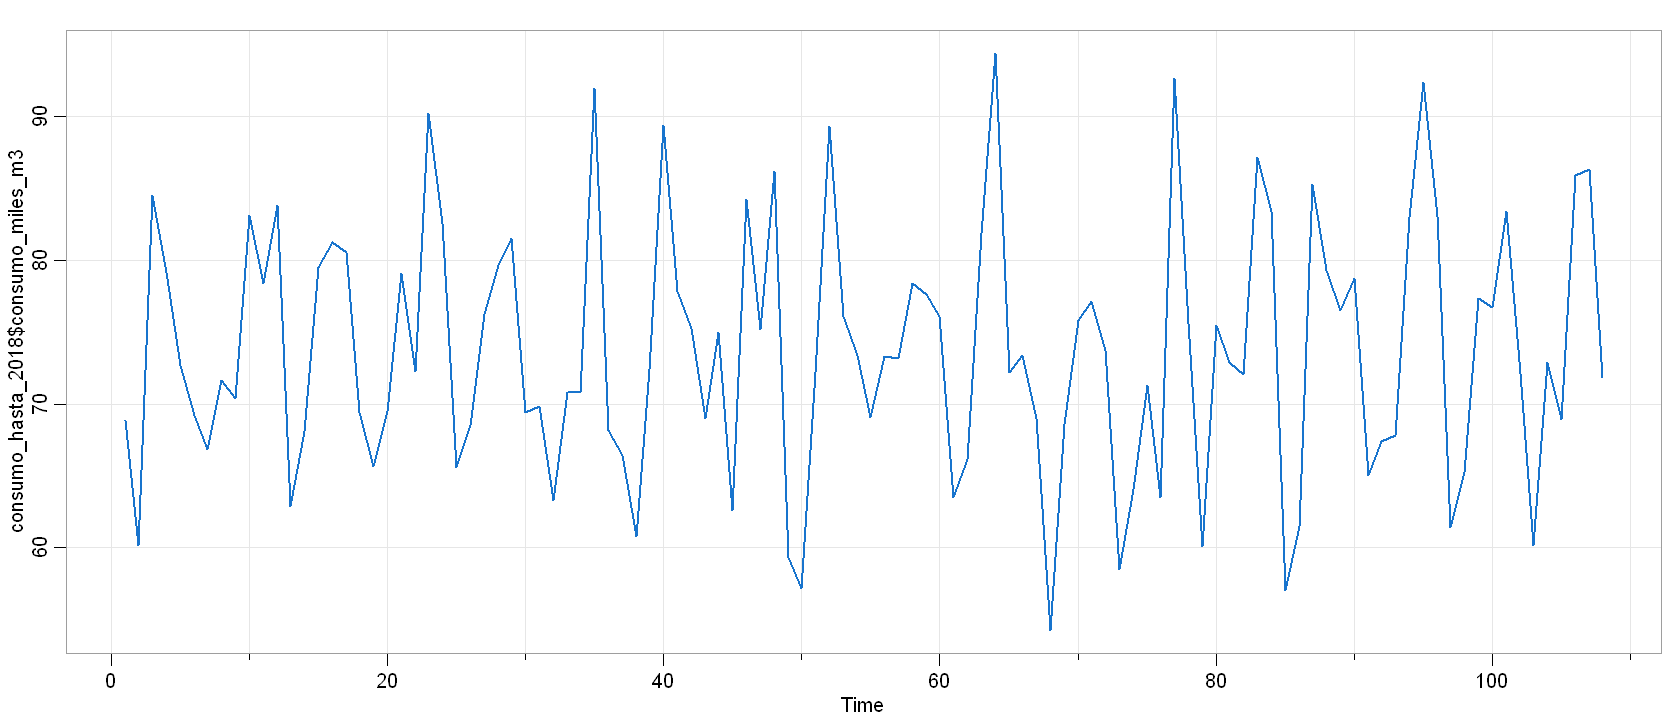

In [22]:
tsplot(consumo_hasta_2018$consumo_miles_m3, col=4, lwd=2)

La serie pareceriera ser naturalmente bastante estacionaria. 

In [23]:
x = ts(consumo_hasta_2018$consumo_miles_m3, start = 2010, freq = 12)

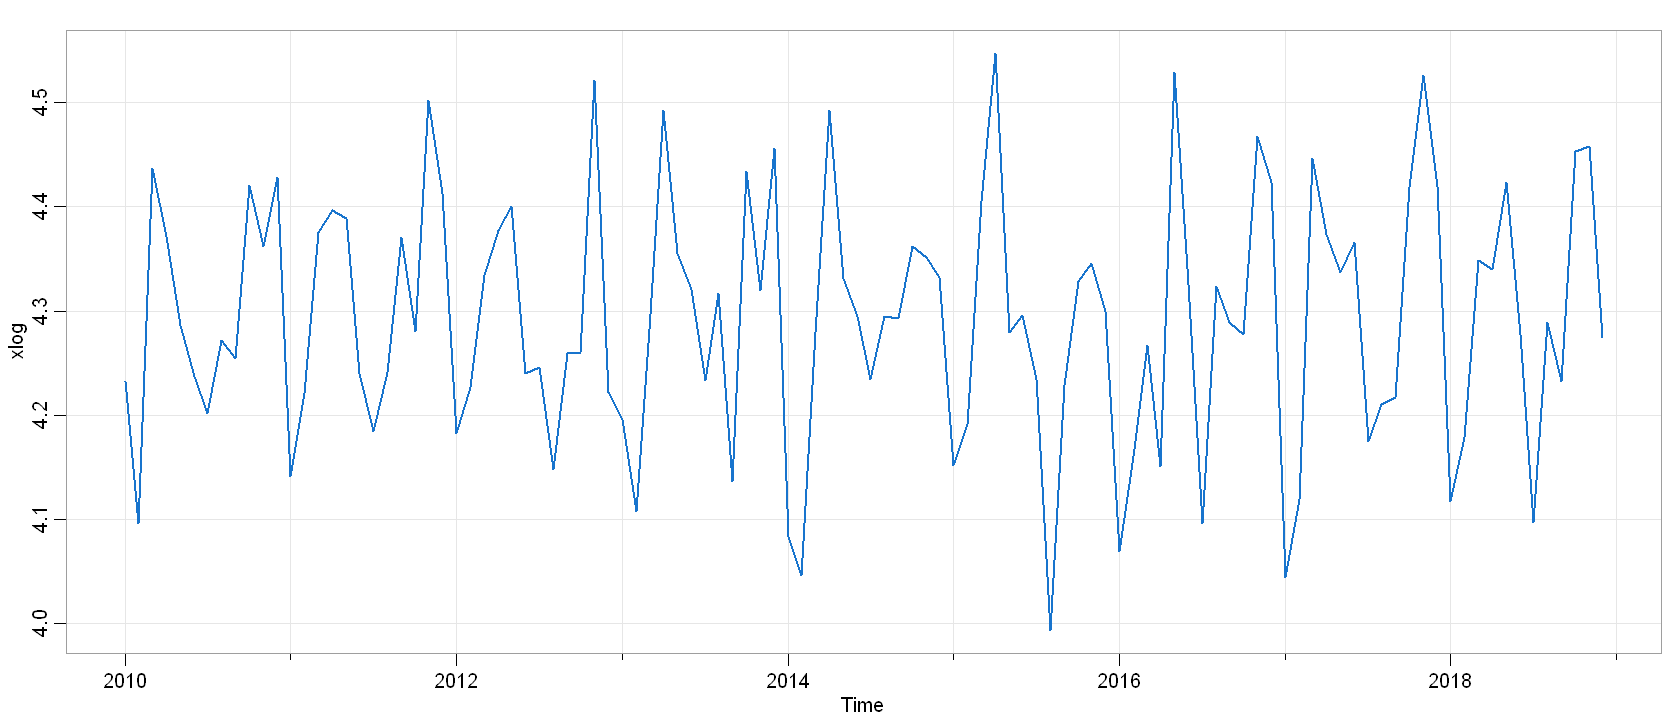

In [24]:
xlog = log(x)
tsplot(xlog, col = 4, lwd=2)

Se verifica que el logaritmo de la serie no la suaviza. No genera un efecto significativo. Por este motivo continuaremos trabajando con la serie original.

Consideramos que la diferenciación tampoco genera ningun efecto significativo. Continuamos trabajando con la serie original, y le restaremos la media para centrarla.

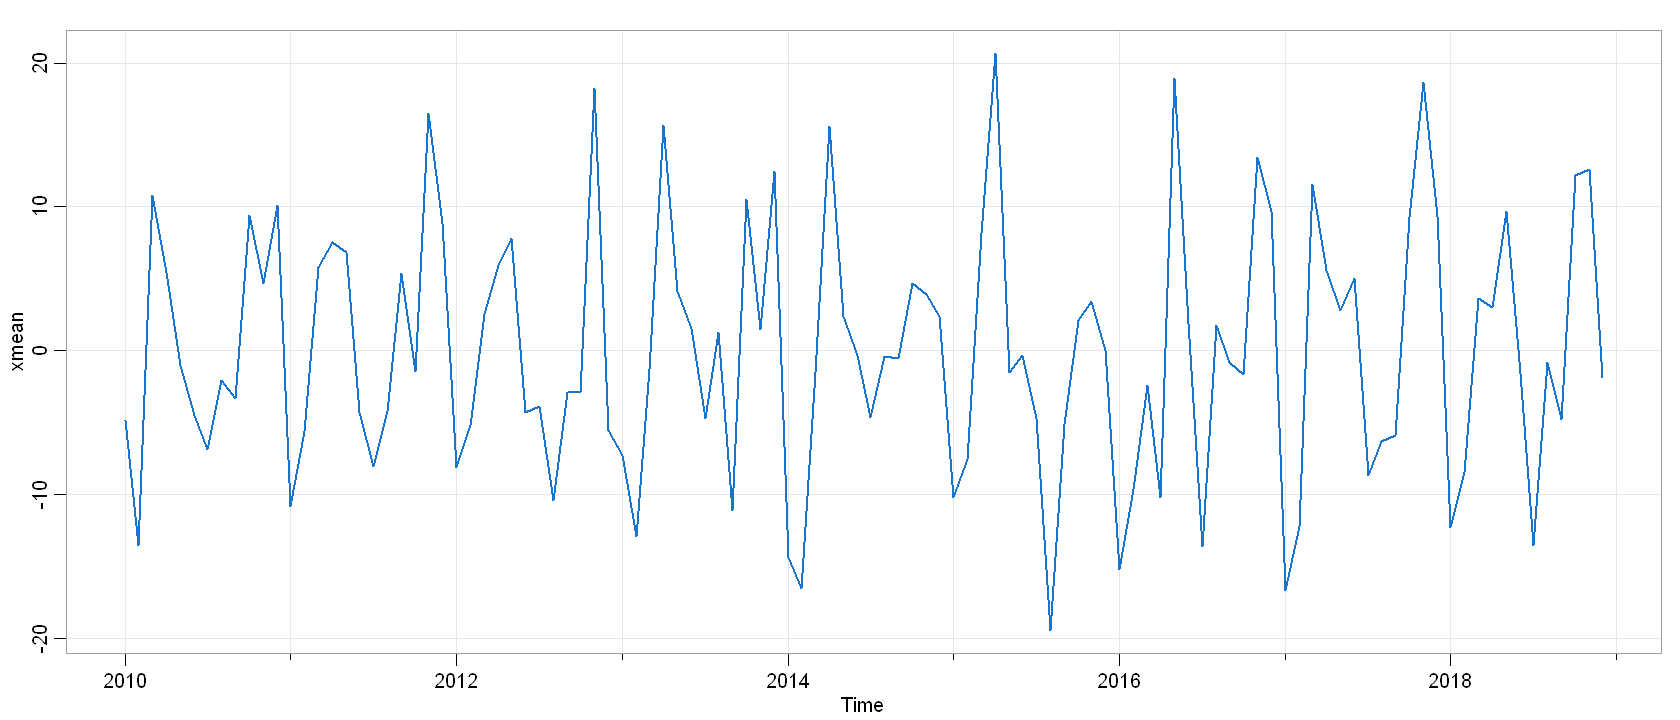

In [25]:
xmean = x-mean(x)
tsplot(xmean, col = 4, lwd = 2)

In [26]:
time = time(xmean) - 2010
fit_time = lm(xmean ~ 0 + time)
summary(fit_time)


Call:
lm(formula = xmean ~ 0 + time)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5750  -5.6100  -0.9088   5.5608  20.6250 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)
time  0.01509    0.16478   0.092    0.927

Residual standard error: 8.836 on 107 degrees of freedom
Multiple R-squared:  7.838e-05,	Adjusted R-squared:  -0.009267 
F-statistic: 0.008388 on 1 and 107 DF,  p-value: 0.9272


La tendencia no es significativa. Al intentar ajustar un "trend", el mismo da NO significativo.

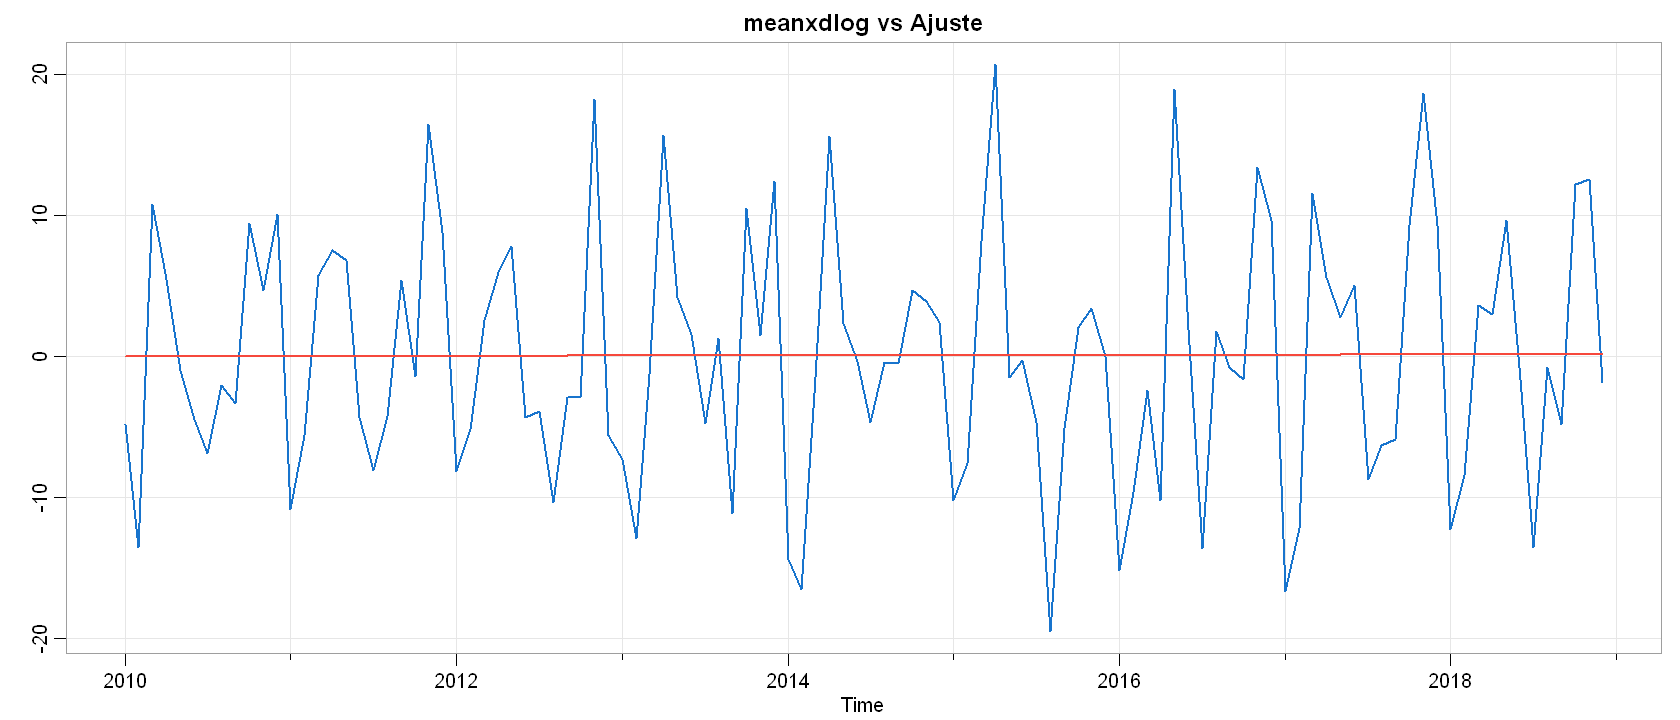

In [27]:
tsplot(xmean, main = "meanxdlog vs Ajuste", ylab = "", col = 4, lwd = 2)
predictions = ts(fitted(fit_time), start = 2010, frequency =12)
lines(predictions, col = 2, lwd = 2)

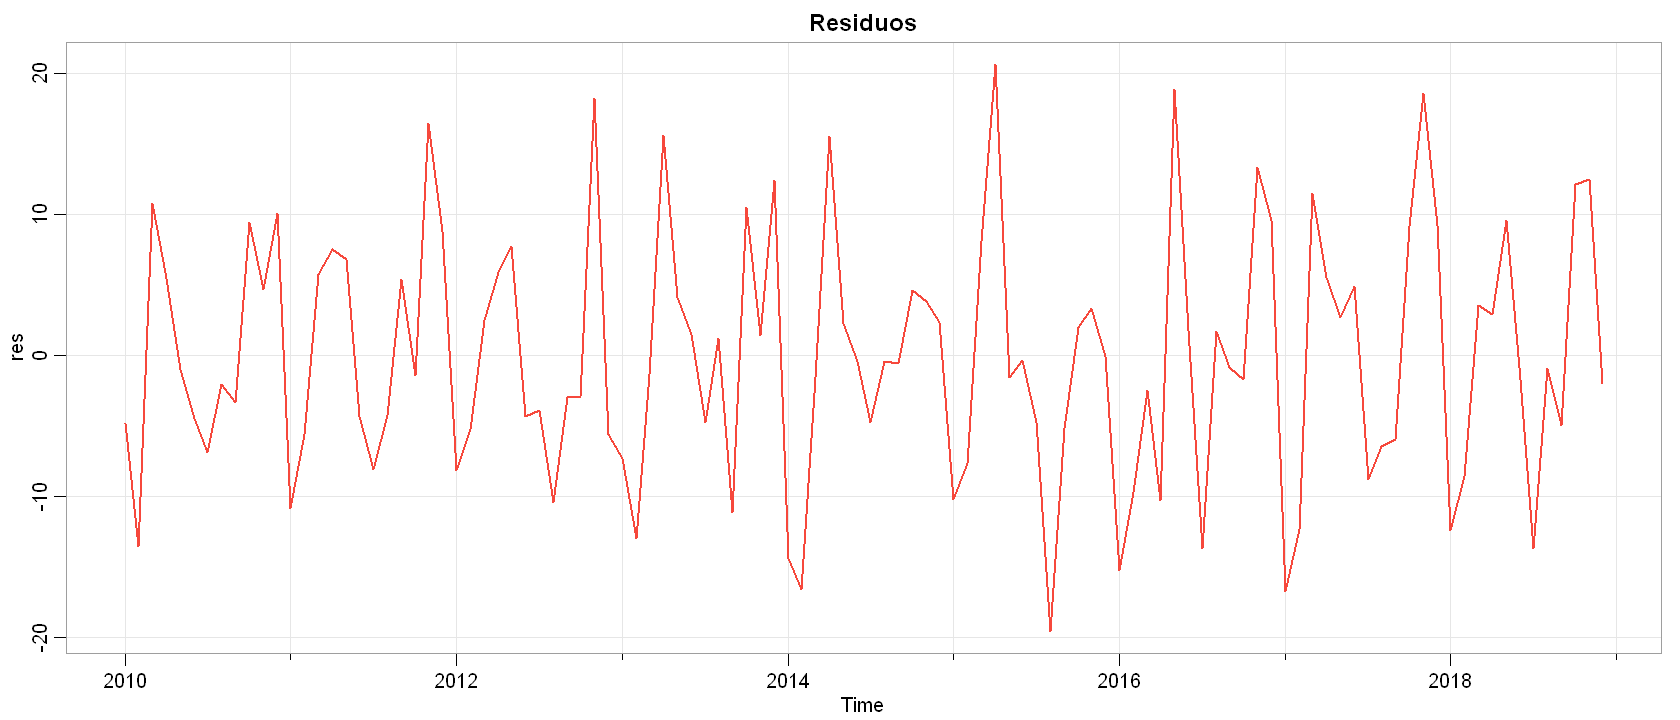

In [28]:
res = ts(residuals(fit_time), start = 2010, freq = 12)
tsplot(res, main = "Residuos", col = 2, lwd = 2)

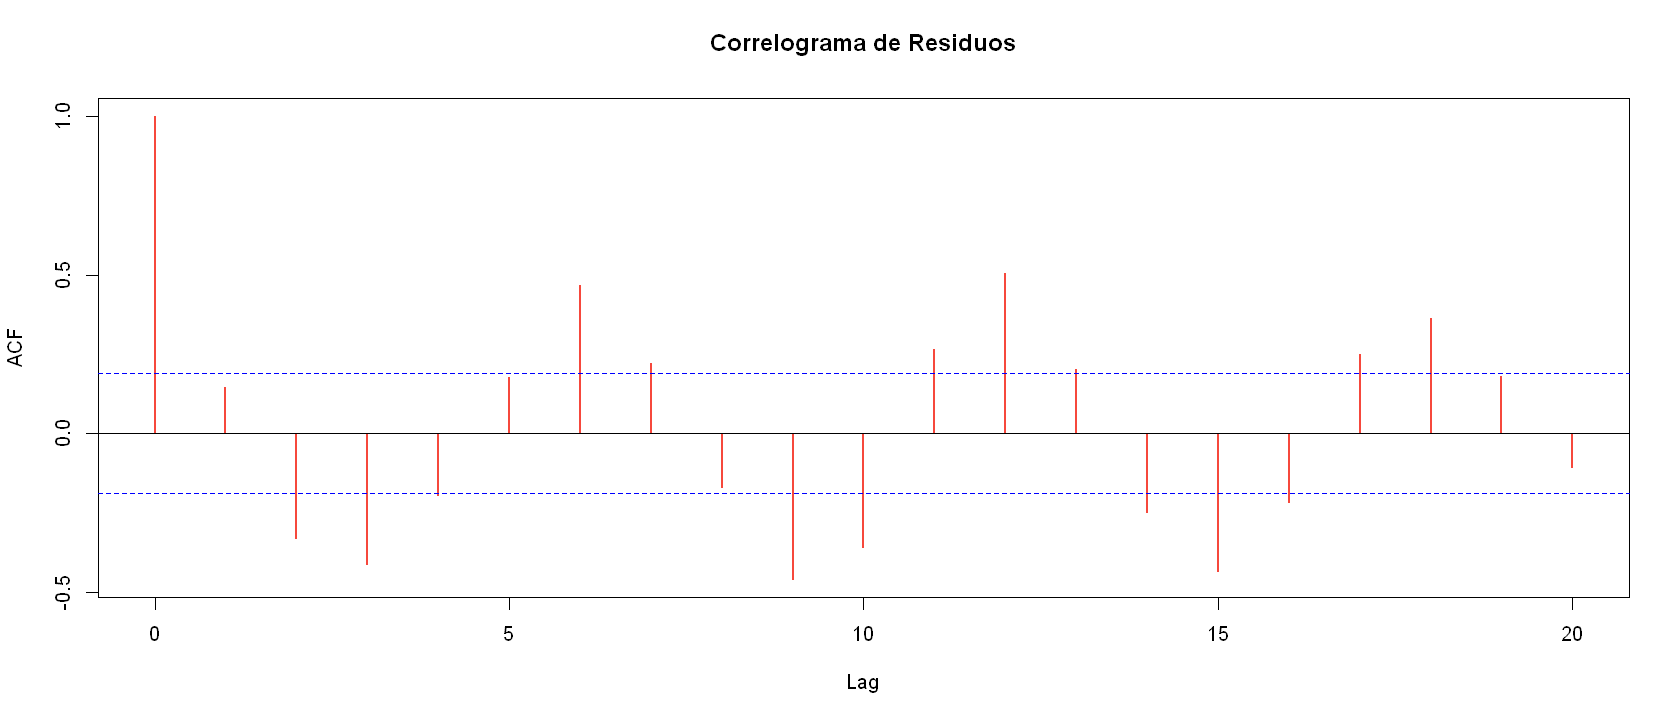

In [29]:
acf(residuals(fit_time), col = 2, lwd = 2, main = "Correlograma de Residuos")

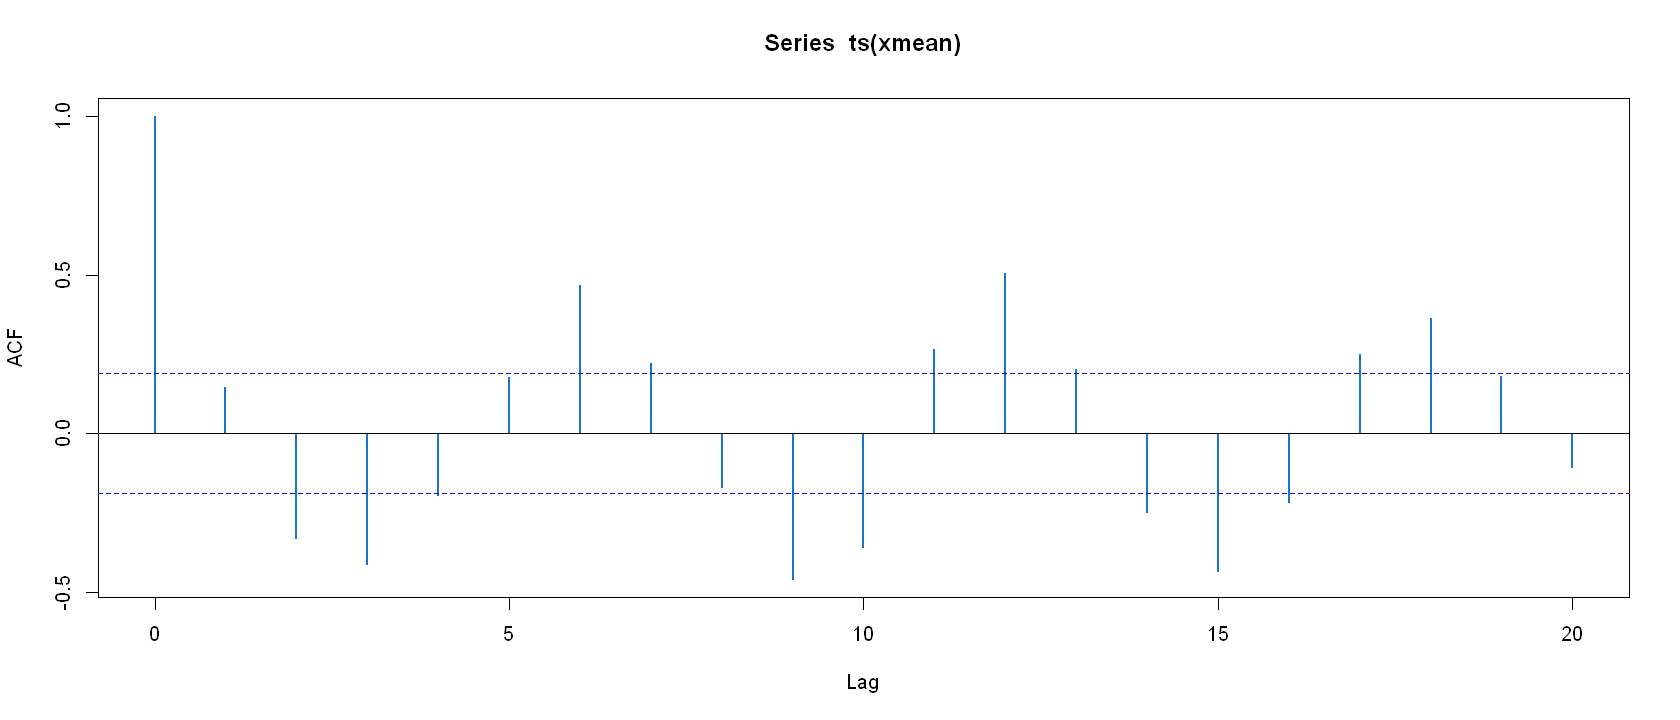

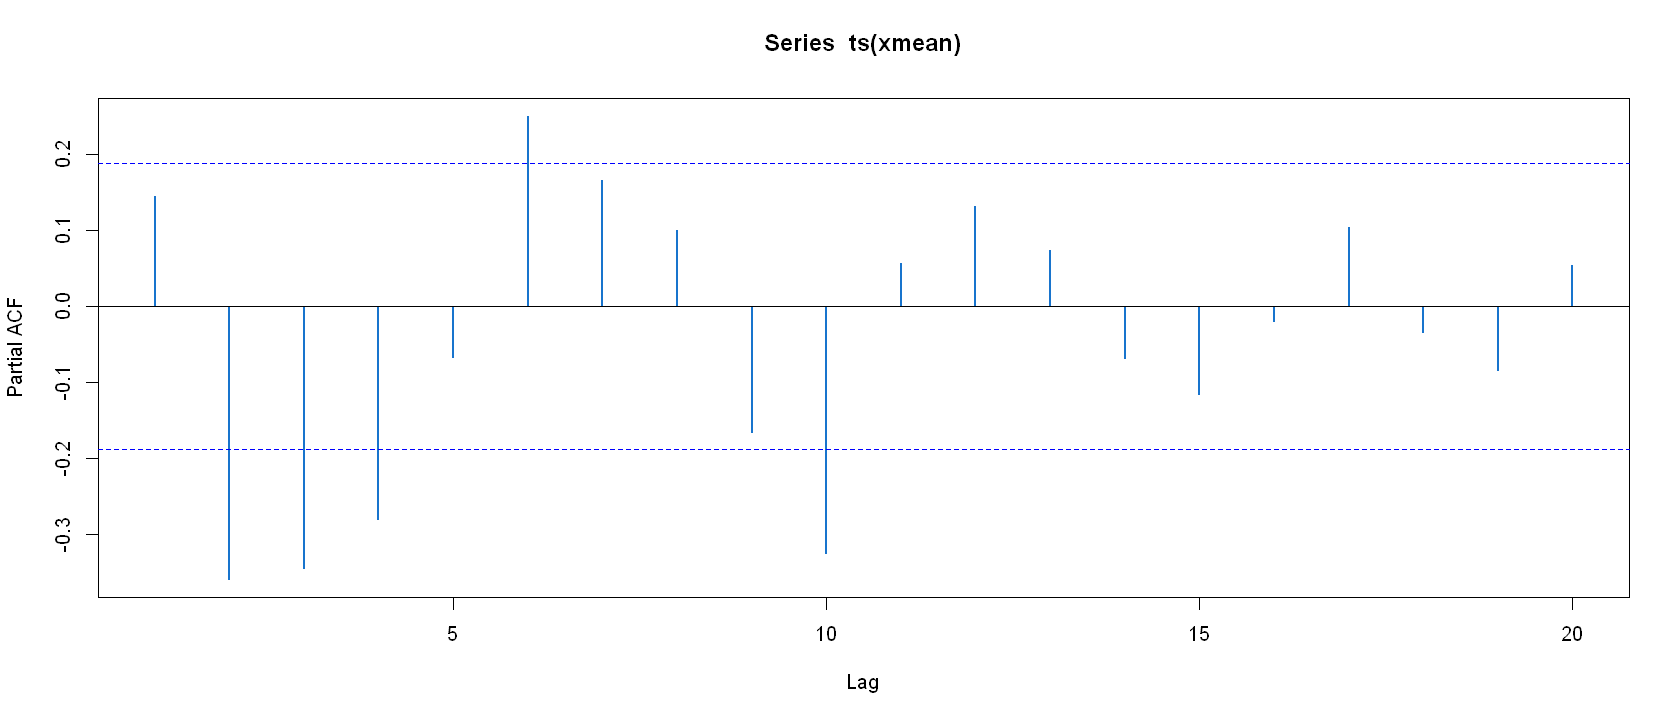

In [30]:
acf(ts(xmean), col = 4, lwd = 2)
pacf(ts(xmean), col = 4, lwd = 2)
# PREGUNTA: LA AUTOCORRELACION VA DECRECIENDO, SIGNIFICA ESO Q ES UN AUTORREGRESIVO?
# PREGUNTAR POR EL PACF

Conclusión: Hay un componente sistemático de cierto período que debemos eliminar. Para ello haremos un periodograma.

El periodograma nos dice que frecuencias correlacionan mejor. SI ponemos las frecuencias del periodograma en un linear model de senos y cosenos hará un ajuste para encontrar la componente periódica que mejor ajuste:

Utilizaremos por lo tanto frecuencias conocidas de la forma:



Recordamos que para que el periodograma funcione debemos realizar los siguientes pasos: 

-Centrar la serie histórica en cero: Esto lo efectuamos al restarle la media

-Quitarle cualquier tendencia que tenga: La serie original "x", ya naturalmente no presentaba ninguna tendencia

Haremos el periodograma con la serie original pero centrada, es decir, con "xmean". Por este motivo no centraremos "s". El objetivo es encontrar componentes periódicas sistemáticas:

In [31]:
s = as.numeric(xmean)
#s = s - mean(s)
n = length(s)
I = 4/n*abs(fft(s))^2/n
I = I[1:floor(n/2)]
f = (0:(n/2-1))/n*12

#cantidad de muestras por año = 12

In [32]:
f

[1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000 1.1111111 1.2222222 1.3333333 1.4444444
[15] 1.5555556 1.6666667 1.7777778 1.8888889 2.0000000 2.1111111 2.2222222
[22] 2.3333333 2.4444444 2.5555556 2.6666667 2.7777778 2.8888889 3.0000000
[29] 3.1111111 3.2222222 3.3333333 3.4444444 3.5555556 3.6666667 3.7777778
[36] 3.8888889 4.0000000 4.1111111 4.2222222 4.3333333 4.4444444 4.5555556
[43] 4.6666667 4.7777778 4.8888889 5.0000000 5.1111111 5.2222222 5.3333333
[50] 5.4444444 5.5555556 5.6666667 5.7777778 5.8888889

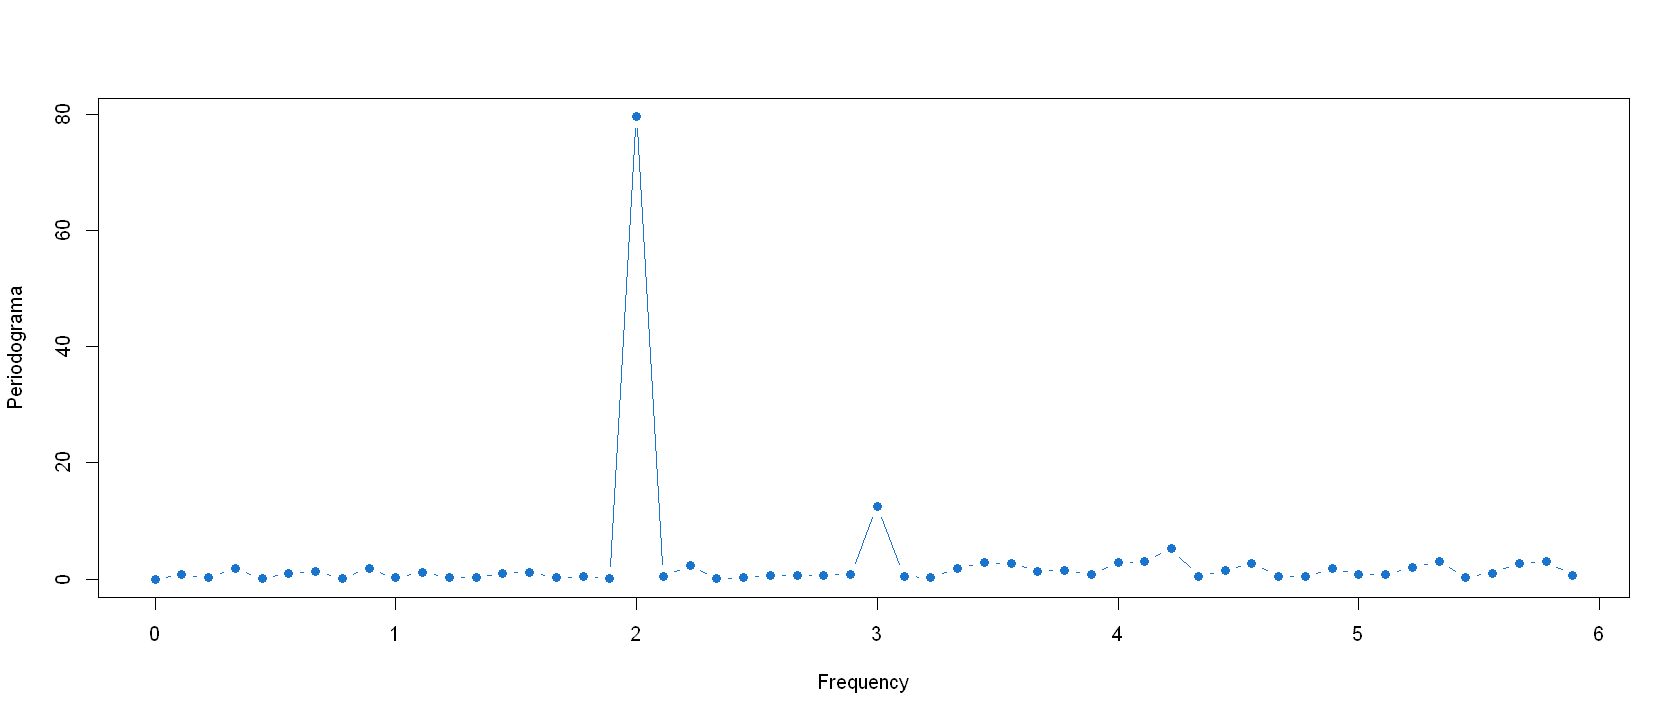

In [33]:
plot(f, I, type = "b", xlab = "Frequency", ylab = "Periodograma", col = 4, lwd = 1, pch = 19 )
#xlim= c(1,3.5)

In [35]:
f[19]
f[28]
f[29]

[1] 2

[1] 3

[1] 3.111111

Frecuencias que consideramos relevantes: 2 y 3
Quitamos el Intercept ya que le restamos la media a la serie y la centramos
De igual modo, no ponemos la componente "time" porque vimos que el trend no es significativo

CONSIDERANDO LAS FRECUENCIAS 2, 3 y 4.5:

In [37]:
fit_p1 = lm(xmean ~ 0 + cos(2*pi*(2)*time) + sin(2*pi*(2)*time) + cos(2*pi*(3)*time) + sin(2*pi*(3)*time))
summary(fit_p1)


Call:
lm(formula = xmean ~ 0 + cos(2 * pi * (2) * time) + sin(2 * pi * 
    (2) * time) + cos(2 * pi * (3) * time) + sin(2 * pi * (3) * 
    time))

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0705  -3.6434   0.1463   4.3196  13.5869 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
cos(2 * pi * (2) * time)  -7.4567     0.7756  -9.614 4.91e-16 ***
sin(2 * pi * (2) * time)  -4.8996     0.7756  -6.317 6.71e-09 ***
cos(2 * pi * (3) * time)  -2.5942     0.7756  -3.345  0.00115 ** 
sin(2 * pi * (3) * time)  -2.4140     0.7756  -3.112  0.00240 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.7 on 104 degrees of freedom
Multiple R-squared:  0.5957,	Adjusted R-squared:  0.5801 
F-statistic:  38.3 on 4 and 104 DF,  p-value: < 2.2e-16


APARTADO:

En el ajuste elegido para el establecimiento de las predicciones determínisticas consideramos una frecuencia semestral (de dos ciclos por año) y otra cuatrimestral (de tres ciclos por año). Tales frecuencias fueron obtenidas a partir del periodograma, que nos permitió observar que dentro de la serie analizada están todos estos ciclos combinados. Estas frecuencias componen además un ciclo anual, ya que el año es un múltiplo de ambas.

Vamos a comparar este resultado, con un ajuste realizado con una única estacionalidad (o sea, con un ciclo anual o frecuencia 1), para observar el real beneficio de haber efectuado un periodograma:

In [70]:
fit_p_f1 = lm(xmean ~ 0 + cos(2*pi*(1)*time) + sin(2*pi*(1)*time))
summary(fit_p_f1)


Call:
lm(formula = xmean ~ 0 + cos(2 * pi * (1) * time) + sin(2 * pi * 
    (1) * time))

Residuals:
    Min      1Q  Median      3Q     Max 
-19.137  -5.780  -0.539   5.626  20.785 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
cos(2 * pi * (1) * time)  0.45504    1.20736   0.377    0.707
sin(2 * pi * (1) * time) -0.08126    1.20736  -0.067    0.946

Residual standard error: 8.872 on 106 degrees of freedom
Multiple R-squared:  0.001381,	Adjusted R-squared:  -0.01746 
F-statistic: 0.07329 on 2 and 106 DF,  p-value: 0.9294


Efectivamente, al ver el ajuste anterior de un único ciclo anual, observamos que el R cuadrado es muy bajo (el obtenido en fit_p1 fue de aproximadamente 0.5957%, mientras que el obtenido en este caso fue de apenas 0.001381%), y que además ninguno de los coeficientes dio significativo

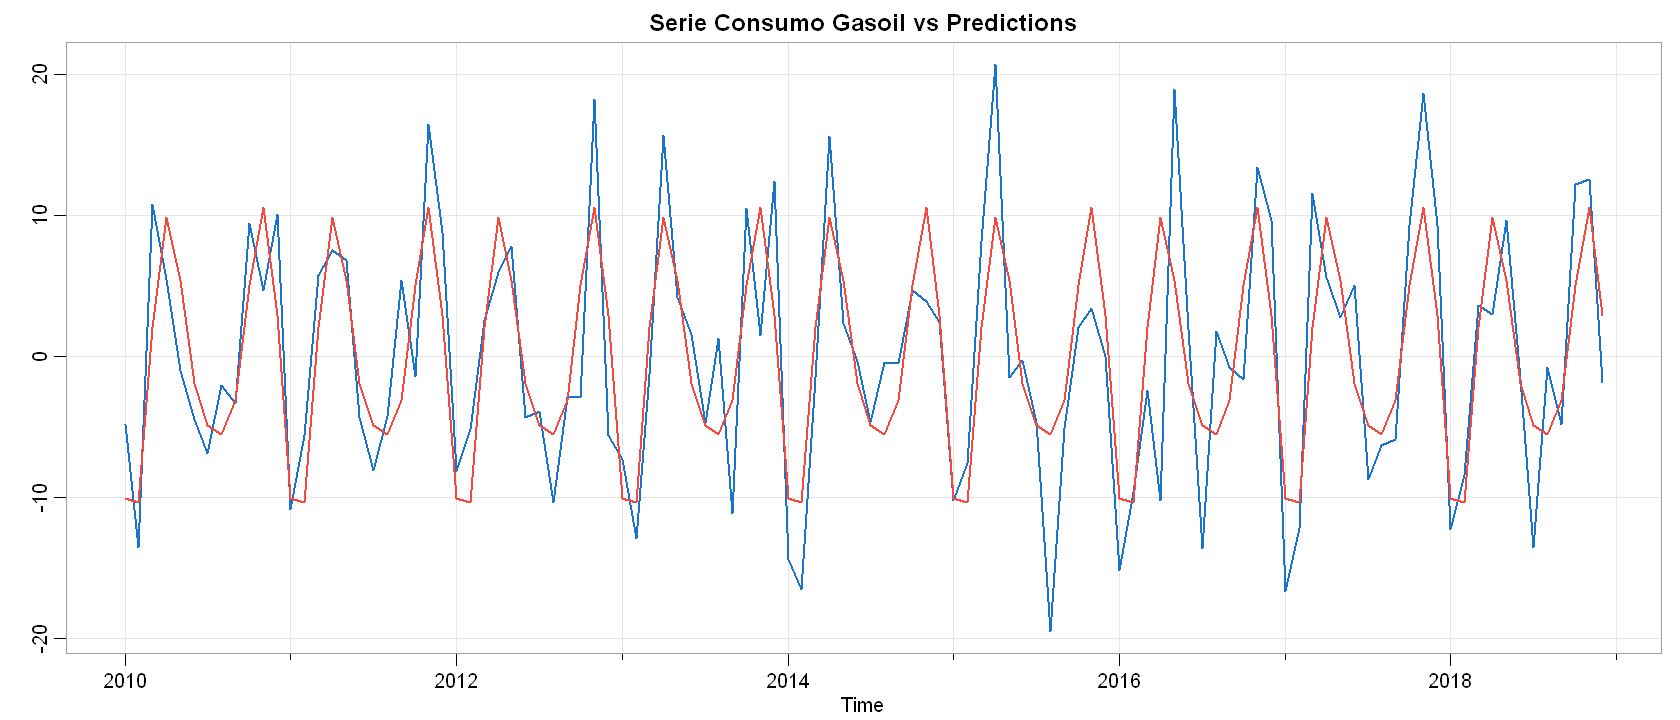

In [38]:
tsplot(ts(xmean, start = 2010, frequency = 12), col = 4, lwd = 2, main = 'Serie Consumo Gasoil vs Predictions', ylab = "")
predictions_gasoil = ts(fitted(fit_p1), start = 2010, frequency = 12)
lines(predictions_gasoil, col = 2, lwd = 2)

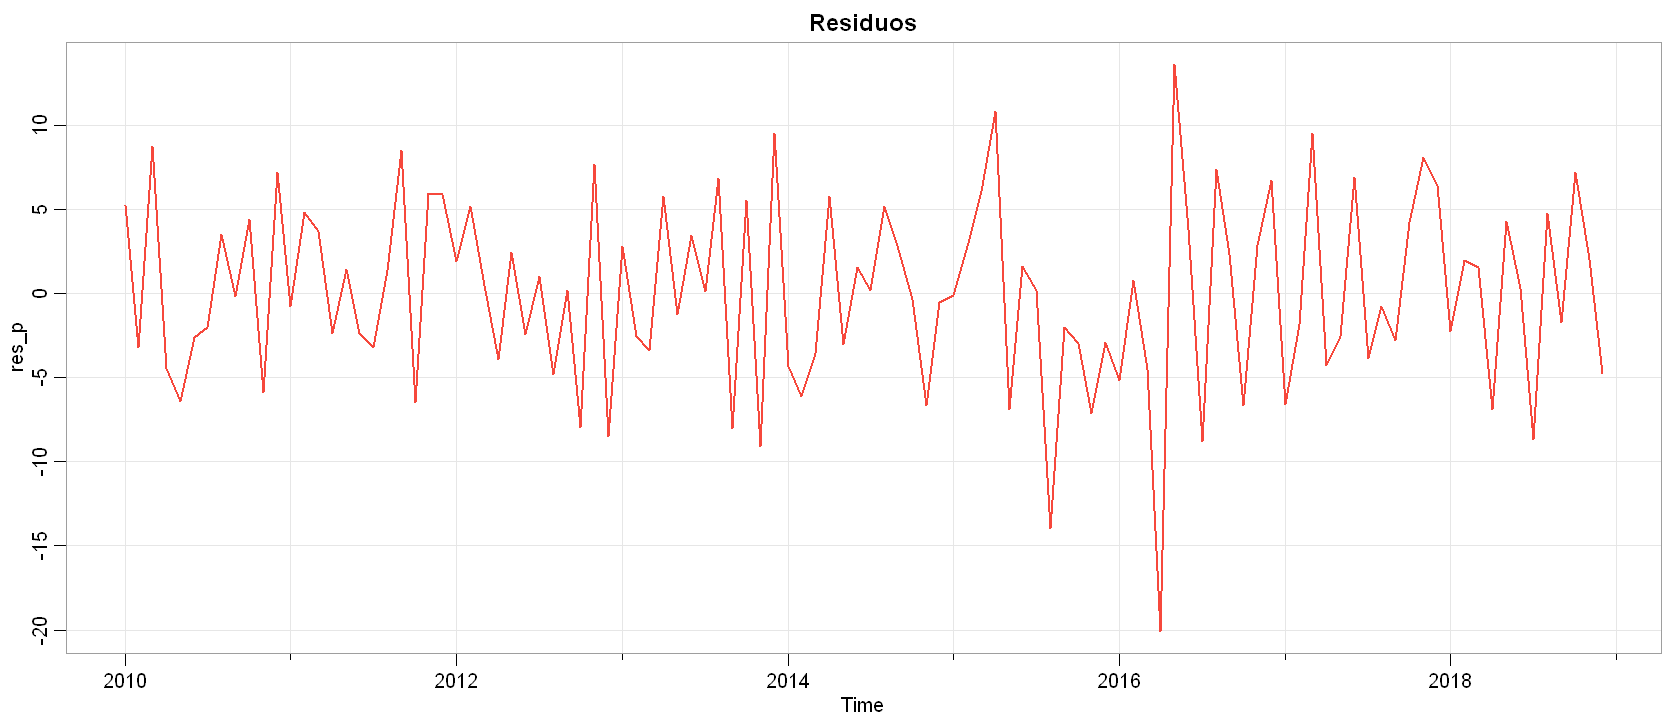

In [39]:
res_p = ts(residuals(fit_p1), start = 2010, freq = 12)
tsplot(res_p, col = 2, lwd = 2, main = 'Residuos')


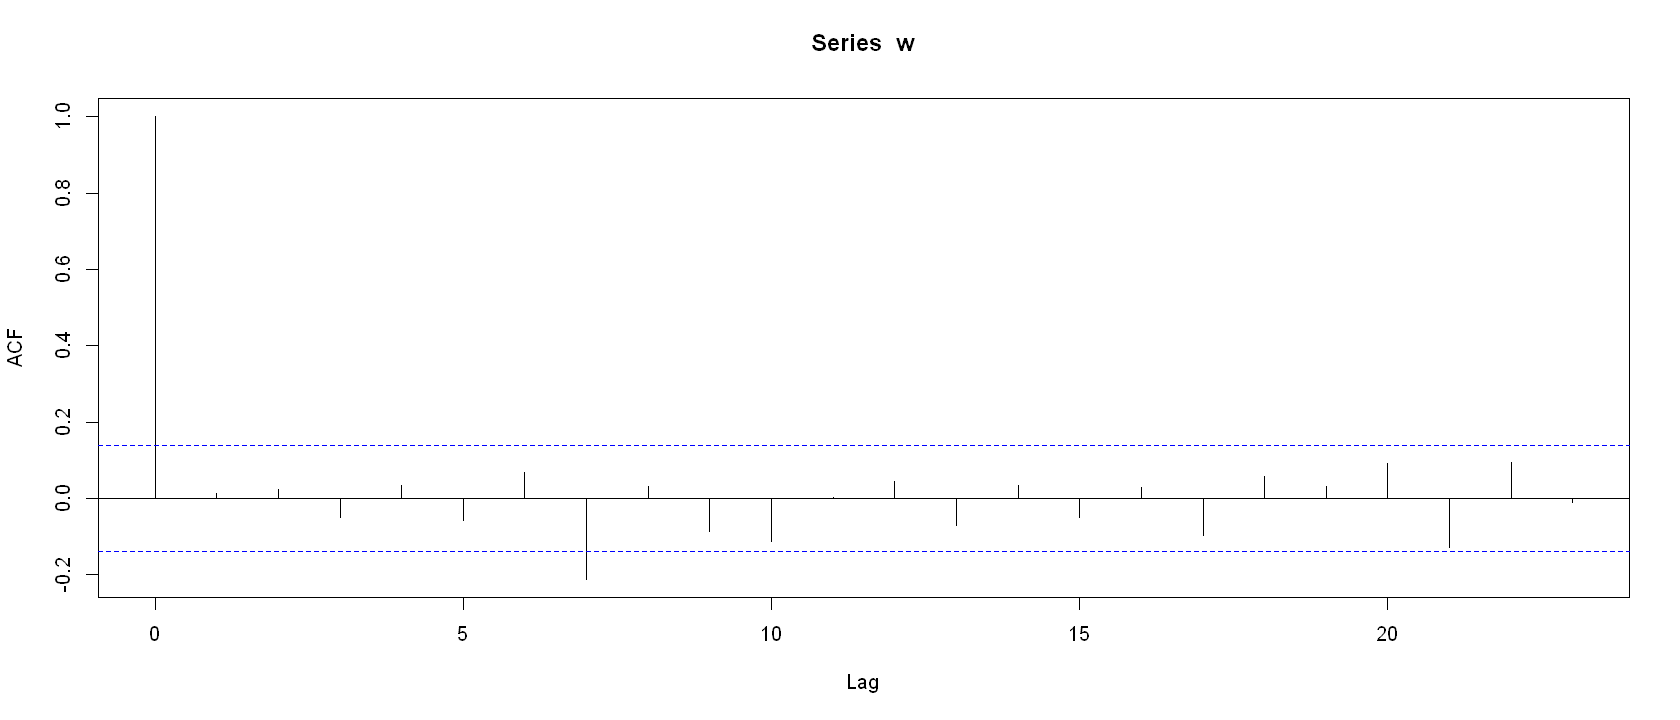

In [118]:
#PREGUNTA NO ENTENDEMOS LA PRIMER LINEA EN 0 PARA AFIRMAR QUE ES UN RUIDO BLANCO y que hay un AR(1) con coef. negativo
#nosotros pensariamos en un AR(2)
w = rnorm(200, 0, 1)
acf(w)

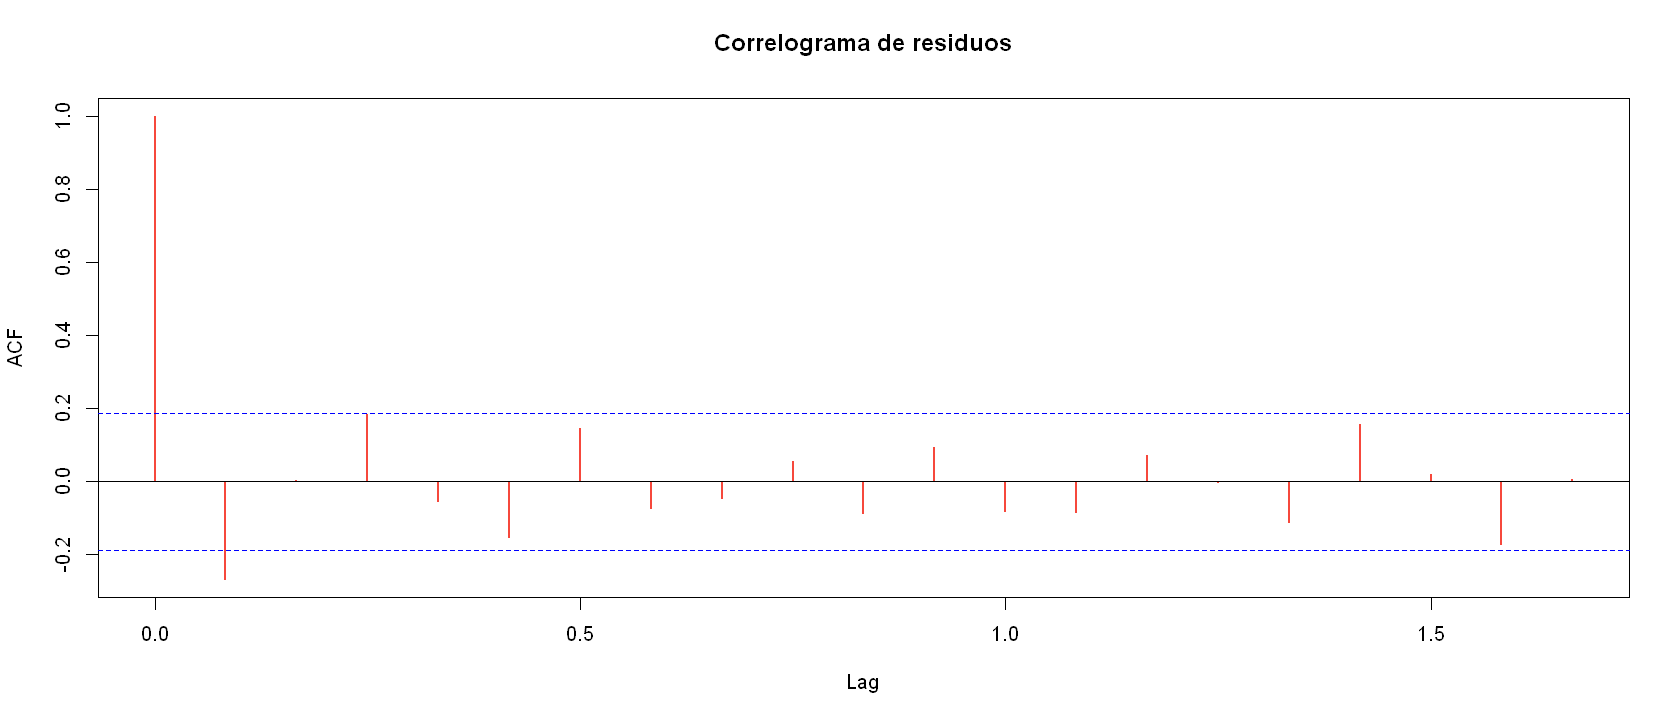

In [40]:
acf(res_p, col = 2, lwd = 2, main = 'Correlograma de residuos')

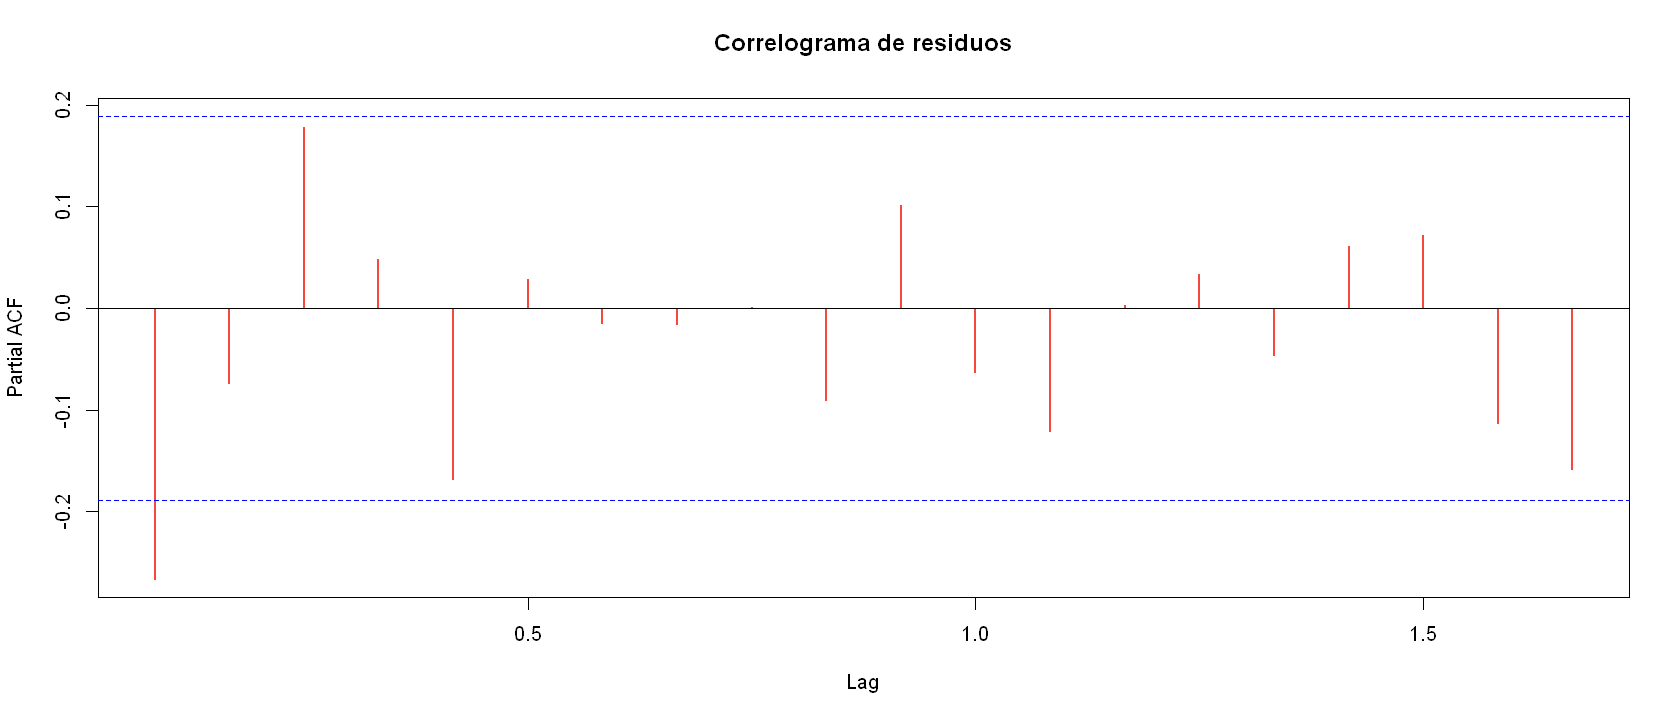

In [41]:
pacf(res_p, col = 2, lwd = 2, main = 'Correlograma de residuos')

In [163]:
# Es un AR de un coeficiente con signo negativo y menor dependencia. Parece aproximarse a un ruido blanco.

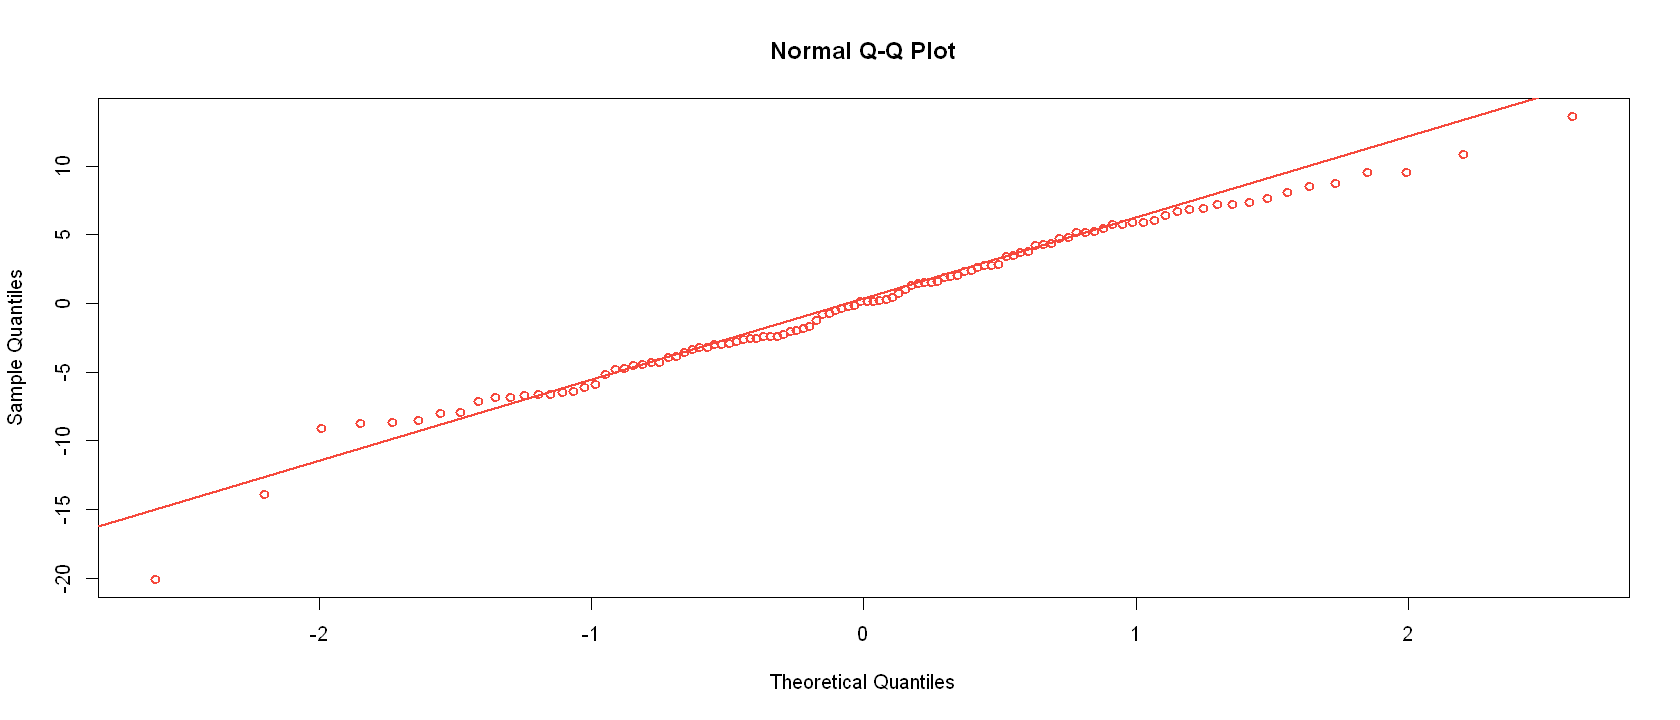

In [42]:
qqnorm(residuals(fit_p1), col = 2,lwd = 2)
qqline(residuals(fit_p1), col = 2,lwd = 2)

In [ ]:
# hacer histograma del fit_p1

CALCULO DE PREDICCIONES DETERMINISTICAS QUE CONSIDERAN LAS FRECUENCIAS DE SENOS Y COSENOS (ajuste fit_p1):

In [43]:
#Agregamos tiempos para 2 años en el futuro. Notar el -2010 para que quede igual que la que ajustamos.
new_t = seq(2019, 2021, by = 1/12) - 2010
new_t

[1]  9.000000  9.083333  9.166667  9.250000  9.333333  9.416667  9.500000
 [8]  9.583333  9.666667  9.750000  9.833333  9.916667 10.000000 10.083333
[15] 10.166667 10.250000 10.333333 10.416667 10.500000 10.583333 10.666667
[22] 10.750000 10.833333 10.916667 11.000000

In [44]:
#Predecimos sobre los nuevos datos:
new_data = data.frame(time = new_t)
pred_sc = predict(fit_p1, new_data);
pred_sc

1          2          3          4          5          6          7 
-10.050917 -10.385556   2.079398   9.870769   5.377333  -1.899250  -4.862546 
         8          9         10         11         12         13         14 
 -5.557481  -3.108972   5.042694  10.565704   2.928824 -10.050917 -10.385556 
        15         16         17         18         19         20         21 
  2.079398   9.870769   5.377333  -1.899250  -4.862546  -5.557481  -3.108972 
        22         23         24         25 
  5.042694  10.565704   2.928824 -10.050917

In [48]:
#Convierto el resultado en time series
pred_sc = ts(pred_sc, start = 2019, freq = 12)
as.numeric(pred_sc)
#PREDIJO LO MISMO PARA 2019 Y PARA 2020???????????????????????????????????

[1] -10.050917 -10.385556   2.079398   9.870769   5.377333  -1.899250
 [7]  -4.862546  -5.557481  -3.108972   5.042694  10.565704   2.928824
[13] -10.050917 -10.385556   2.079398   9.870769   5.377333  -1.899250
[19]  -4.862546  -5.557481  -3.108972   5.042694  10.565704   2.928824
[25] -10.050917

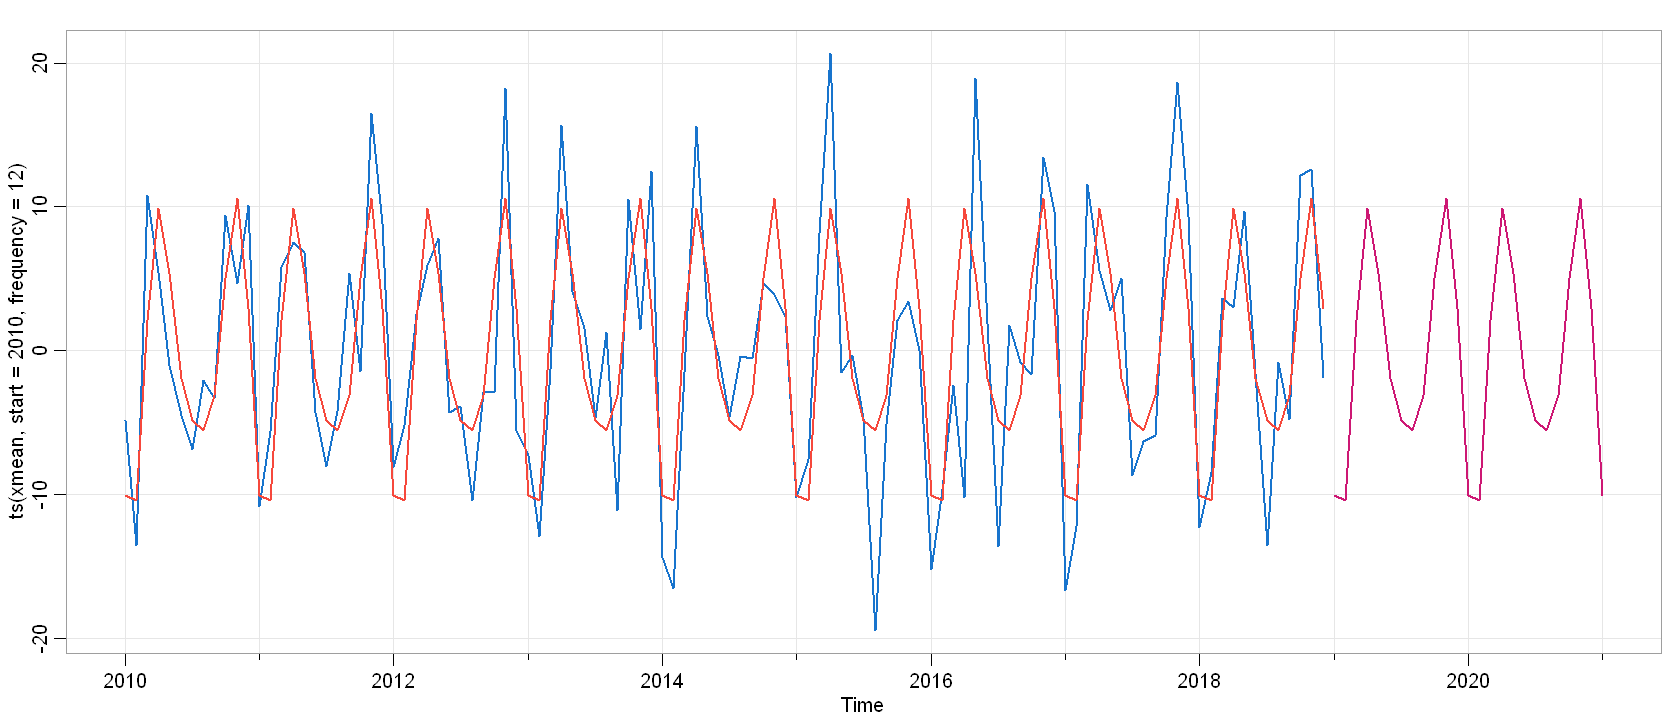

In [49]:
tsplot(ts(xmean, start = 2010, frequency = 12), xlim = c(2010,2021), lwd = 2, col = 4)
lines(predictions_gasoil, col = 2, lwd = 2)

lines(pred_sc, lwd = 2, col = 6)

In [50]:
#hacer un R CUADRADO O RMSE de la prediccion
RMSE_pred_deterministica = sd(residuals(fit_p1))
RMSE_pred_deterministica

[1] 5.619135

VOLVER A LA VARIABLE ORIGINAL

PONER EXPLICACION DE LA ULTIMA GRABACION!!!!

In [139]:
#ESTO ES UN EJEMPLO EN CASO DE QUE HUBIERAMOS DIFERENCIADO LA SERIE, ENTONCES NUESTRAS PREDICCIONES SERIAN INCREMENTOS:
#Al tomar el último valor real de la serie observada ("consumo_hasta_2018") como inicio para las predicciones, la media ya se estaría incluyendo para el resto de ellas.
#El último valor real de la serie real observada es el valor de diciembre 2018:image.png
#Finalmente, a lo que es el ajuste original, debemos poner el primer valor real de la serie observada.

#v_inicial_real = consumo$consumo_miles_m3[1]
#v_final_real = consumo$consumo_miles_m3[108]

#ajuste_original = v_inicial_real + cumsum(predictions_gasoil)
#pred_original = v_final_real +  cumsum(pred_sc)
                                          
#ajuste_original = ts(ajuste_original, start = 2010, frequency = 12)
#pred_original = ts(pred_original, start = 2010, frequency = 12)
                                          
#tsplot(xmean,xlim=c(2010,2021), col=4, lwd=2)
#lines(ajuste_original,col=5, lwd=2)
#lines(pred_original,col=6, lwd=2)
#pred_original

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,63.65582,63.32119,75.78614,83.57751,79.08407,71.80749,68.84419,68.14926,70.59777,78.74944,84.27244,76.63556
2020,63.65582,63.32119,75.78614,83.57751,79.08407,71.80749,68.84419,68.14926,70.59777,78.74944,84.27244,76.63556
2021,63.65582,,,,,,,,,,,


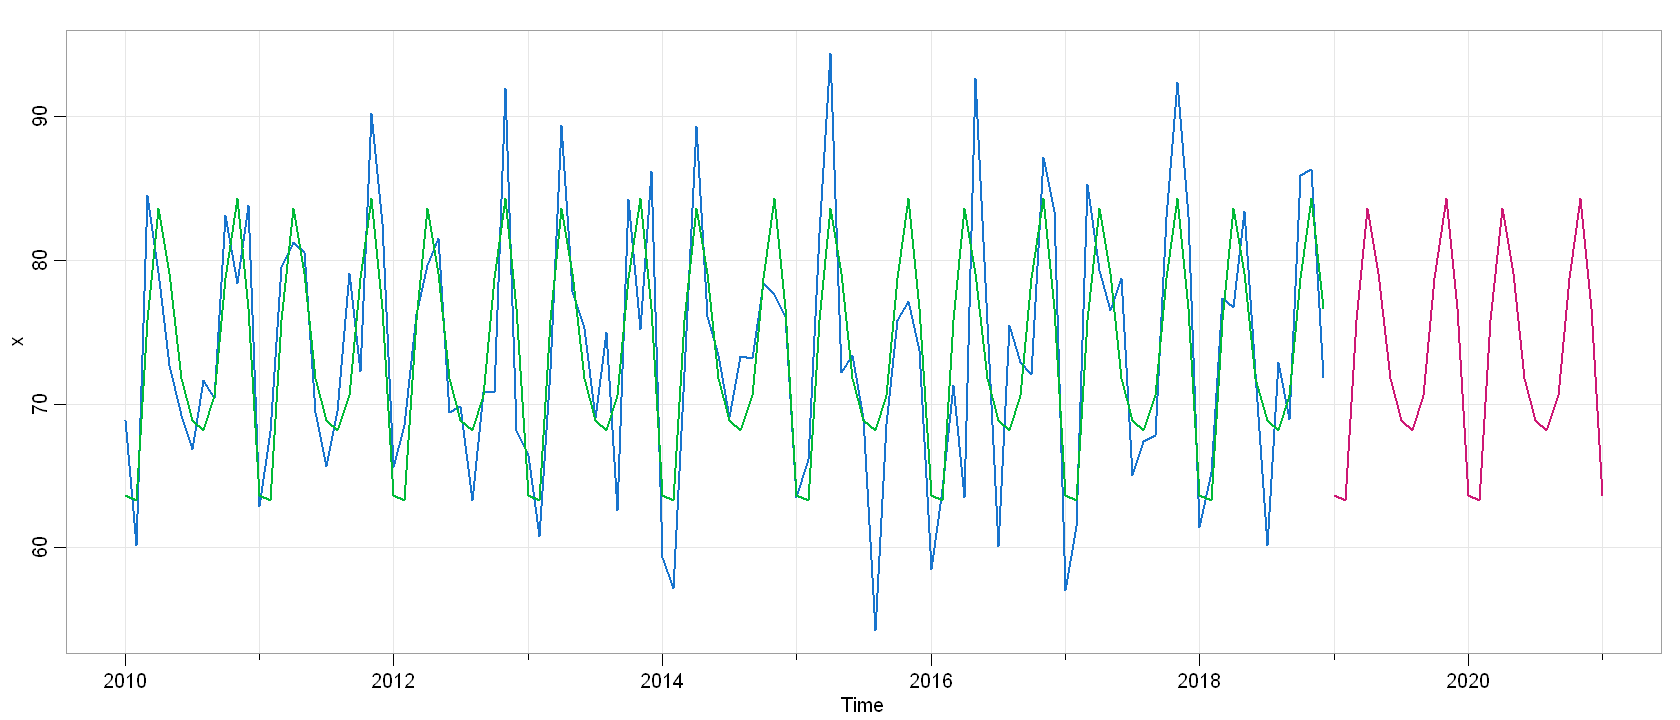

In [54]:
ajuste_original = mean(x) + predictions_gasoil
pred_original = mean(x) + pred_sc

ajuste_original = ts(ajuste_original, start = 2010, frequency = 12)
pred_original = ts(pred_original, start = 2019, frequency = 12)

tsplot(x, xlim = c(2010,2021), col = 4, lwd = 2)
# hacemos sobre x porque le estamos agregando la media y le estamos desdiferenciando (como x)
lines(ajuste_original, col = 3, lwd = 2)
lines(pred_original, col = 6, lwd = 2)
pred_original


A continuación, y basándonos en lo que observamos en el correlograma de los residuos obtenidos a partir del ajuste fit_p1. Ajustaremos a tales residuos un modelo autorregresivo de orden 1, utilizando la función "Arima", que nos permitirá emplear el objeto "forecast" para realizar predicciones sobre la serie original "x":

In [55]:
fitA1 = Arima(res_p, order = c(1, 0, 0), include.mean = F)
fitA1

Series: res_p 
ARIMA(1,0,0) with zero mean 

Coefficients:
          ar1
      -0.2676
s.e.   0.0929

sigma^2 estimated as 29.3:  log likelihood=-335.18
AIC=674.36   AICc=674.47   BIC=679.72

Dado que la serie original no presentan tendencia, volvemos a verificar que diferenciar la serie no ayuda a mejorar el ajuste en este análisis:

In [56]:
fitA2 = Arima(res_p, order = c(1, 1, 0), include.mean = F)
fitA2

Series: res_p 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.6035
s.e.   0.0768

sigma^2 estimated as 50.88:  log likelihood=-361.77
AIC=727.55   AICc=727.66   BIC=732.89

En ambos ajustes el coeficiente del modelo autorregresivo dio significativo, sin embargo, en el ajuste fitA1 (que no genera diferenciación), el AIC es menor, y por lo tanto es un mejor modelo. Es decir que la diferenciación NO aporta a este análisis.

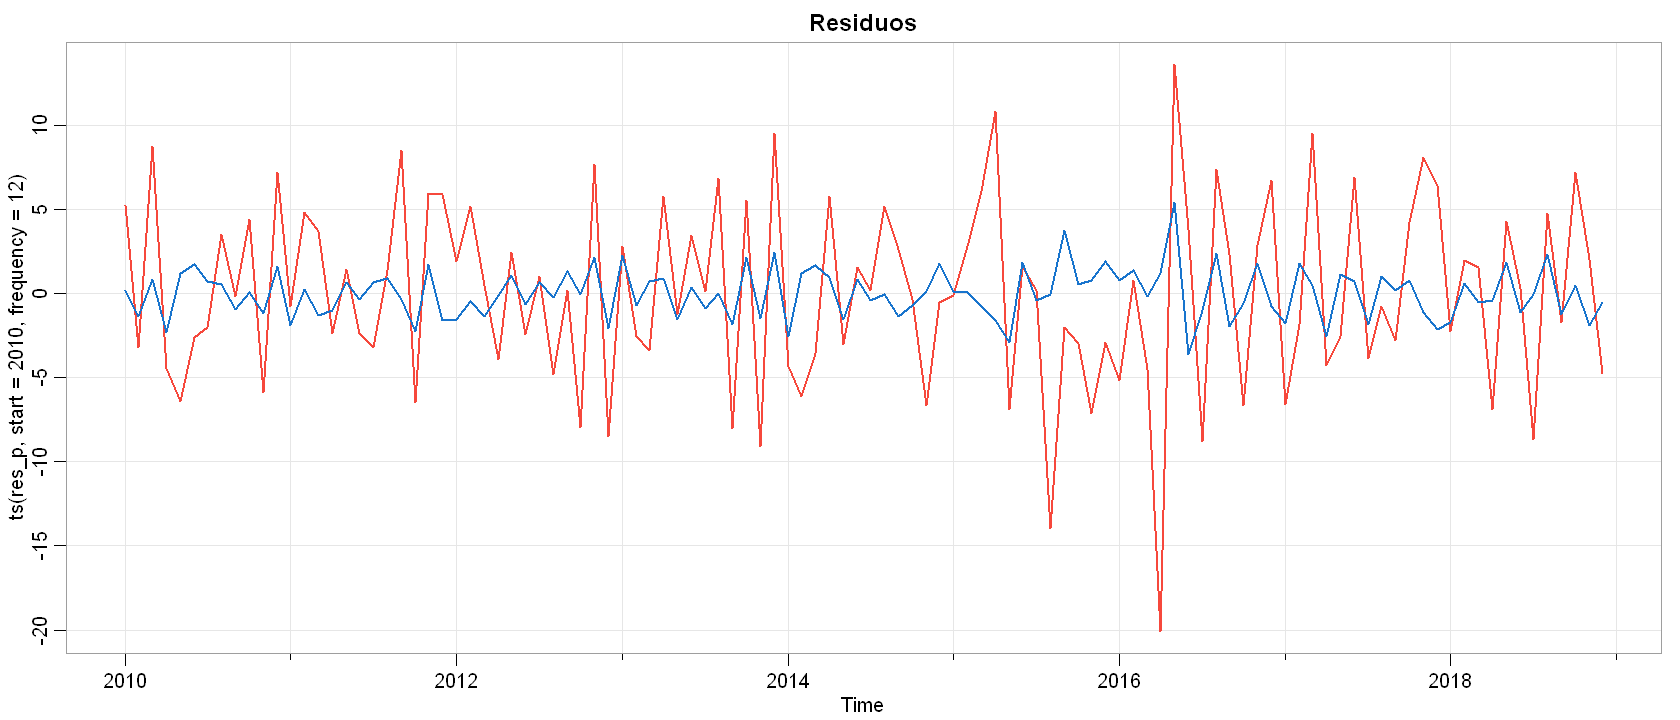

In [57]:
tsplot(ts(res_p, start = 2010, frequency = 12), col = 2, lwd = 2, main = 'Residuos')

pred = ts(fitted(fitA1), start = 2010, frequency = 12)
lines(pred, col = 4, lwd = 2)

In [58]:
var(res_p)

[1] 31.57467

In [59]:
sd(res_p - pred)

[1] 5.413341

In [61]:
RMSE_pred_autorregresiva = sd(residuals(fitA1))
RMSE_pred_autorregresiva

[1] 5.413341


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with zero mean
Q* = 23.552, df = 21, p-value = 0.3152

Model df: 1.   Total lags used: 22



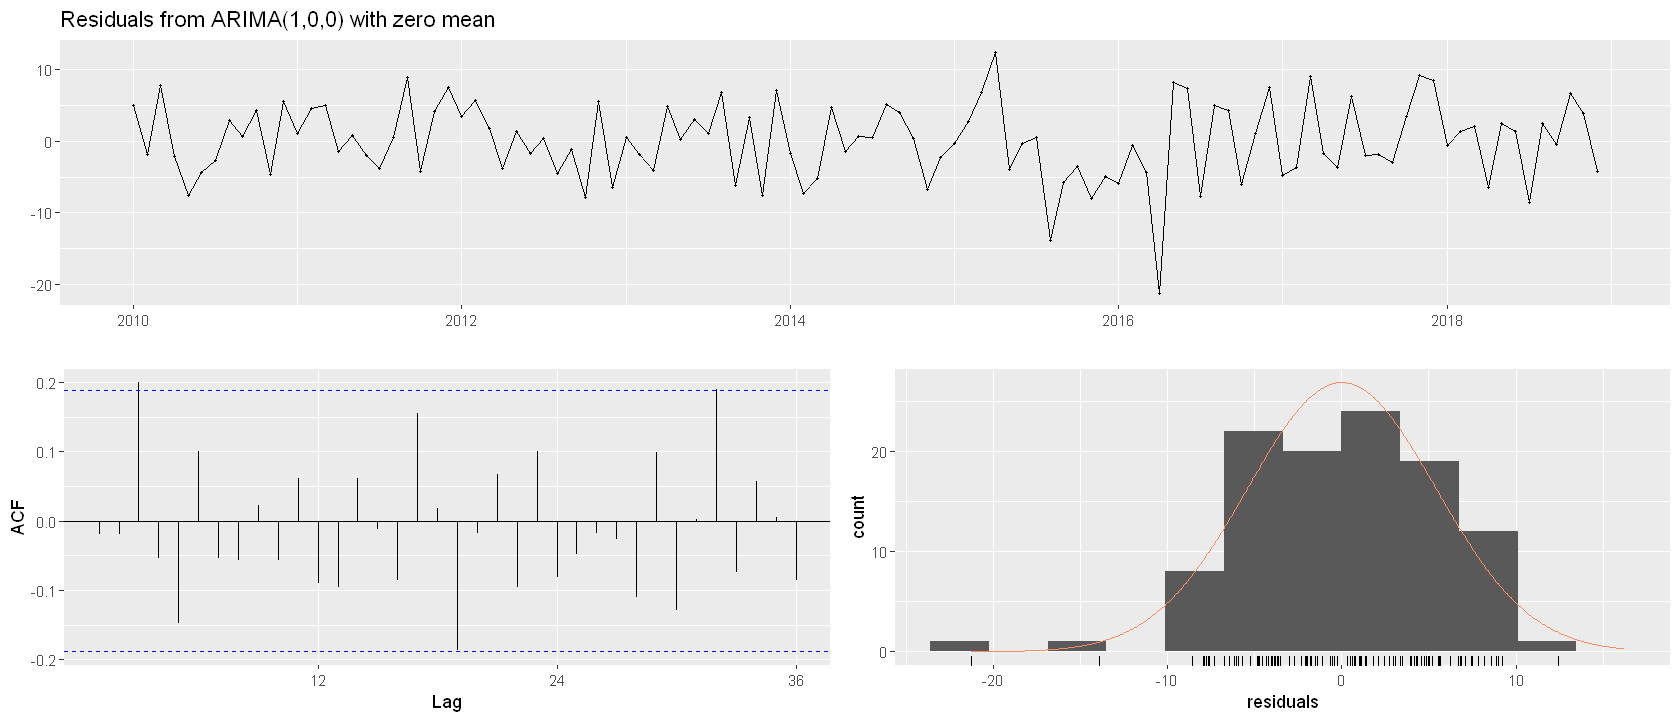

In [62]:
checkresiduals(fitA1)

         Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
Jan 2019   1.276034e+00 -5.661454 8.213522  -9.333938 11.88601
Feb 2019  -3.415293e-01 -7.523207 6.840148 -11.324957 10.64190
Mar 2019   9.141000e-02 -7.107442 7.290262 -10.918284 11.10110
Apr 2019  -2.446580e-02 -7.224547 7.175615 -11.036039 10.98711
May 2019   6.548248e-03 -7.193621 7.206717 -11.005160 11.01826
Jun 2019  -1.752632e-03 -7.201928 7.198423 -11.013470 11.00997
Jul 2019   4.690904e-04 -7.199707 7.200645 -11.011249 11.01219
Aug 2019  -1.255516e-04 -7.200301 7.200050 -11.011844 11.01159
Sep 2019   3.360377e-05 -7.200142 7.200209 -11.011685 11.01175
Oct 2019  -8.994017e-06 -7.200185 7.200167 -11.011727 11.01171
Nov 2019   2.407240e-06 -7.200173 7.200178 -11.011716 11.01172
Dec 2019  -6.442955e-07 -7.200176 7.200175 -11.011719 11.01172
Jan 2020   1.724451e-07 -7.200176 7.200176 -11.011718 11.01172
Feb 2020  -4.615476e-08 -7.200176 7.200176 -11.011719 11.01172
Mar 2020   1.235328e-08 -7.200176 7.200176 -11.011718 1

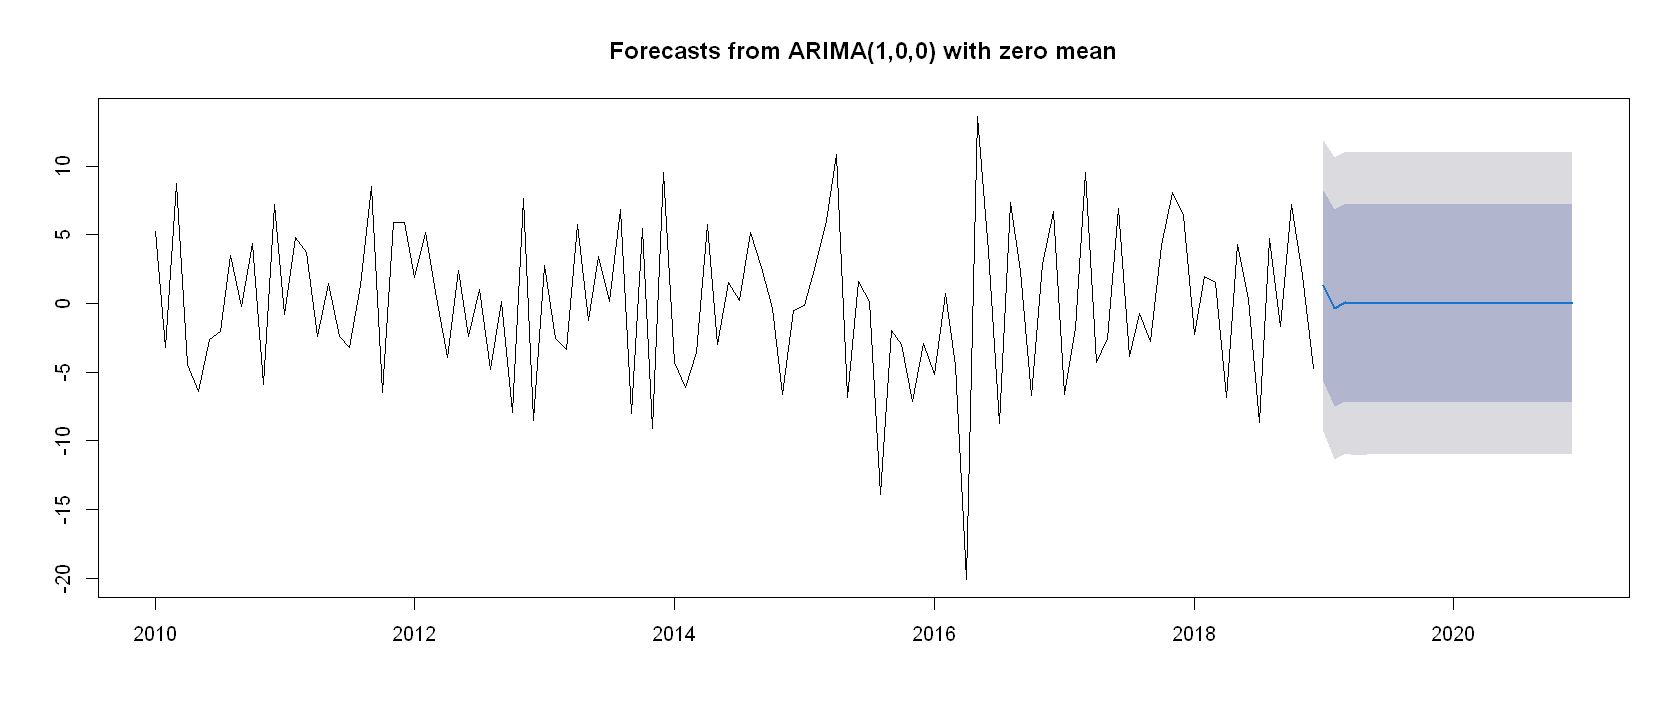

In [63]:
# Prediccion de dos años para adelante
predA = forecast(fitA1, h = 24)
predA
plot(forecast(fitA1, h = 24))
# ASI ESTA BIEN HECHO EL h

In [67]:
predA_media = predA$mean
predA_lower = predA$lower[,2]   
predA_upper = predA$upper[,2]  

predA_media = pred_sc + predA_media
predA_lower = pred_sc + predA_lower
predA_upper = pred_sc + predA_upper

predA_media 
predA_lower 
predA_upper 

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,-8.774882,-10.727085,2.170808,9.846303,5.383882,-1.901003,-4.862077,-5.557607,-3.108939,5.042685,10.565706,2.928823
2020,-10.050916,-10.385556,2.079398,9.870769,5.377333,-1.899250,-4.862546,-5.557481,-3.108972,5.042694,10.565704,2.928824


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,-19.3848546,-21.7105125,-8.8388861,-1.1652708,-5.6278265,-12.9127204,-15.8737956,-16.5693255,-14.1206571,-5.9690330,-0.4460124,-8.0828950
2020,-21.0626350,-21.3972741,-8.9323203,-1.1409500,-5.6343851,-12.9109685,-15.8742648,-16.5692000,-14.1206907,-5.9690240,-0.4460148,-8.0828944


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,1.8350896,0.2563427,13.1805024,20.8578762,16.3955897,9.1107151,6.1496412,5.4541114,7.9027799,16.0544039,21.5774246,13.9405419
2020,0.9608020,0.6261629,13.0911166,20.8824870,16.3890518,9.1124685,6.1491722,5.4542370,7.9027462,16.0544129,21.5774222,13.9405425


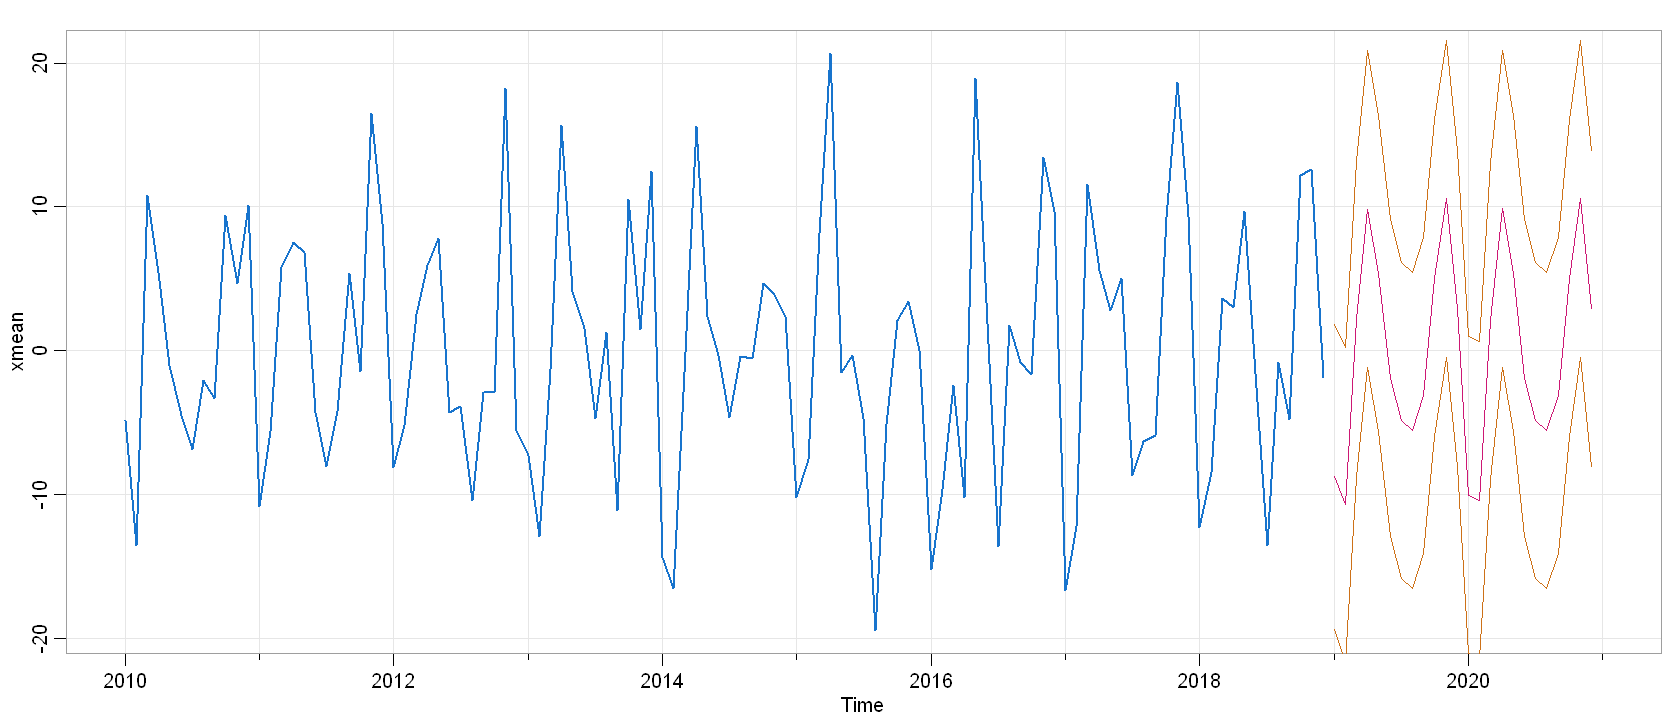

In [150]:
tsplot(xmean,xlim = c(2010,2021), lwd = 2, col = 4)
lines(predA_media, col = 6)
lines(predA_lower, col = 7)
lines(predA_upper, col = 7)

RETORNO A LA VARIABLE ORIGINAL

In [68]:
# v_final_real = consumo$consumo_miles_m3[108] EN CASO DE HABER TRABAJADO CON UNA SERIE DIFERENCIADA

predA_media_f = mean(x) + predA_media
predA_lower_f = mean(x) + predA_lower
predA_upper_f = mean(x) + predA_upper

predA_media_f 
predA_lower_f
predA_upper_f 

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,64.93186,62.97966,75.87755,83.55304,79.09062,71.80574,68.84466,68.14913,70.59780,78.74943,84.27245,76.63556
2020,63.65582,63.32119,75.78614,83.57751,79.08407,71.80749,68.84419,68.14926,70.59777,78.74944,84.27244,76.63556


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,54.32189,51.99623,64.86785,72.54147,68.07891,60.79402,57.83295,57.13742,59.58608,67.73771,73.26073,65.62385
2020,52.64411,52.30947,64.77442,72.56579,68.07236,60.79577,57.83248,57.13754,59.58605,67.73772,73.26073,65.62385


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,75.54183,73.96308,86.88724,94.56462,90.10233,82.81746,79.85638,79.16085,81.60952,89.76114,95.28417,87.64728
2020,74.66754,74.33290,86.79786,94.58923,90.09579,82.81921,79.85591,79.16098,81.60949,89.76115,95.28416,87.64728


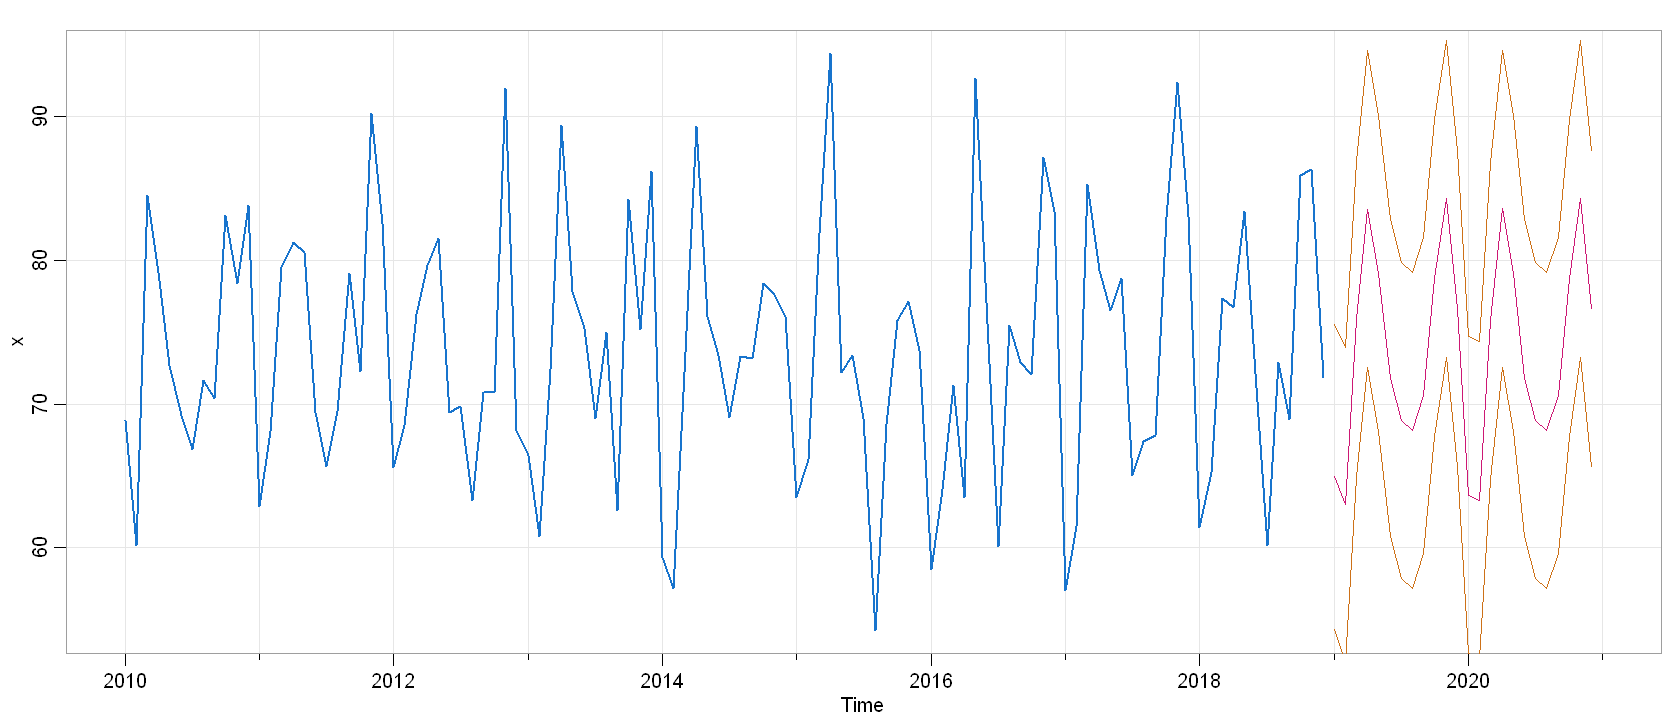

In [69]:
#PREGUNTAR ESCALA DE GRAFICOS Y SI ESTO ESTÁ CORRECTOOOOOOOOOOOOOOOOOOOOO

tsplot(x,xlim = c(2010,2021), lwd = 2, col = 4)
lines(ts(predA_media_f, start = 2019, frequency=12), col = 6)
lines(ts(predA_lower_f, start = 2019, frequency=12), col = 7)
lines(ts(predA_upper_f, start = 2019, frequency=12), col = 7)


EVALUACION VALORES REALES 2019-2020 VS PREDICCIONES 

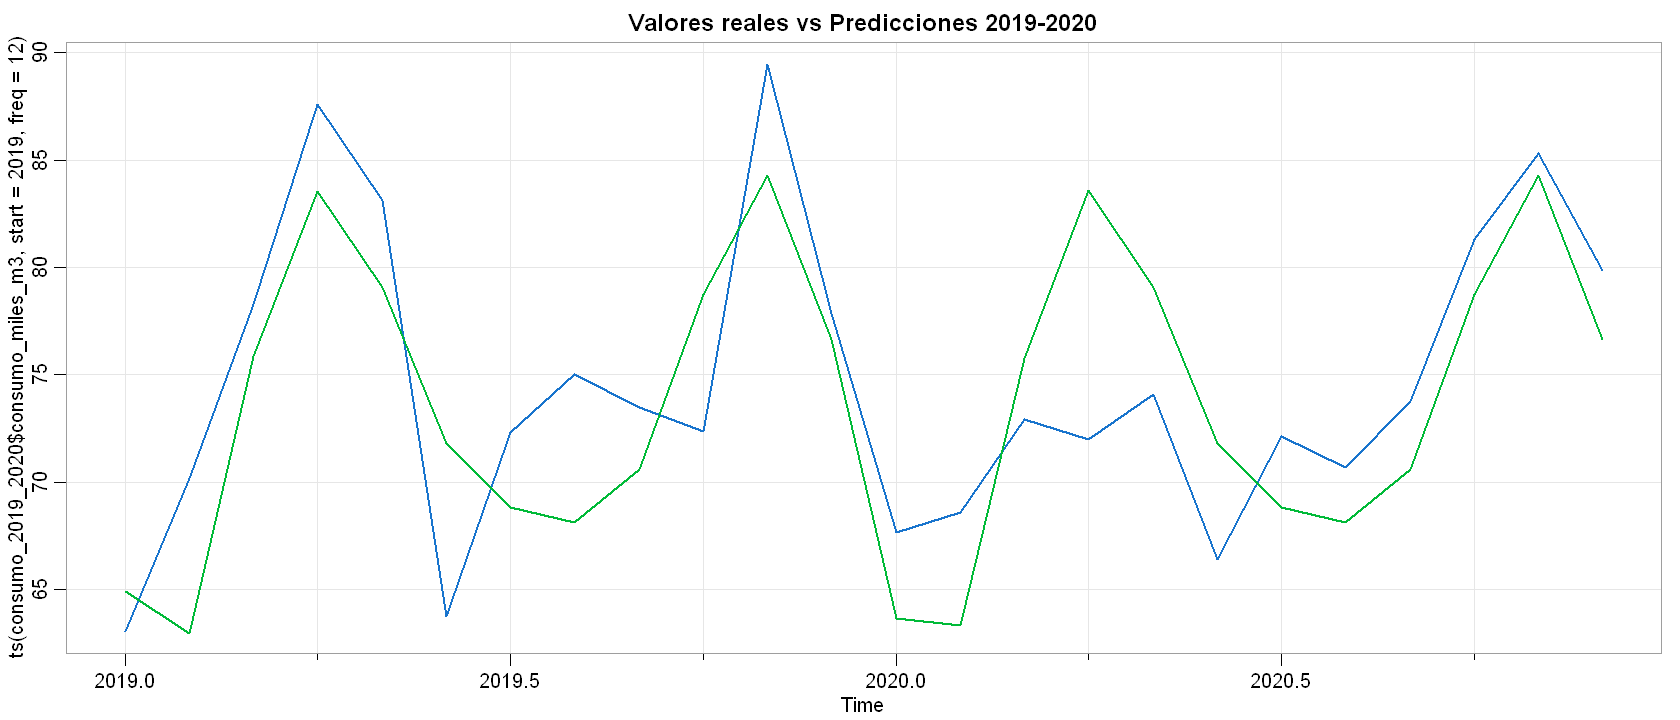

In [92]:
tsplot(ts(consumo_2019_2020$consumo_miles_m3, start = 2019, freq = 12), main = "Valores reales vs Predicciones 2019-2020", col = 4, lwd = 2)
lines(ts(predA_media_f, start = 2019, freq = 12), col = 3, lwd = 2)

In [105]:
valores_reales = consumo_2019_2020$consumo_miles_m3
predicciones = predA_media_f

In [106]:
rmse(valores_reales, predicciones)

[1] 4.922196

In [ ]:
def mariana(y_true, y_pred):
    return backend.mean(backend.abs(y_pred/y_true-1)*100, axis=-1)

ANÁLISIS APARTADO 1:

A continuación haremos un análisis diferente, tomando la serie "xmean" y aplicandole la funcion "Arima" en un intento de obtener componentes periódicas aleatorias (en lugar de las sistemáticas que fueron halladas haciendo uso del periodograma):

In [71]:
fit_func_arima1 = Arima(xmean, order = c(1,0,1), include.mean = F)
fit_func_arima1

Series: xmean 
ARIMA(1,0,1) with zero mean 

Coefficients:
          ar1     ma1
      -0.2457  0.4734
s.e.   0.2412  0.2096

sigma^2 estimated as 74.64:  log likelihood=-385.16
AIC=776.31   AICc=776.54   BIC=784.36

In [72]:
fit_func_arima2 = Arima(xmean, order = c(2,0,2), include.mean = F)
fit_func_arima2

ERROR: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean, : non-stationary AR part from CSS


In [73]:
fit_func_arima3 = Arima(xmean, order = c(2,0,1), include.mean = F)
fit_func_arima3

Series: xmean 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      0.6519  -0.4966  -0.5942
s.e.  0.1082   0.0850   0.0974

sigma^2 estimated as 58.2:  log likelihood=-371.54
AIC=751.08   AICc=751.46   BIC=761.8

In [74]:
fit_func_arima4 = Arima(xmean, order = c(1,0,2), include.mean = F)
fit_func_arima4

Series: xmean 
ARIMA(1,0,2) with zero mean 

Coefficients:
         ar1      ma1      ma2
      0.3616  -0.3519  -0.3767
s.e.  0.1653   0.1447   0.0802

sigma^2 estimated as 64.4:  log likelihood=-376.86
AIC=761.72   AICc=762.1   BIC=772.44

In [75]:
fit_func_arima5 = Arima(xmean, order = c(3,0,3), include.mean = F)
fit_func_arima5

Series: xmean 
ARIMA(3,0,3) with zero mean 

Coefficients:
         ar1      ar2      ar3      ma1      ma2     ma3
      0.0223  -0.0161  -0.9757  -0.0801  -0.0798  0.9998
s.e.  0.0302   0.0303   0.0295   0.0737   0.0773  0.0725

sigma^2 estimated as 38.26:  log likelihood=-351.49
AIC=716.97   AICc=718.09   BIC=735.75

Elegimos el ARMA(2,1) correspondiente al ajuste "fit_func_arima3", ya que tiene el menor AIC, y los coeficientes son todos significativos:

In [63]:
res_fit_func_arima3 = residuals(fit_func_arima3)

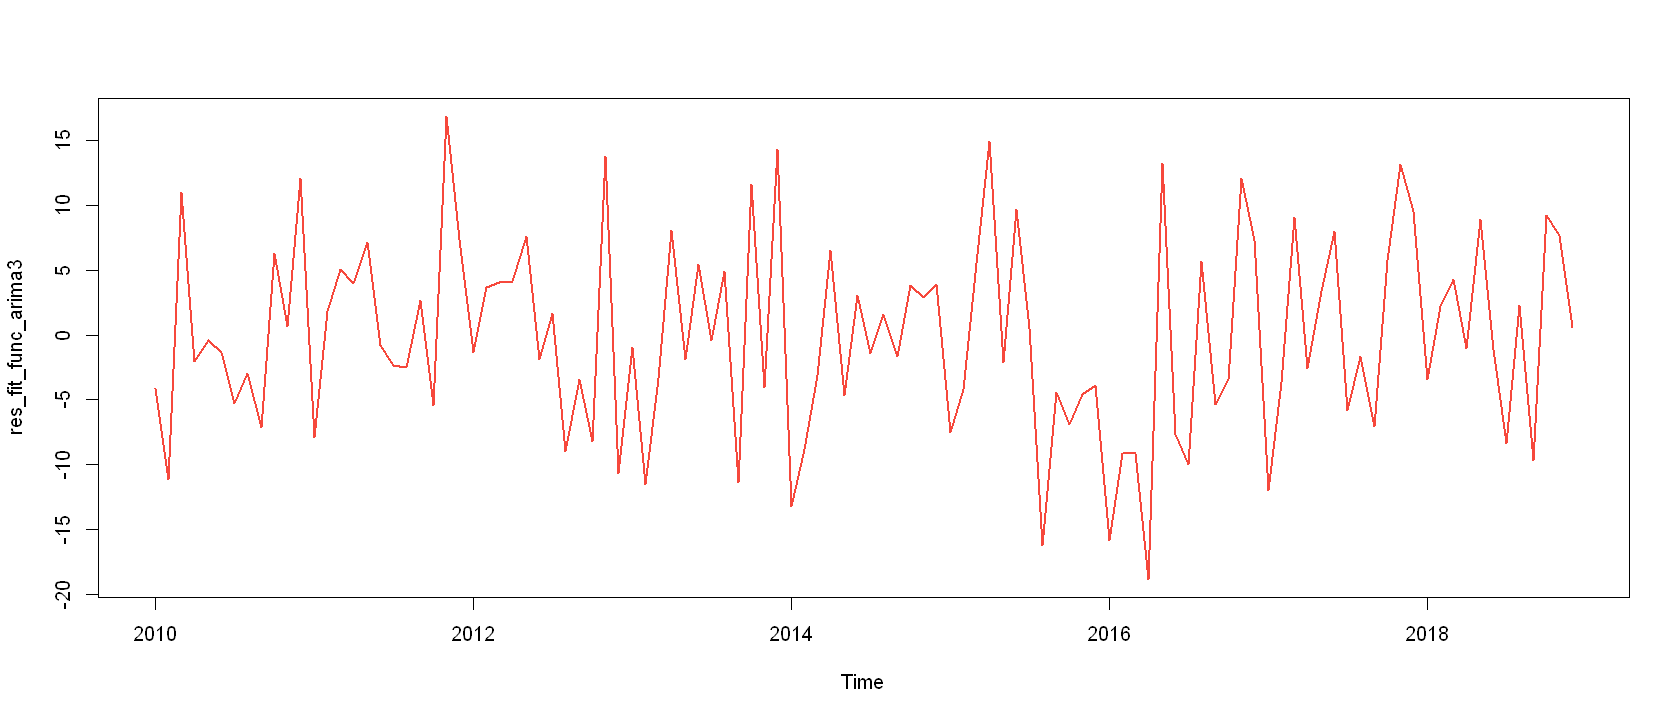

In [64]:
plot(res_fit_func_arima3, col = 2, lwd = 2)

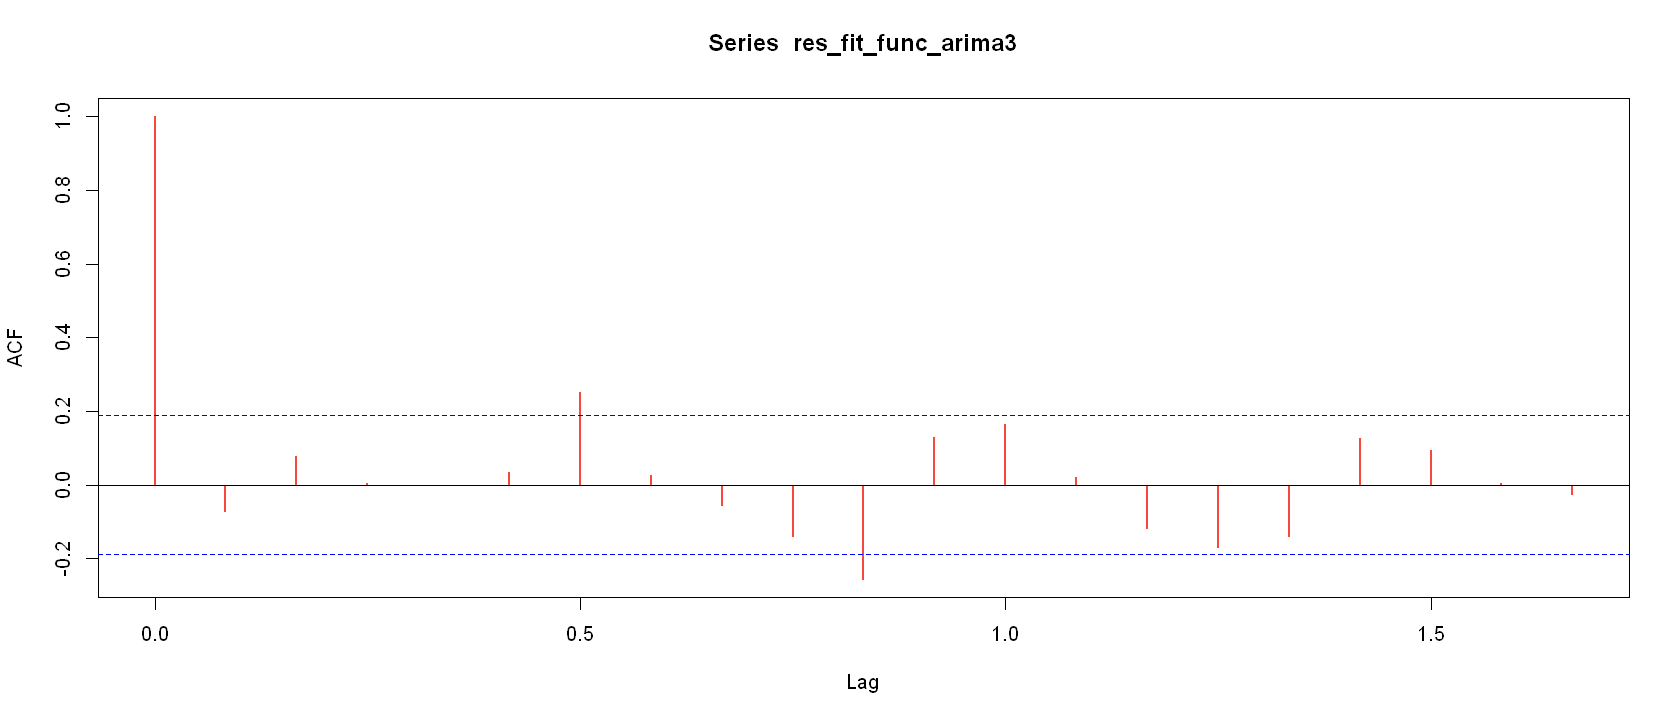

In [65]:
acf(res_fit_func_arima3, col = 2, lwd = 2)

FINALMENTE, AJUSTAMOS UN MODELO ARIMA DE ORDEN 1 A LA SERIE ORIGINAL "x" SIN DIFERENCIAR. De este modo, las predicciones que haremos ya están desdiferenciadas.
Vamos entonces a la serie original SIN diferenciar y le aplicamos un ARIMA de orden 1 para diferenciarla una sola vez. A su vez ponemos una parte autorregresiva de orden 2 y una parte de media móvil de orden 2 porque vimos que era lo que mejor ajustaba al diferenciar la serie xmean.

In [68]:
#los coef. autorregresivos no cambiaron, por ende verificamos que el log no es demasiado util
fit_func_arima_f = Arima(x, order = c(2, 0, 1), include.mean = F)
fit_func_arima_f

ERROR: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean, : non-stationary AR part from CSS



	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)
Q* = 48.615, df = 18, p-value = 0.0001219

Model df: 4.   Total lags used: 22



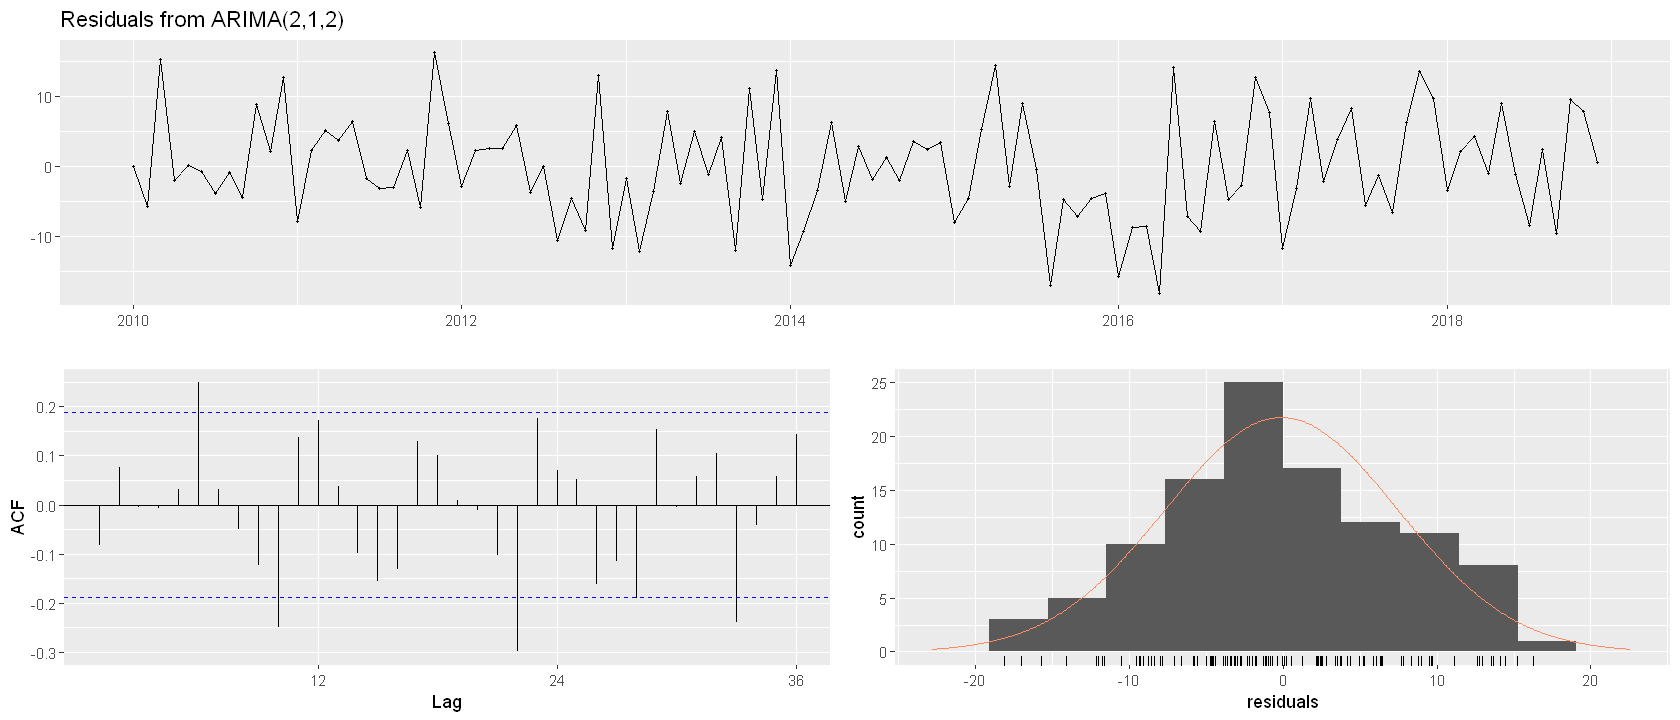

In [870]:
checkresiduals(fit_func_arima_f)


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       65.95482 56.03423 75.87541 50.78259 81.12705
Feb 2019       69.58013 59.63152 79.52873 54.36505 84.79521
Mar 2019       74.84544 63.97959 85.71129 58.22756 91.46332
Apr 2019       76.46414 65.14806 87.78022 59.15770 93.77059
May 2019       74.91295 63.59591 86.23000 57.60502 92.22089
Jun 2019       73.10992 61.66635 84.55349 55.60849 90.61135
Jul 2019       72.70851 61.21571 84.20130 55.13179 90.28522
Aug 2019       73.33865 61.84546 84.83185 55.76133 90.91598
Sep 2019       73.94467 62.43812 85.45122 56.34692 91.54242
Oct 2019       74.02589 62.51635 85.53544 56.42357 91.62822
Nov 2019       73.77934 62.26901 85.28967 56.17581 91.38287
Dec 2019       73.57966 62.06642 85.09290 55.97168 91.18765
Jan 2020       73.57211 62.05812 85.08610 55.96298 91.18124
Feb 2020       73.66578 62.15189 85.17968 56.05680 91.27476
Mar 2020       73.73014 62.21631 85.24398 56.12125 91.33903
Apr 2020       73.72557 62.21181 85.2393

Warning message in plot.window(xlim, ylim, log, ...):
""h" is not a graphical parameter"Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
""h" is not a graphical parameter"Warning message in box(...):
""h" is not a graphical parameter"

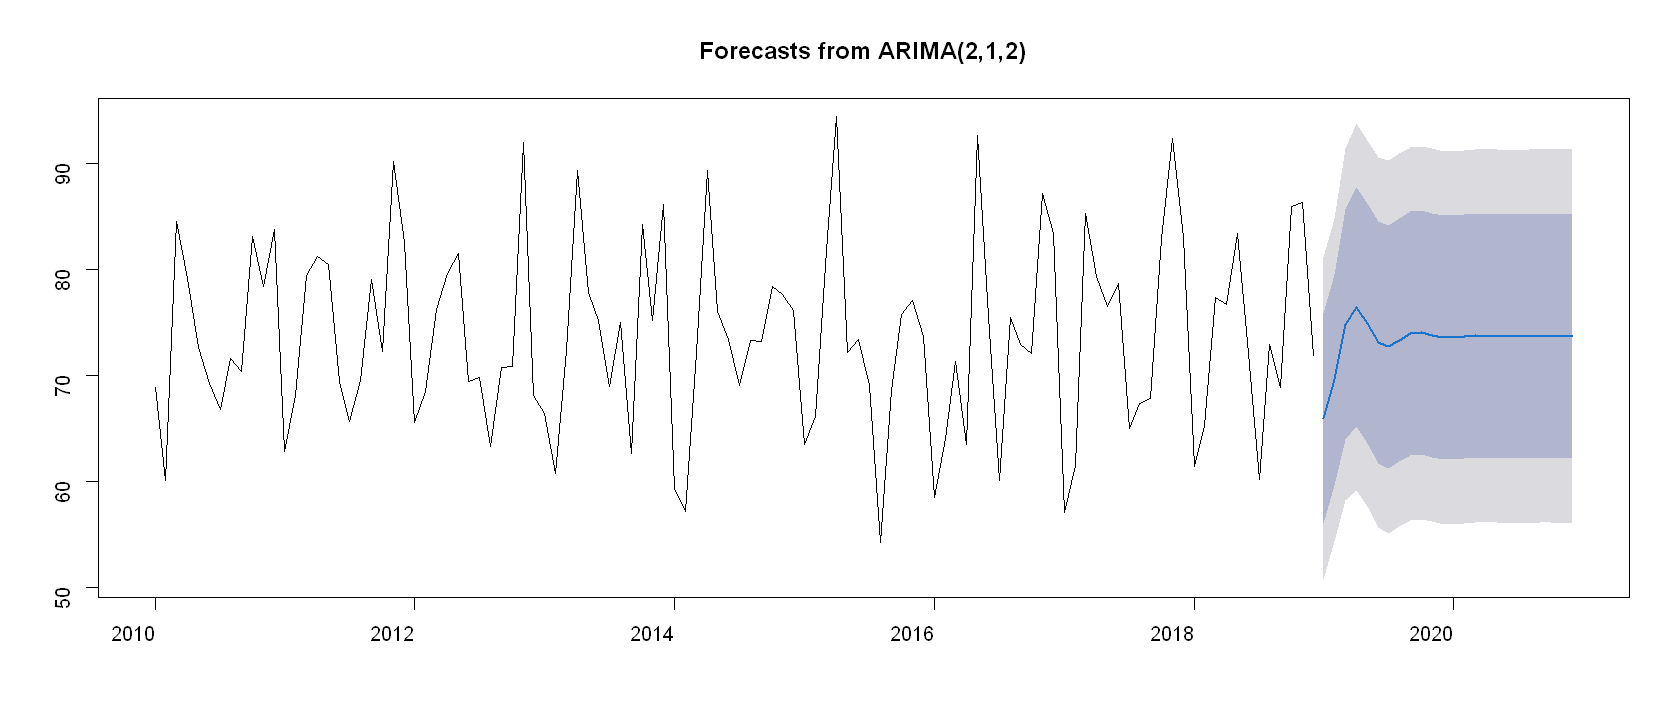

In [875]:
pred_func_arima_f = forecast(fit_func_arima_f, h = 24)
pred_func_arima_f
plot(forecast(fit_func_arima_f, h = 24))


PREGUNTAR SI ESTA BIEN!!!!!! En el gráfico anterior observamos que a medida aumenta el horizonte de predicción, las predicciones tienden a la media de la serie original "x"

In [876]:
mean(x)

[1] 73.70674

In [872]:
RMSE_func_arima = sd(residuals(fit_func_arima_f))
RMSE_func_arima

[1] 7.558474

COMPARAR ESTE RESULTADO CON EL OBTENIDO AL PPIO QUE TIENE LA PARTE DE SENOS Y COSENOS Y LA PARTE AUTORREGRESIVA AJUSTAD A LOS RESIDUOS DE ESE AJUSTE, DUDA: AHI HAY DOS RMSE, como comparar dos RMSE con este ultimo???!!!!!!!!!!!!!!!!!!!!!

ANÁLISIS APARTADO 2:

A continuación realizamos un análisis diferente ajustando un modelo autorregresivo sobre la serie "xmean" (que es estacionaria) con coeficientes únicamente en el cuarto y sexto lugar (ya que nuestras frecuencias elegidas son cuatrimestrales y semestrales respectivamente). Haremos esto porque consideramos la posibilidad de que el valor actual de la serie observada tenga una correlación con el valor de la serie en tres, cuatro y seis meses antes.

Lo que estaremos haciendo en este análisis es forzar algunos coeficientes del modelo a que den cero, dejando únicamente aquellos que nos interesan. Esto no lo podemos hacer con la función "Arima", por ende, lo haremos del siguiente modo:


In [69]:
# Quitamos el Intercept porque la serie ya está centrada
df_aux = ts.intersect(x = xmean, xt1 = lag(xmean,-4), xt2 = lag(xmean, -6))
fit_autorregresivo_estacional1 = lm(x ~ 0 + xt1 + xt2 , data = df_aux)
summary(fit_autorregresivo_estacional1)
phi1<- fit_autorregresivo_estacional1$coef["xt1"]
phi2<- fit_autorregresivo_estacional1$coef["xt2"]

phi1
phi2



Call:
lm(formula = x ~ 0 + xt1 + xt2, data = df_aux)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.6200  -5.8685  -0.1096   4.8196  18.5584 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1 -0.04853    0.09355  -0.519    0.605    
xt2  0.48288    0.09341   5.169 1.21e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.75 on 100 degrees of freedom
Multiple R-squared:  0.2473,	Adjusted R-squared:  0.2323 
F-statistic: 16.43 on 2 and 100 DF,  p-value: 6.768e-07


xt1 
-0.04853414

xt2 
0.4828849

In [70]:
fit_autorregresivo_estacional2 = lm(x ~ 0 + xt2, data = df_aux)
summary(fit_autorregresivo_estacional2)

phi2<- fit_autorregresivo_estacional2$coef["xt2"]

phi2


Call:
lm(formula = x ~ 0 + xt2, data = df_aux)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.153  -5.735   0.120   5.075  18.362 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt2  0.49978    0.08723    5.73 1.05e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.722 on 101 degrees of freedom
Multiple R-squared:  0.2453,	Adjusted R-squared:  0.2378 
F-statistic: 32.83 on 1 and 101 DF,  p-value: 1.046e-07


xt2 
0.4997845

Nos quedamos con el ajuste fit_autorregresivo_estacional2, ya que entre este y el fit_autorregresivo_estacional1, el R cuadrado se mantiene prácticamente invariante.

A continuación graficamos los residuos de dicho ajuste:

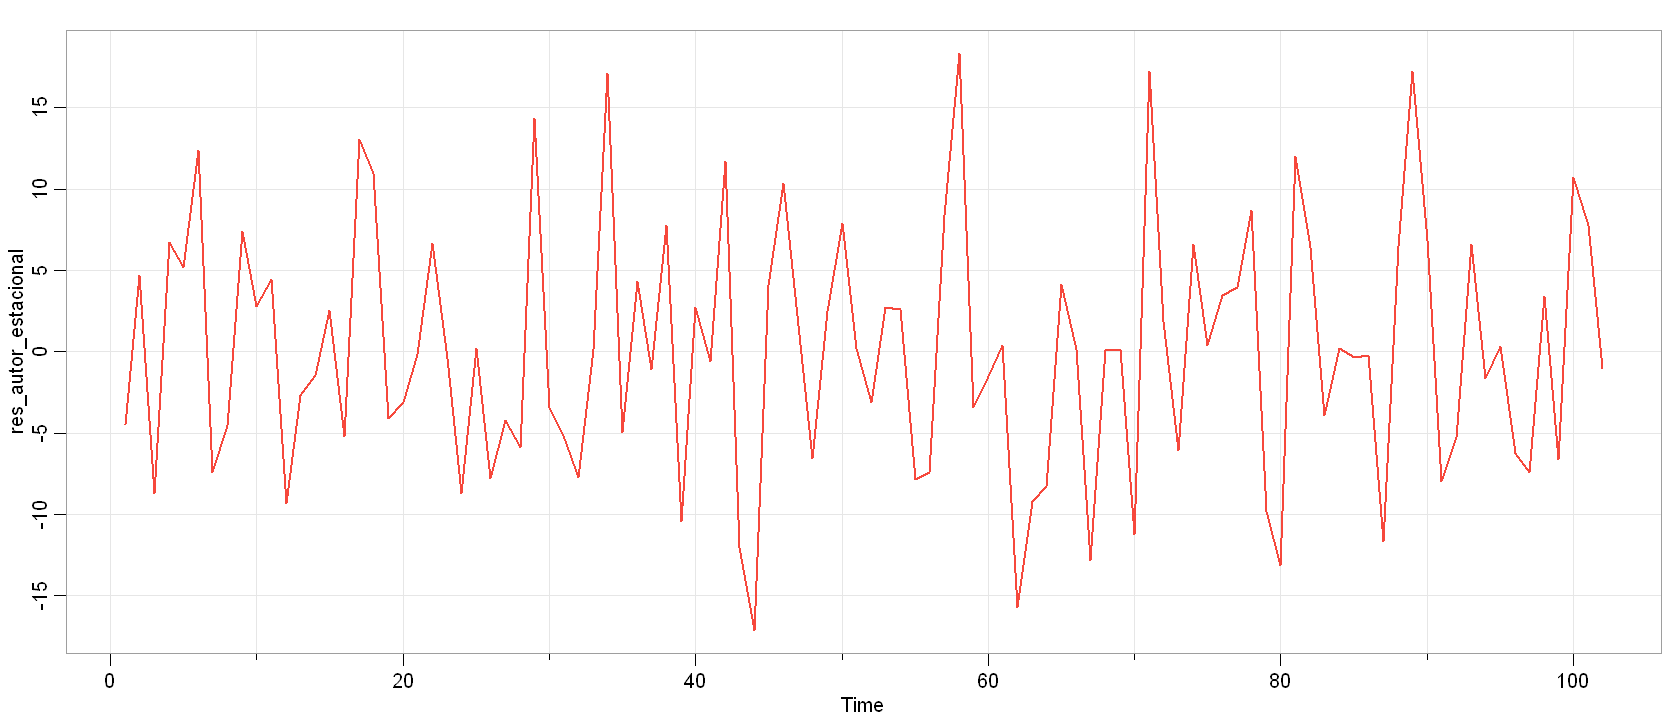

In [71]:
res_autor_estacional = residuals(fit_autorregresivo_estacional2)
tsplot(res_autor_estacional, col = 2, lwd = 2)

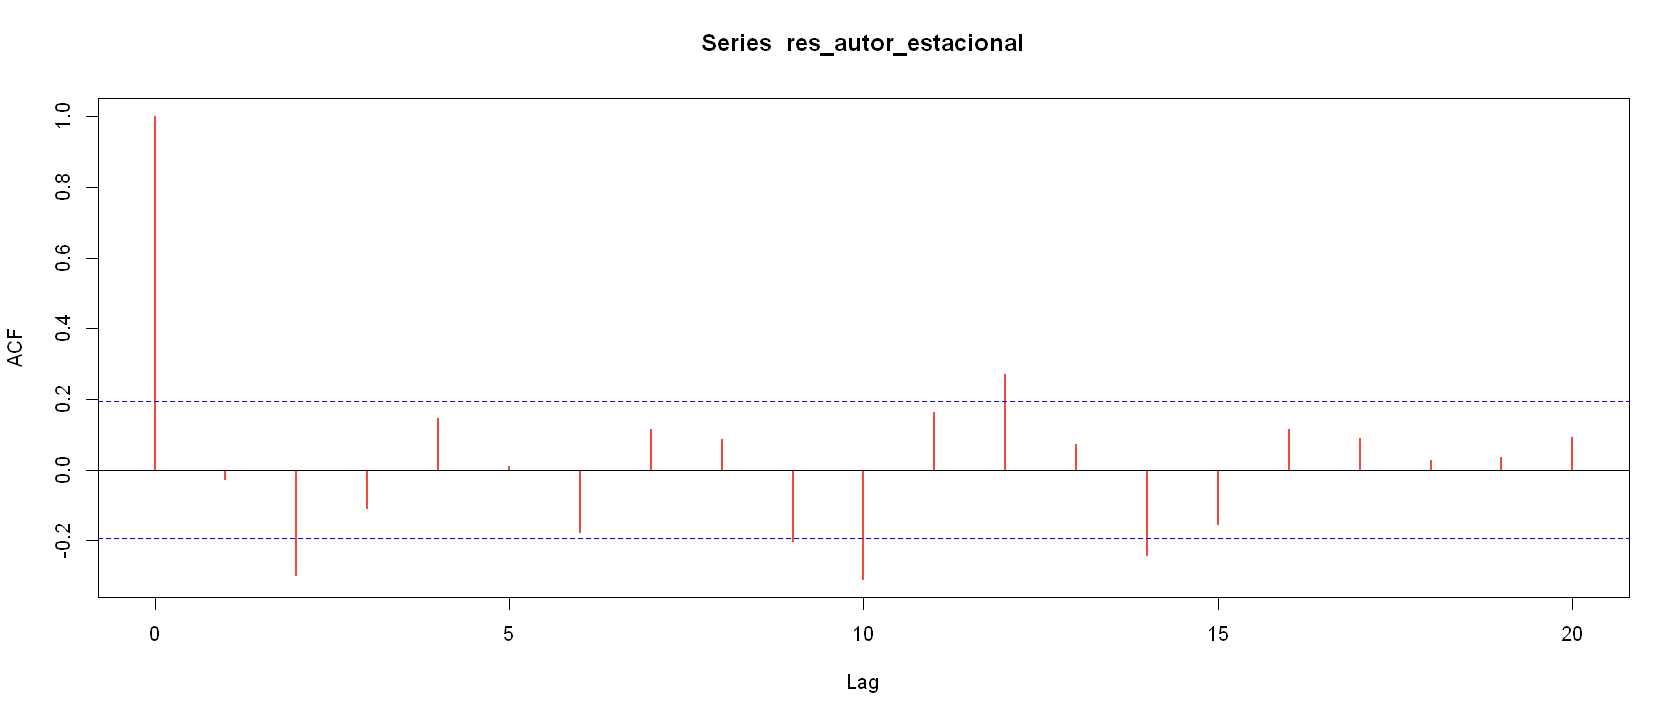

In [73]:
acf(res_autor_estacional, col = 2, lwd = 2)

In [74]:
RMSE_autor_estacional = sd(residuals(fit_autorregresivo_estacional2))
RMSE_autor_estacional

[1] 7.721679

HACER ALGUN COMENTARIO!!!!!!!!!!!!!!!! era una idea, no dio muy bien, pero descartamos esto y listo!!

In [75]:
# PREGUNTAR ESTE APARTADO AR(6) POR LA SIGNIFICACION DE SUS COEFICIENTES Y EL SENTIDO DE HACERLO EN SÍ MISMO
fit_autorregresivo_estacional3 = Arima(xmean, order = c(6,0,0), include.mean = F)
fit_autorregresivo_estacional3

Series: xmean 
ARIMA(6,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3      ar4      ar5     ar6
      -0.0403  -0.3292  -0.2764  -0.1848  -0.0696  0.2696
s.e.   0.0923   0.0935   0.0968   0.0975   0.0941  0.0942

sigma^2 estimated as 50.77:  log likelihood=-363.03
AIC=740.06   AICc=741.18   BIC=758.83

In [ ]:
# Por un lado tirar autoarima a la serie ORIGINAL (SIN PERIODOGRAMA) UN AR 6 CON AUTORIMA O SEASONAL ARIMA Quizas esto encuentra un modelo estacional
# Si el autorima verifica q es orden 1, entonces verifica nuestra idea
# y por otro HACER UN LM CON LA SERIE ORIGINAL VER QUE da, o sea con un AR con coeficientes en el cuarto y sexto lugar (UN AR(6))

ANÁLISIS APARTADO 3:

Efectuamos un AUTO ARIMA sobre la serie original "x".
La función auto.arima() usa nsdiffs() para determinar "D" (el número de diferencias estacionales a usar) y ndiffs() para determinar "d" (el número de diferencias ordinarias a utilizar):


In [172]:
# PREGUNTAR SI ESTA BIEN HECHO LOS PARAMETROS DE ESTA FUNCIONA AUTO.ARIMA !!!!!!!!!!!!!!!!!!!!!!!!!!!!
fit_autoarima = auto.arima(x)
fit_autoarima

Series: x 
ARIMA(1,0,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2643  -0.6856  -0.3571
s.e.   0.0994   0.0974   0.0990

sigma^2 estimated as 42.99:  log likelihood=-318.66
AIC=645.33   AICc=645.77   BIC=655.58

El resultado es un Seasonal Arima (o Sarima)

El Sarima es una extensió del Arima y agrega tres nuevos hiperparámetros para especificar la autorregresión (AR), diferenciación (I) y promedio móvil (MA) para el componente estacional de la serie, así como un parámetro adicional para el período de la estacionalidad "s". En este caso el Sarima tiene s = 12 datos mensuales.

HICIMOS MAL EN DIFERENCIAR!!!

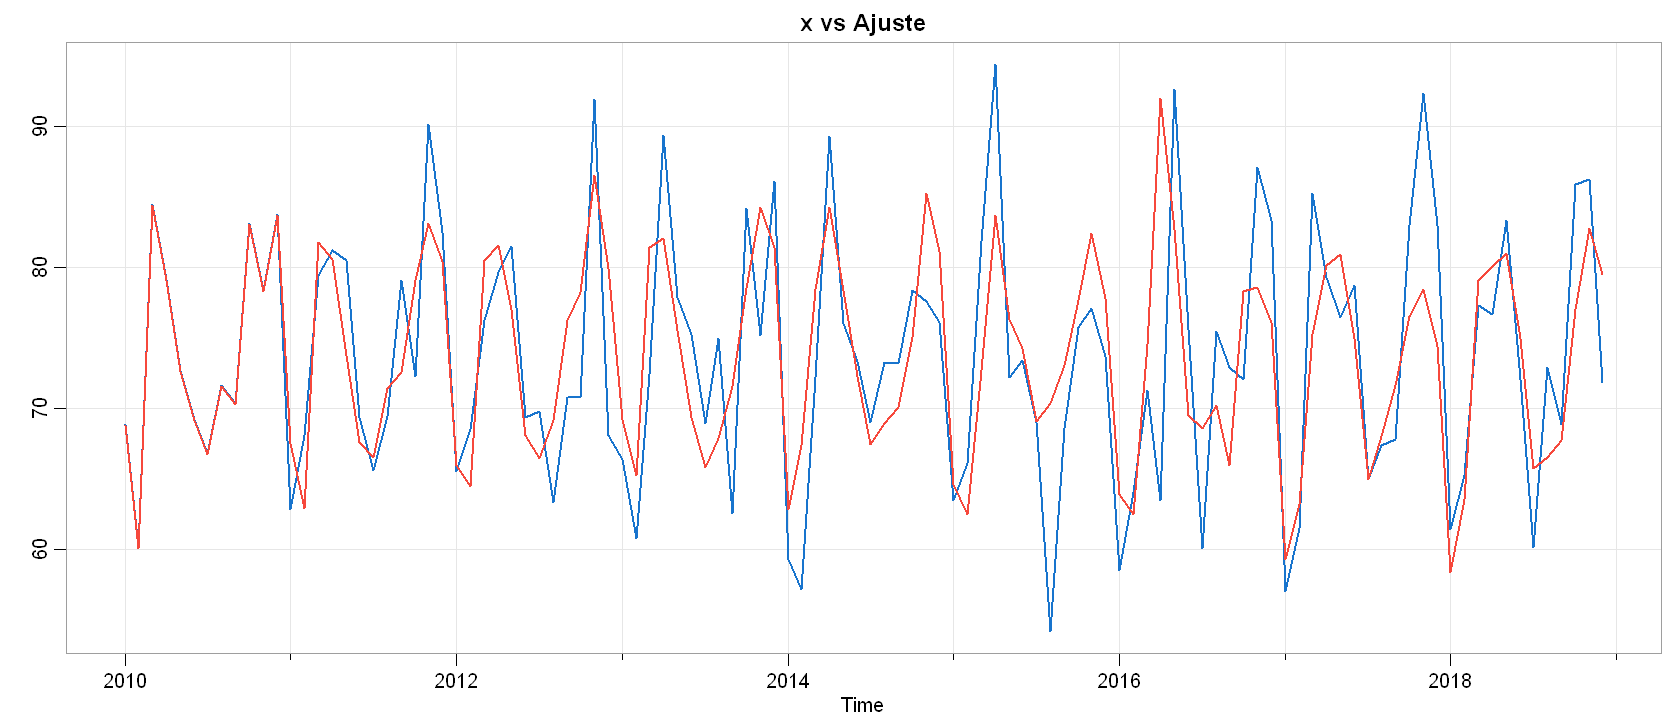

In [173]:
tsplot(x, main = "x vs Ajuste", ylab = "", col = 4, lwd = 2)
predictions_autorima = ts(fitted(fit_autoarima), start = 2010, frequency =12)
lines(predictions_autorima, col = 2, lwd = 2)

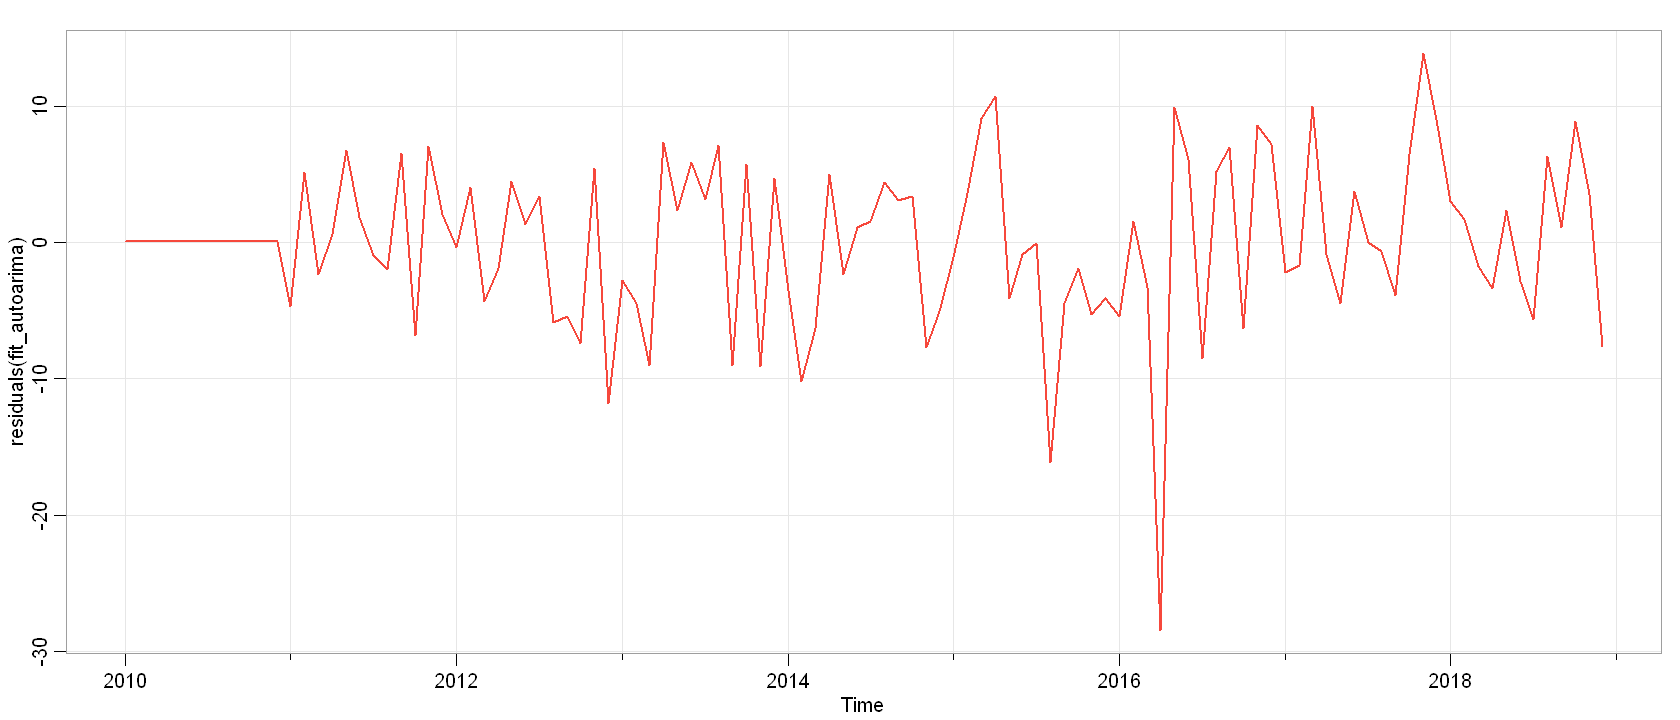

In [174]:
tsplot(residuals(fit_autoarima), col = 2, lwd = 2)

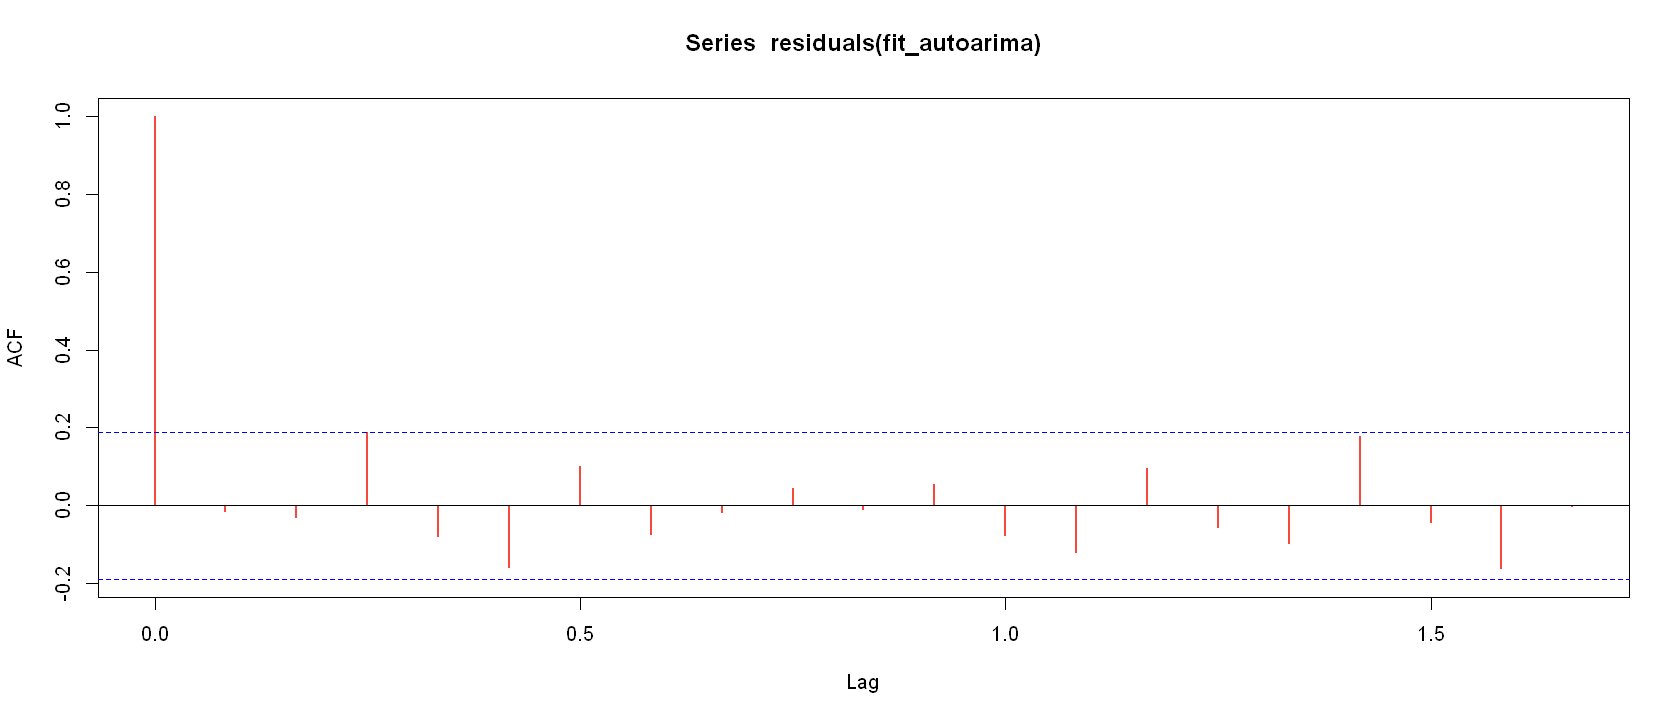

In [175]:
acf(residuals(fit_autoarima), col = 2, lwd = 2)


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(2,1,0)[12]
Q* = 25.341, df = 19, p-value = 0.1496

Model df: 3.   Total lags used: 22



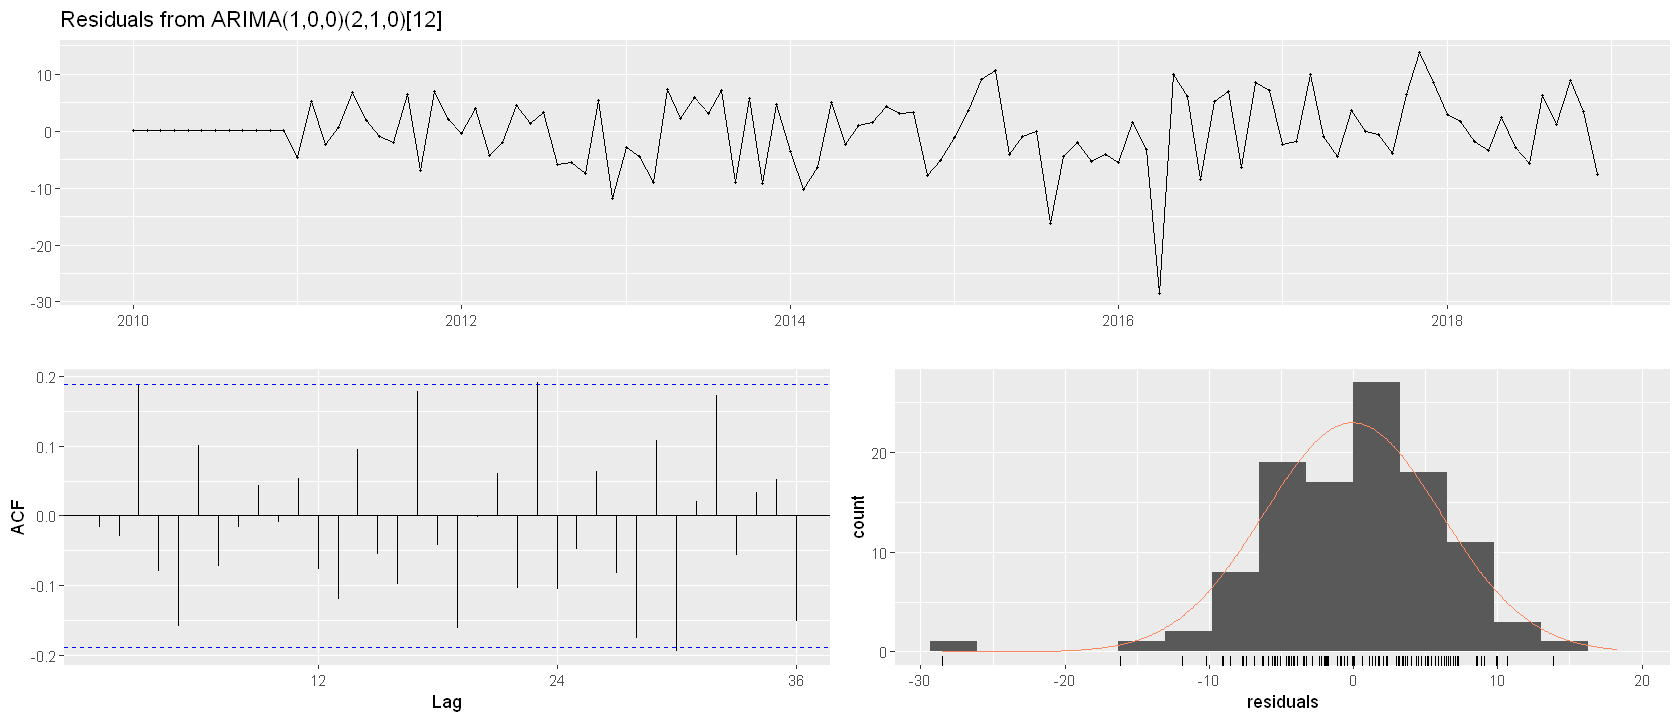

In [176]:
checkresiduals(fit_autoarima)

         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
Jan 2019       61.03802 52.63507 69.44097 48.18682  73.88922
Feb 2019       63.03977 54.34825 71.73130 49.74723  76.33231
Mar 2019       77.94230 69.23097 86.65363 64.61947  91.26513
Apr 2019       72.81009 64.09738 81.52280 59.48515  86.13502
May 2019       84.45164 75.73884 93.16445 71.12656  97.77673
Jun 2019       75.51840 66.80558 84.23121 62.19330  88.84349
Jul 2019       61.72604 53.01322 70.43885 48.40094  75.05113
Aug 2019       72.01680 63.30399 80.72962 58.69171  85.34190
Sep 2019       69.97975 61.26693 78.69256 56.65465  83.30484
Oct 2019       80.01183 71.29901 88.72464 66.68673  93.33692
Nov 2019       88.59173 79.87892 97.30455 75.26664 101.91683
Dec 2019       79.64373 70.93092 88.35654 66.31863  92.96883
Jan 2020       59.73386 50.62941 68.83831 45.80981  73.65791
Feb 2020       63.21491 54.08372 72.34609 49.24997  77.17984
Mar 2020       80.37165 71.23860 89.50470 66.40386  94.33944
Apr 2020       76.41161 

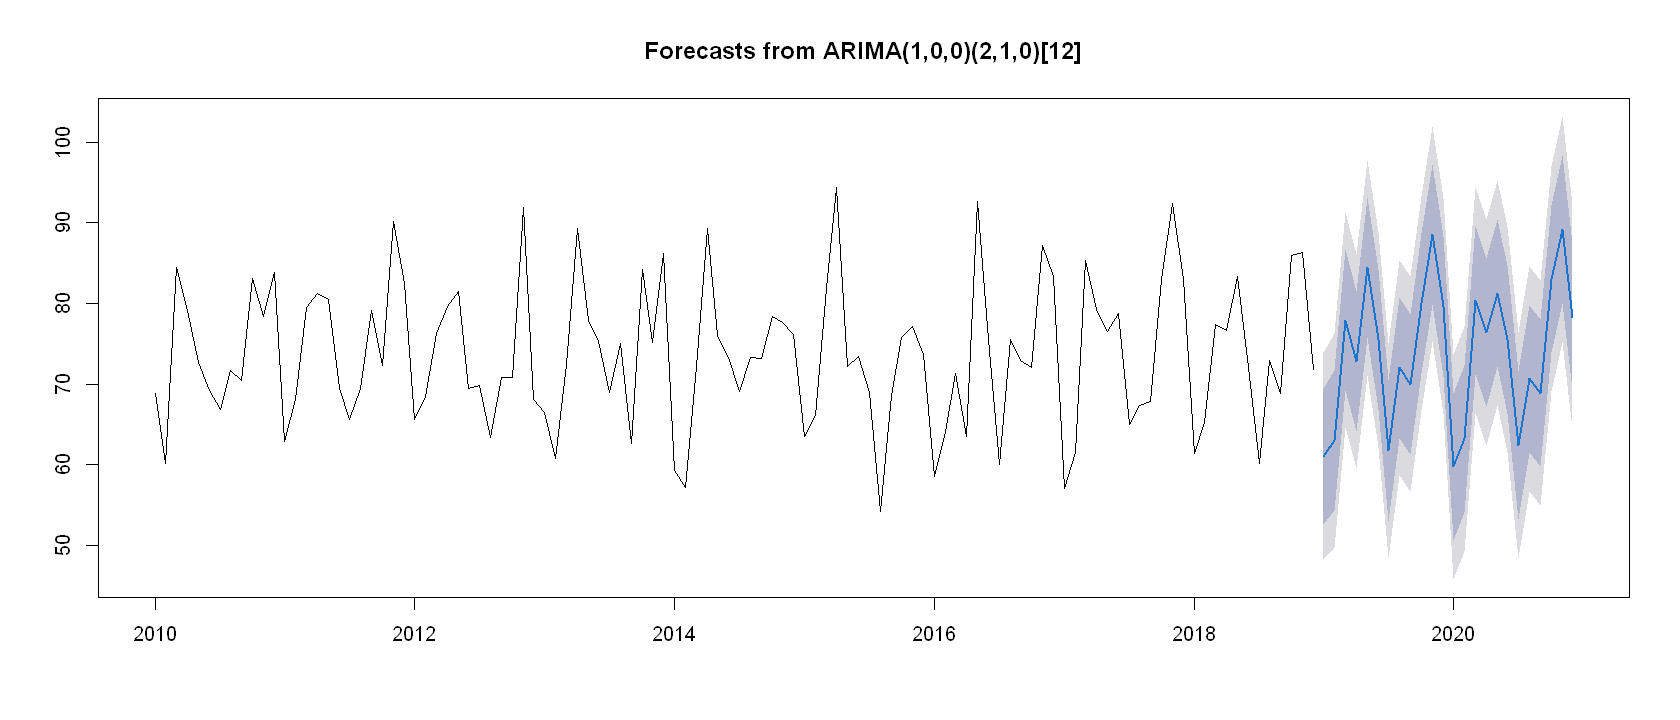

In [177]:
pred_autoarima = forecast(fit_autoarima, h = 24)
pred_autoarima
plot(forecast(fit_autoarima, h = 24))



# PREGUNTAR QUE ONDA CON LOS AÑOS DEL GRAFICO (con h=1 aparecen todos) !!!!!!!!!!!!!!!!!!!!!!!!!

In [178]:
RMSE_autoarima = sd(residuals(fit_autoarima))
RMSE_autoarima

[1] 6.112599

PONER ALGUN COMENTARIO!!!!!!!!!!!!!!!!!

ANALISIS DE CORRELACION CRUZADA:

LA CORRELACION CRUZADA SIRVE PARA EXPLICAR UNA SERIE A PARTIR DE OTRA pero en OTRO momento del tiempo. Específicamente, la correlación cruzada compara una serie con otra serie que está en OTRO momento del tiempo.

In [76]:
area_cultivos <- read.csv("area_cultivos.csv")

In [77]:
consumo_aux= consumo[0:127,]

In [78]:
x_area_c= ts(area_cultivos$area_total, start = 2010, freq = 12)
x_consumo_g= ts(consumo_aux$consumo_miles_m3, start = 2010, freq = 12)


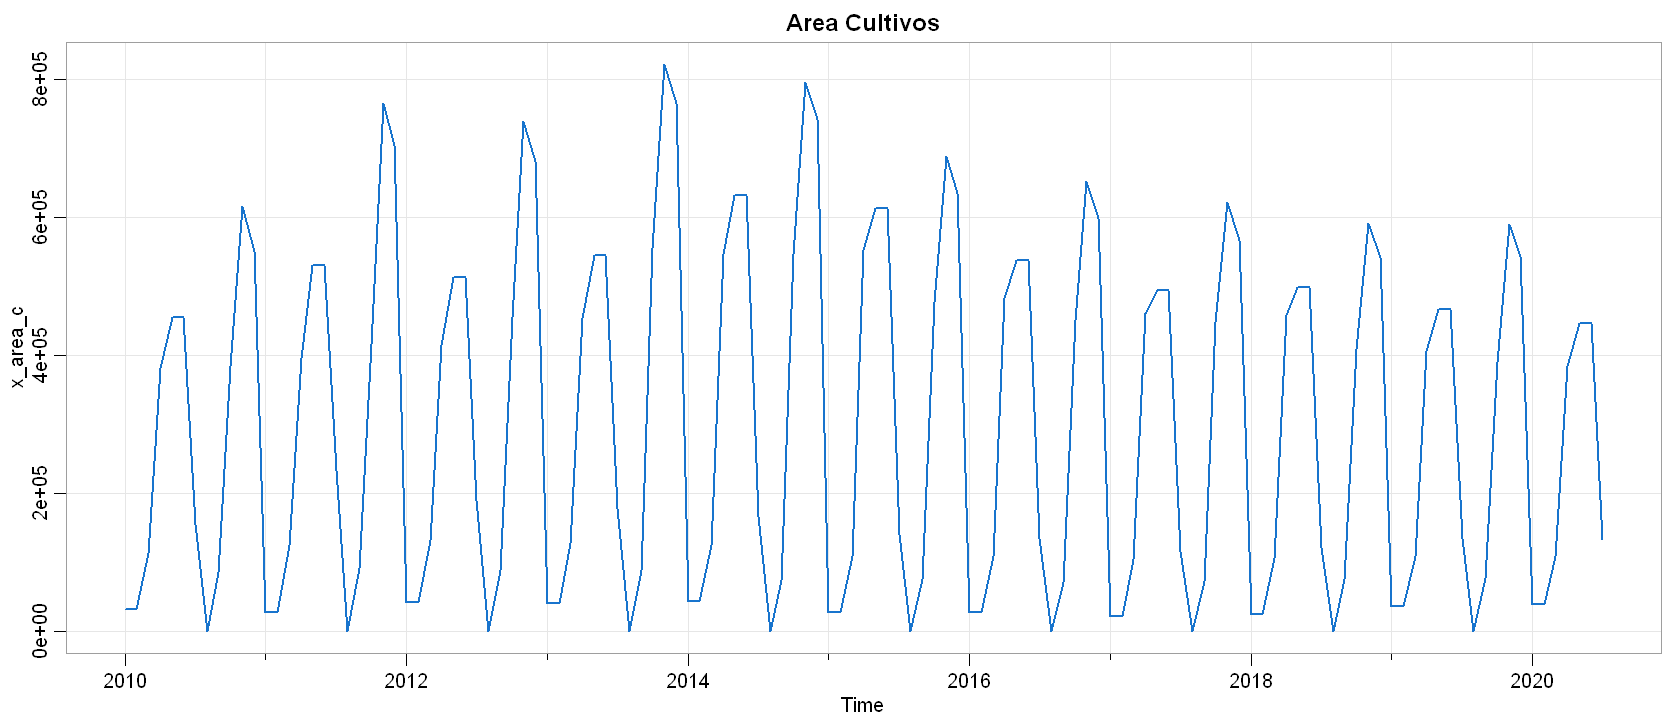

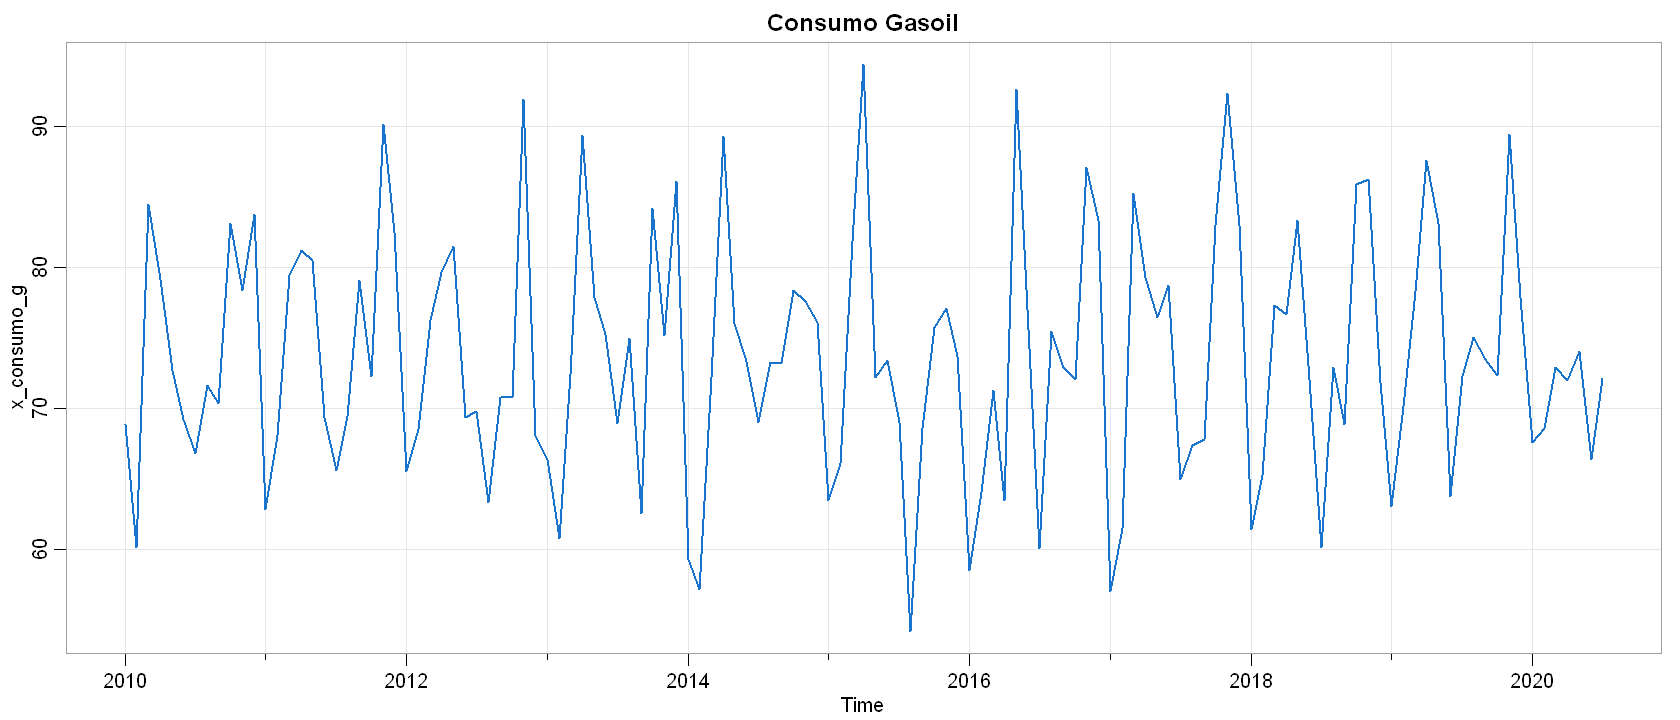

In [79]:
tsplot(x_area_c, main = 'Area Cultivos', col = 4, lwd = 2)
tsplot(x_consumo_g, main = 'Consumo Gasoil', col = 4, lwd = 2)

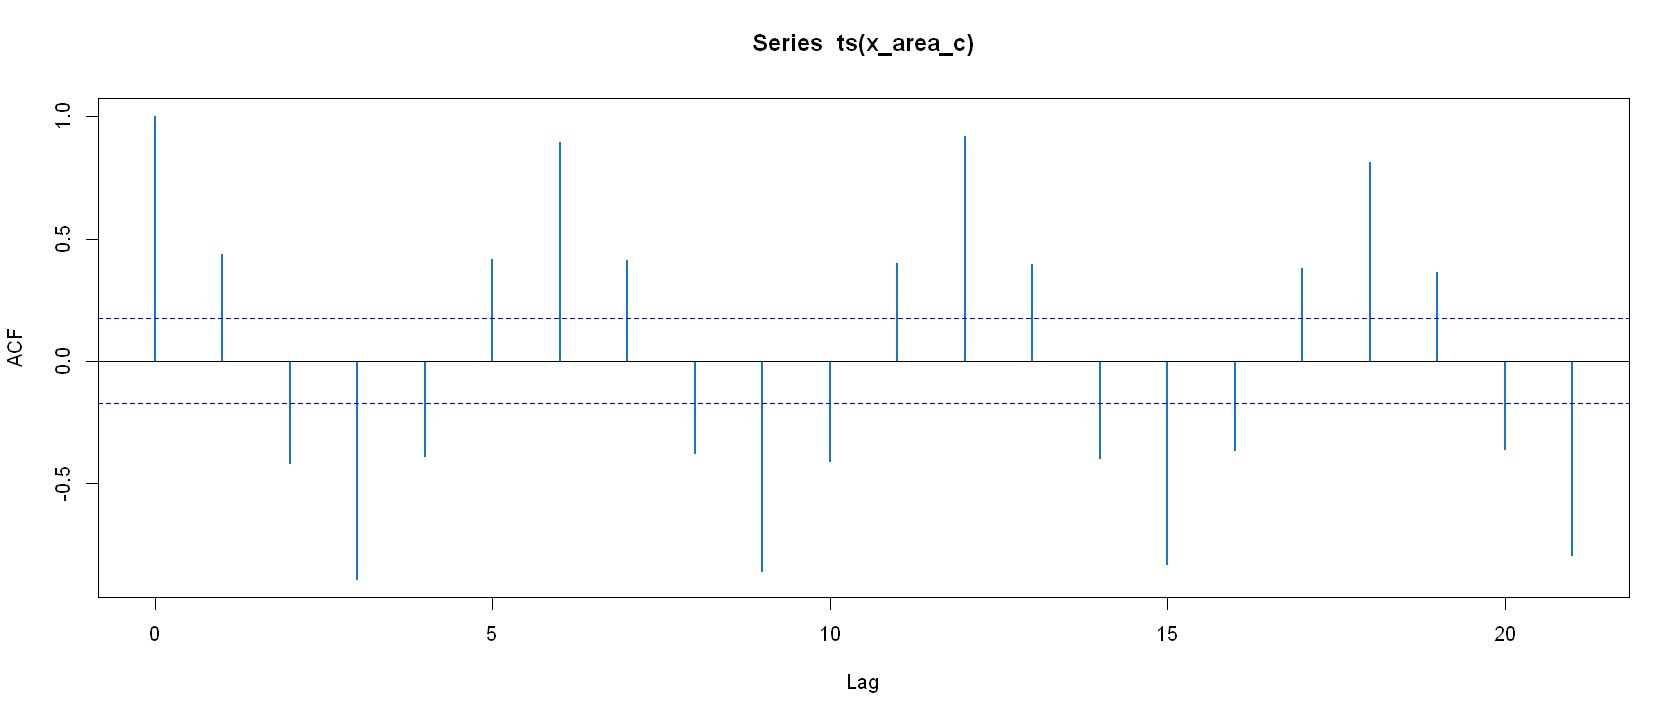

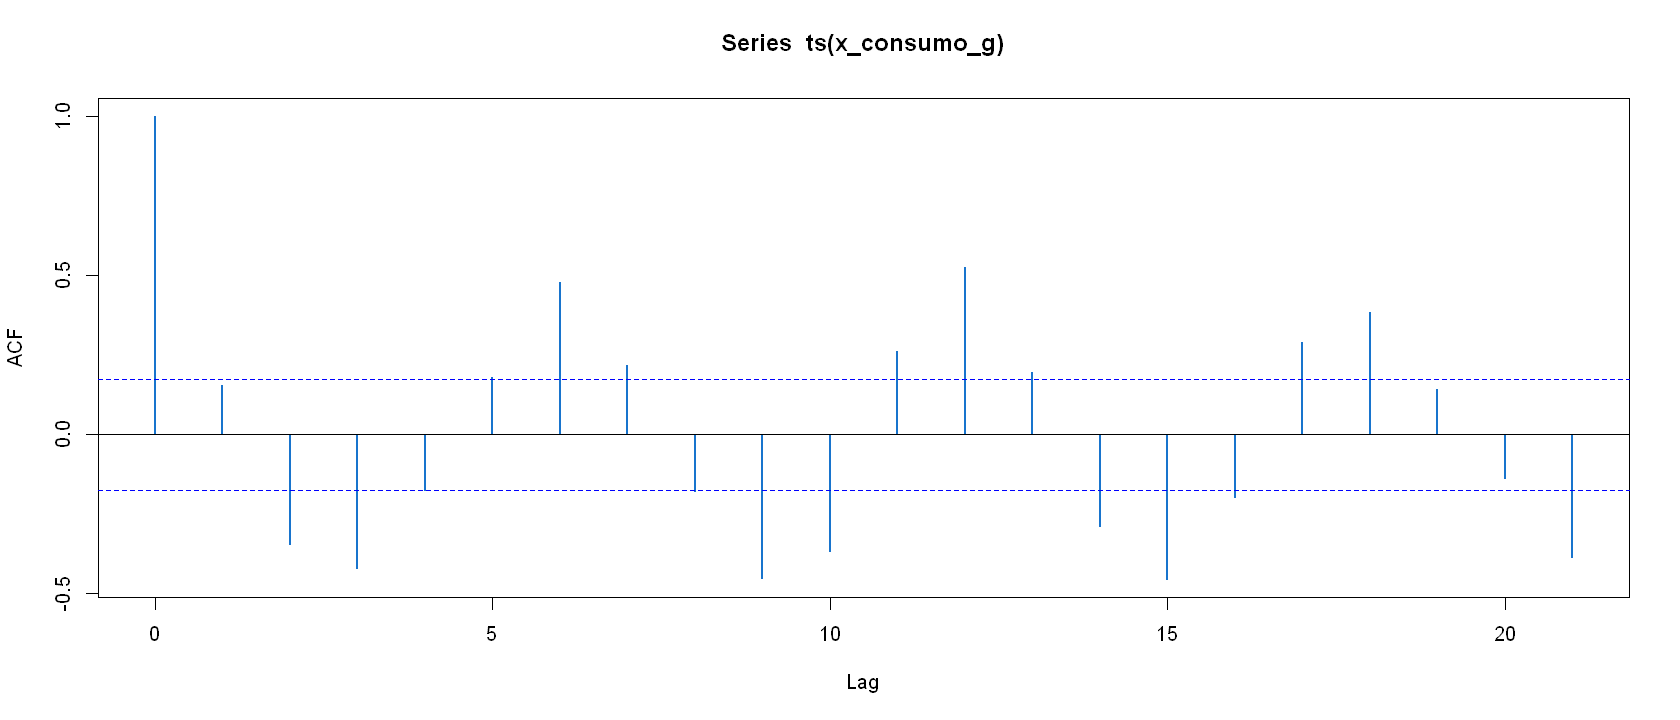

In [80]:
# AUTOCORRELACION DE LAS SERIES
autocorrelacionCultivos = acf(ts(x_area_c), col = 4, lwd = 2)
autocorrelacionGasoil = acf(ts(x_consumo_g), col = 4, lwd = 2)

CORRELACION CRUZADA

Correlación cruzada: Consideramos que deseamos explicar el consumo de gasoil a partir del area total de cultivo (ambas series mensuales)

Acá queremos que “area_total” prediga a “consumo_miles_m3”. Por ende la que corremos es “area_total” y “consumo_miles_m3” la dejamos quieta. Queremos entonces atender a lo que está del cero a la izquierda, porque significa que, por ejemplo, “area_total” DOS meses para atrás tiene una correlación negativa con “consumo_miles_m3”, CINCO meses para atrás, una positiva. Sin embargo, no tiene sentido ver del cero hacia a la derecha, porque nos dice por ejemplo, 3 meses hacia adelante, “area_total” se correlaciona con “consumo_miles_m3” de tal modo (pero para predecir “consumo_miles_m3” eso no nos sirve porque “consumo_miles_m3” ya habrá pasado para ese entonces). En cambio, del cero hacia la derecha sirve “consumo_miles_m3” para predecir “area_total”. 

Por eso, en este caso que queremos usar “area_total” para predecir “consumo_miles_m3”, ponemos “area_total” a la izquierda, y “consumo_miles_m3” a la derecha en el siguiente código con el comando “ccf”:


In [81]:
# SACAR LA MEDIA A AMBAS SERIES ANTES DEL CCF por las dudas

#MODELO EN ESPACIO DE ENTRADAS PARA CONSUMO DE GASOIL
# modelo en el que el consumo de gasoil hoy, es el consumo de gasoil del mes pasado más un ruido
# xt+1 = alfa*xt + v*señal + ruido
# xt + ruido

Previamente a realizar la correlación cruzada de las series mediante el comando "ccf" de R, vamos a quitarles las media, y luego quitaremos el Intercept de los ajustes que realicemos:

In [82]:
x_area_c = x_area_c - mean(x_area_c)
x_consumo_g = x_consumo_g - mean(x_consumo_g)

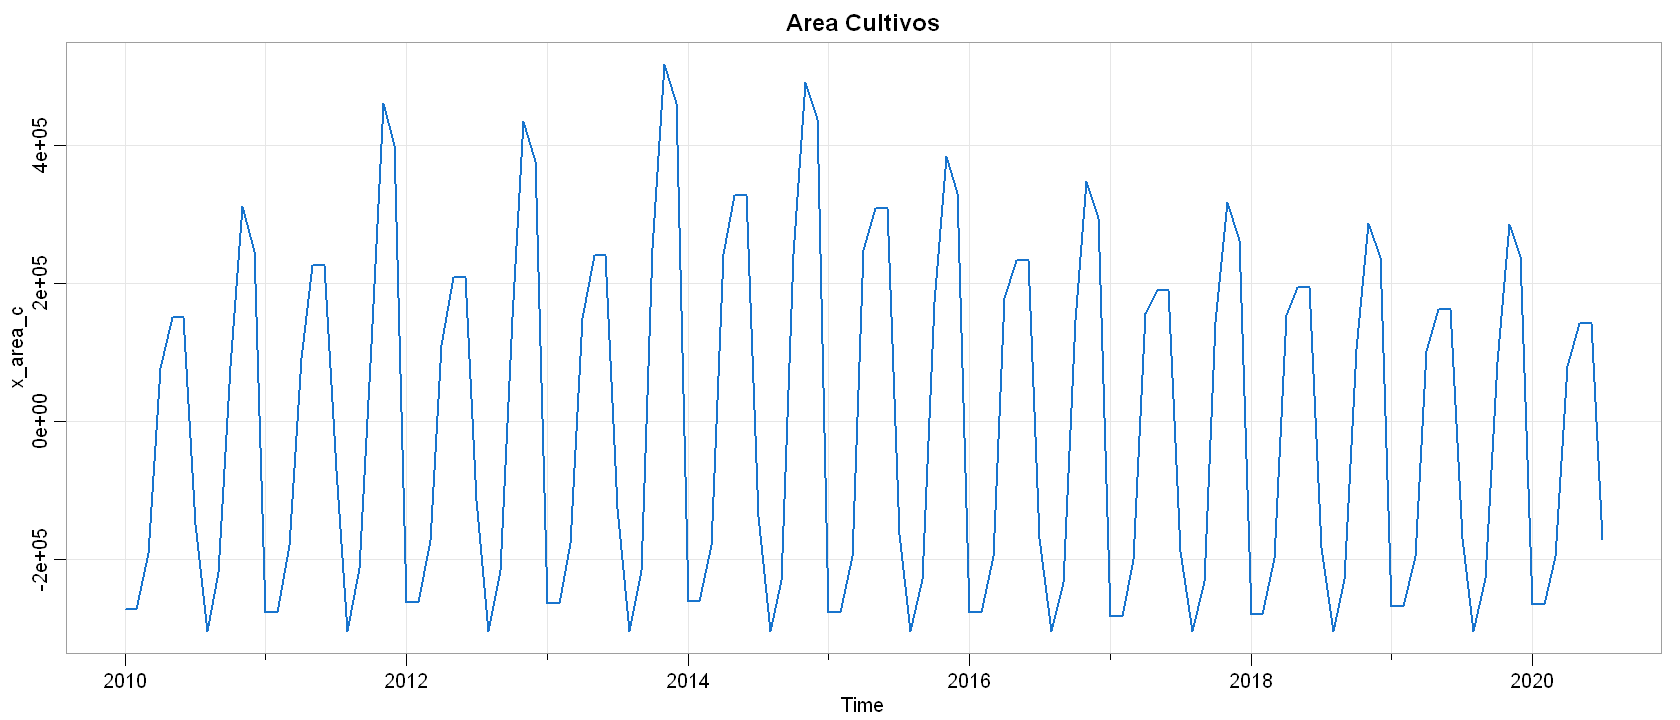

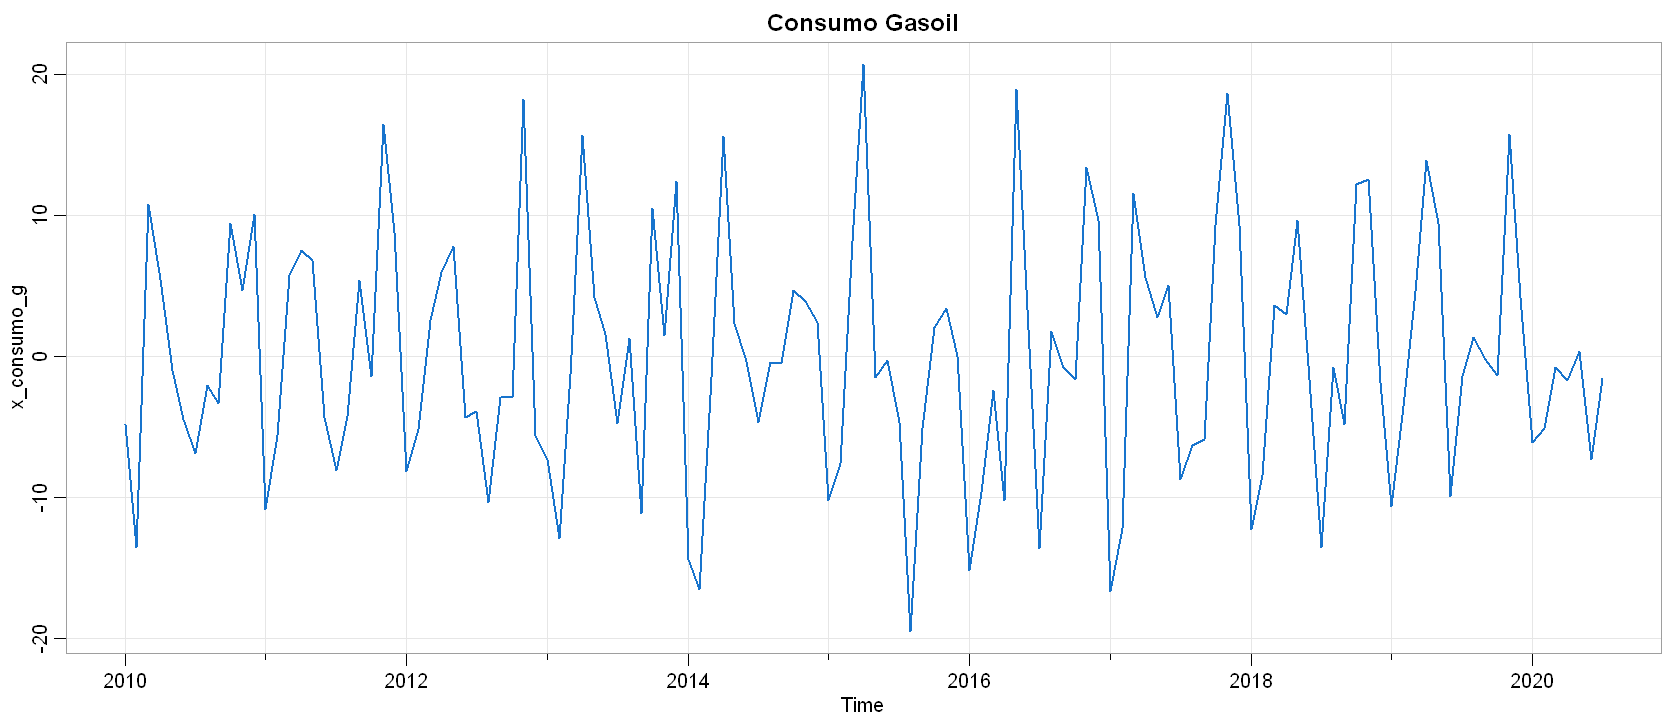

In [83]:
tsplot(x_area_c, main = 'Area Cultivos', col = 4, lwd = 2)
tsplot(x_consumo_g, main = 'Consumo Gasoil', col = 4, lwd = 2)

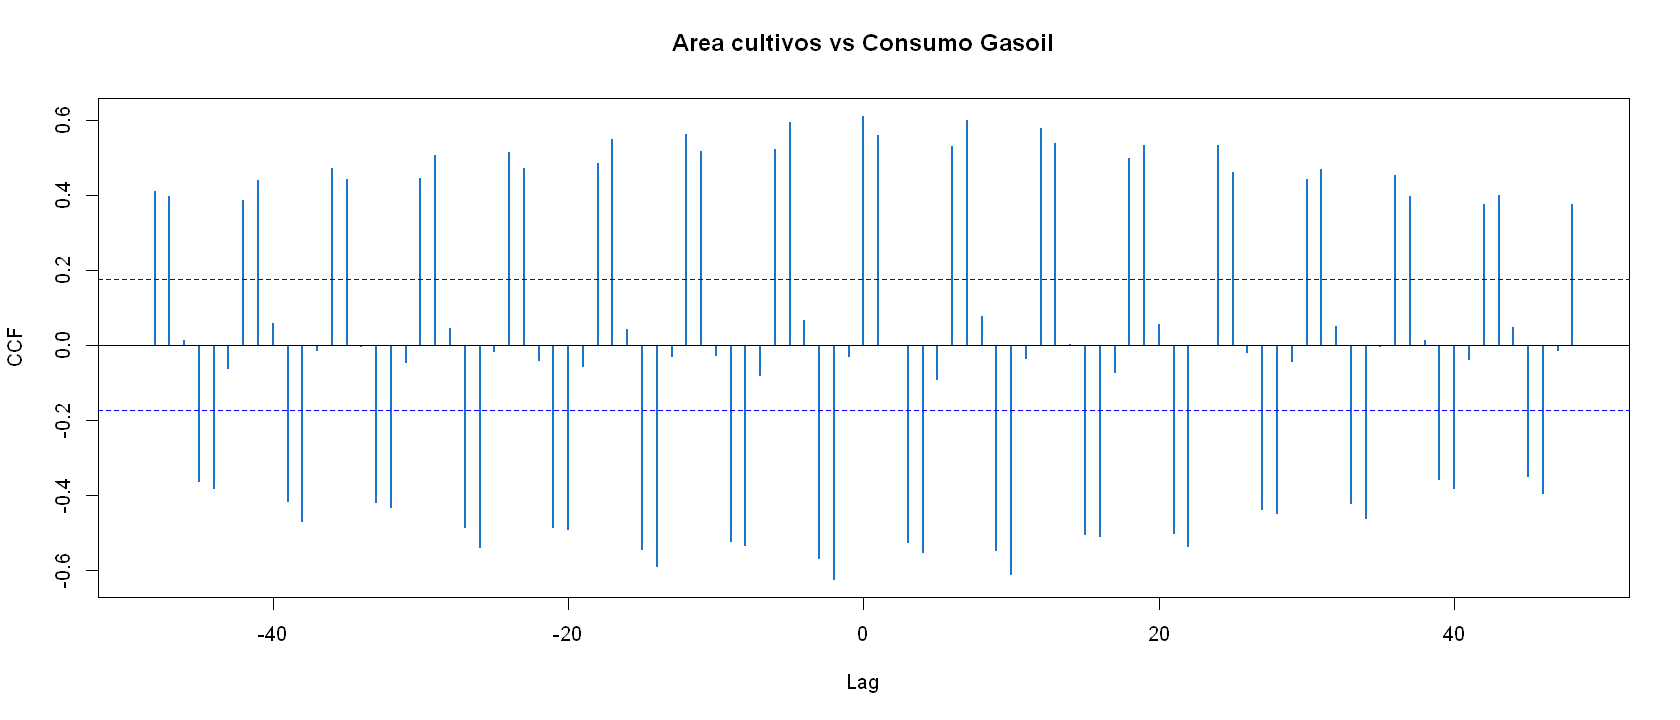

In [84]:
ccf(ts(x_area_c),ts(x_consumo_g),48,main = 'Area cultivos vs Consumo Gasoil', ylab = "CCF", col = 4, lwd = 2)

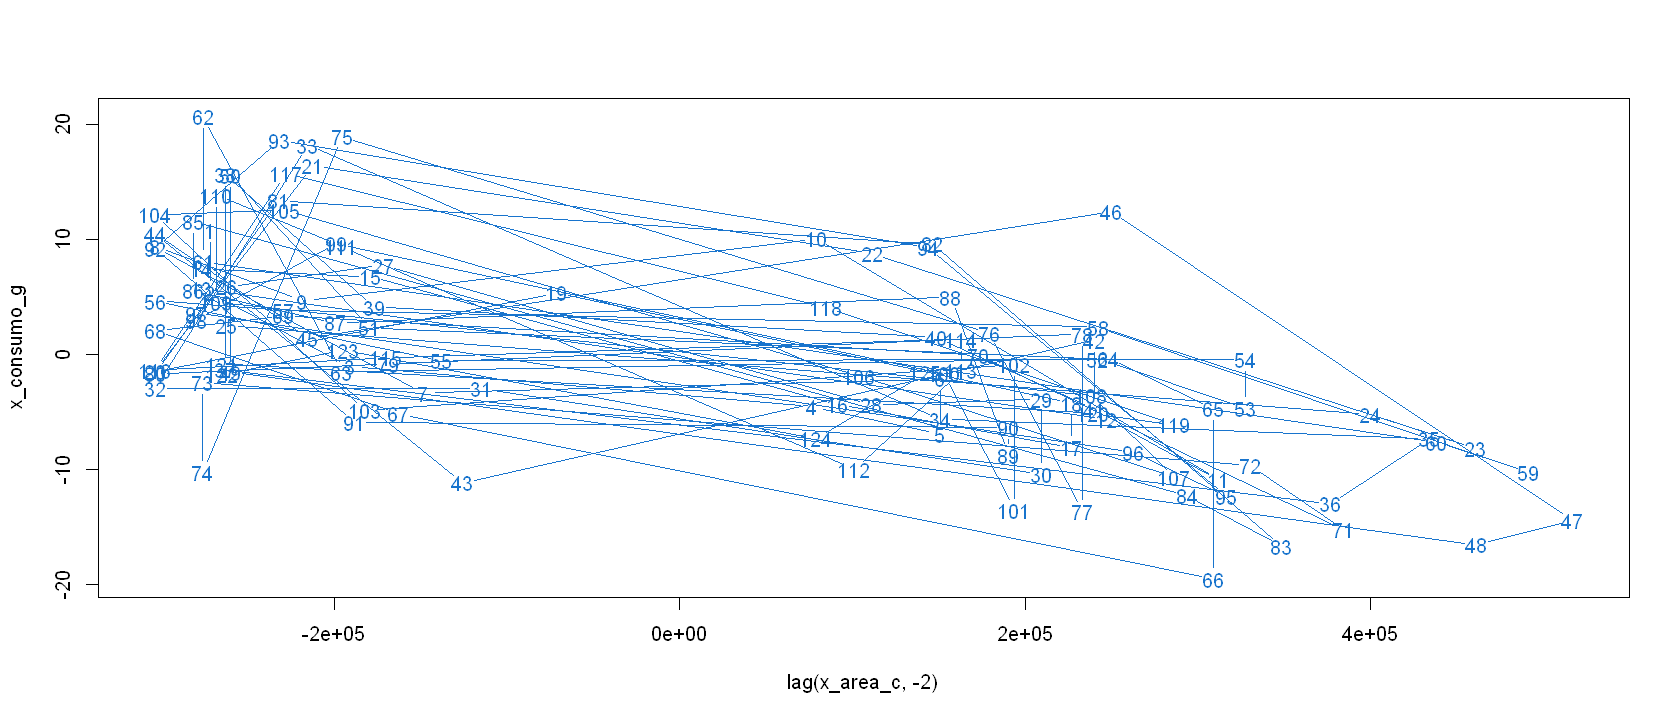

In [85]:
plot(lag(x_area_c,-2), x_consumo_g, col = 4)

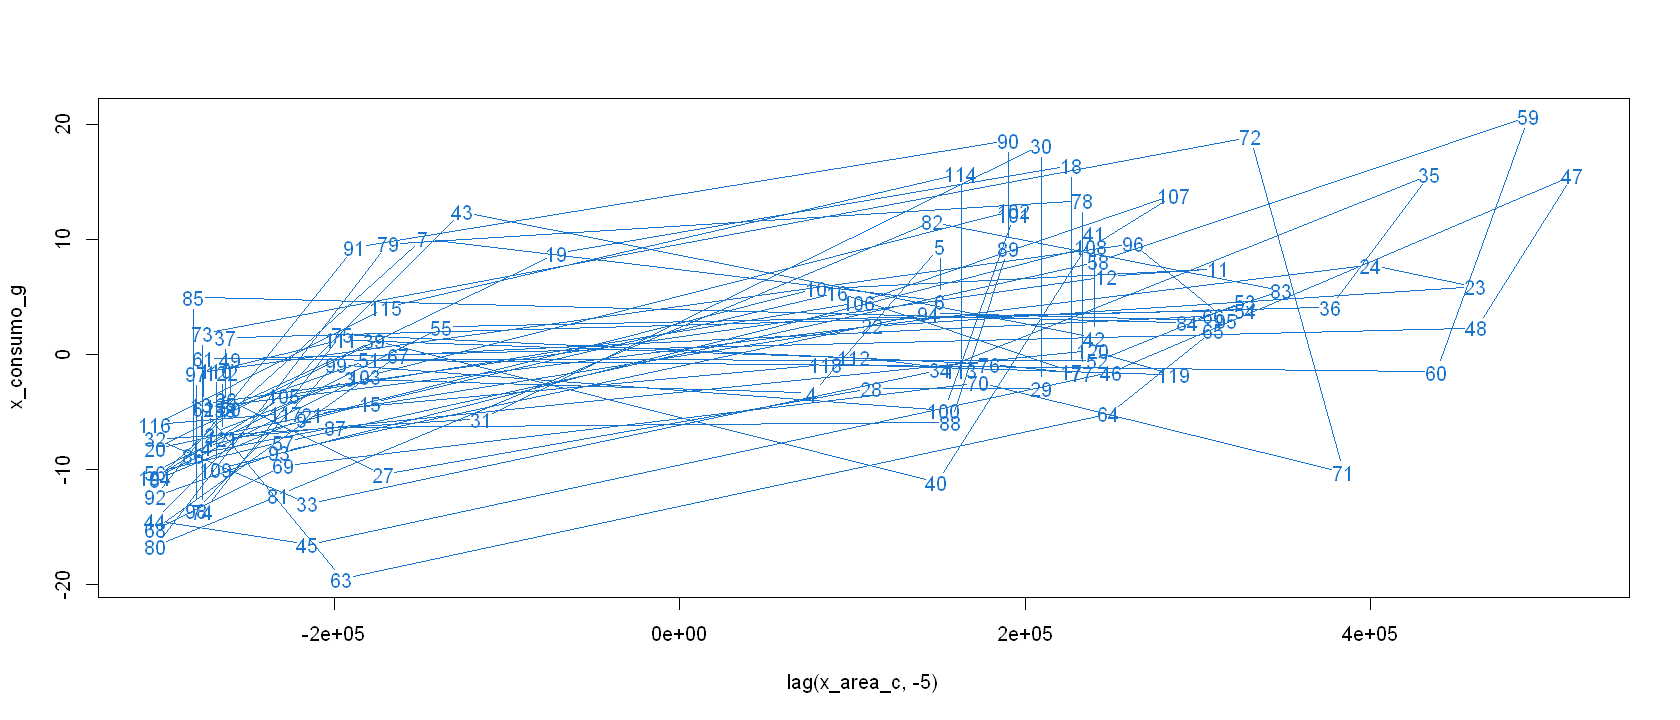

In [86]:
plot(lag(x_area_c,-5), x_consumo_g, col = 4)

REALIZACIÓN DE UN AJUSTE PARA EXPLICAR UNA SERIE A PARTIR DE OTRA (SE USA INTERSECT Y UN DATAFRAME): En este caso, usamos las series “x_consumo_g” y “x_area_c”

REALIZACIÓN DEL AJUSTE para explicar “x_consumo_g” a partir de “x_area_c” corrida 5 meses hacia atrás:
Creamos un dataframe de nombre “df” con las dos columnas alineadas que contienen los datos necesarios para hacer la correlación cruzada:


In [87]:
df = ts.intersect(x_consumo_g, area_total_5 = lag(x_area_c,-5), dframe = TRUE)

A continuación, tratamos de explicar “x_consumo_g” a partir de “area_total_5” tomando los datos del dataframe “df” que le pasamos:

In [88]:
fit_cc1 = lm(x_consumo_g ~ 0 + area_total_5, data = df, na.action = NULL)
summary(fit_cc1)


Call:
lm(formula = x_consumo_g ~ 0 + area_total_5, data = df, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.0770  -4.5133  -0.4821   4.8141  15.0296 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
area_total_5 2.050e-05  2.422e-06   8.466 7.02e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.805 on 121 degrees of freedom
Multiple R-squared:  0.372,	Adjusted R-squared:  0.3668 
F-statistic: 71.67 on 1 and 121 DF,  p-value: 7.016e-14


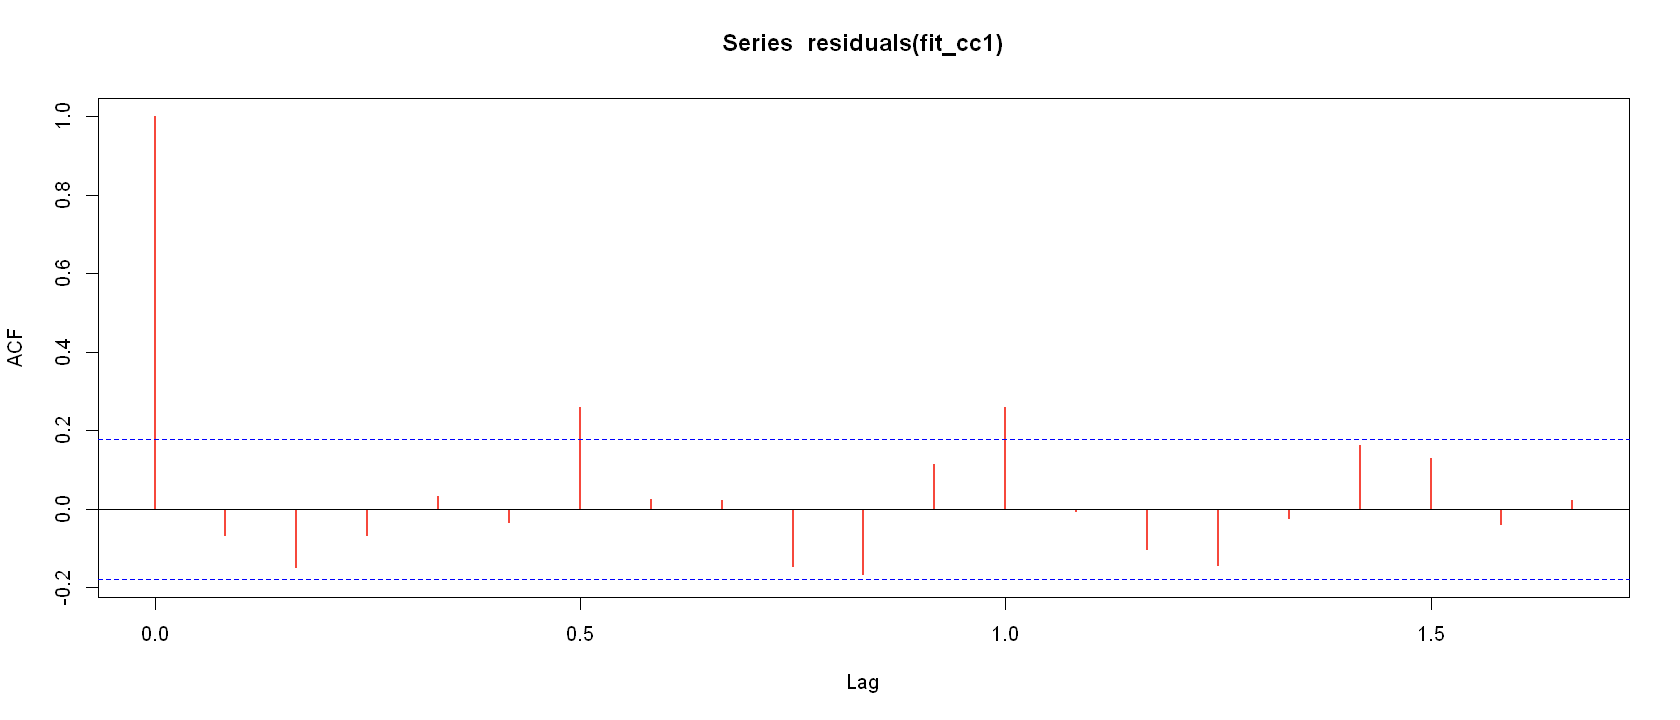

In [89]:
acf(residuals(fit_cc1), col = 2, lwd = 2)

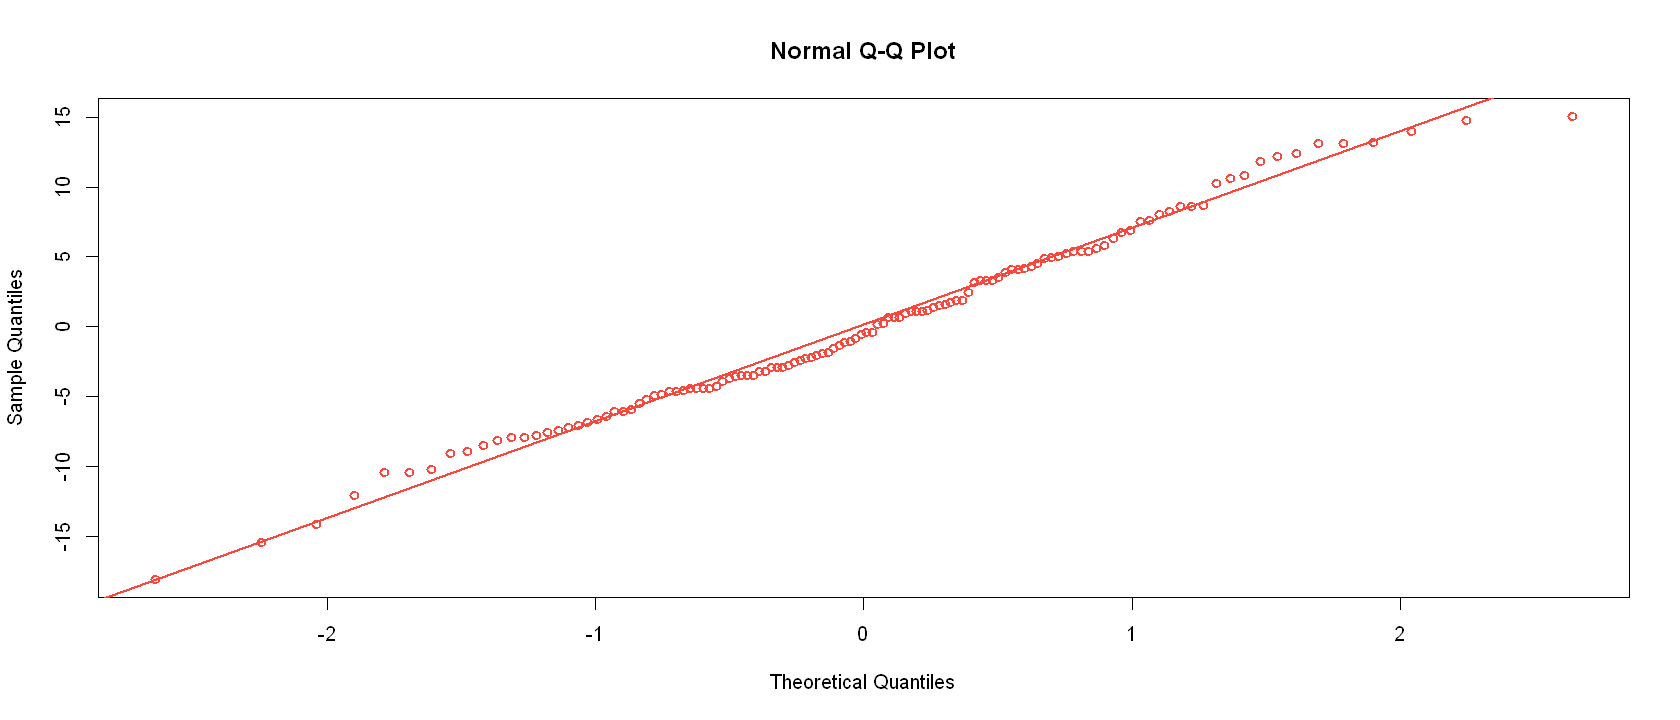

In [90]:
qqnorm(residuals(fit_cc1), col = 2,lwd = 2)
qqline(residuals(fit_cc1), col = 2,lwd = 2)

A continuación probaremos agregar a "df" las frecuencias de senos y cosenos que obtuvimos del periodograma y volver a relizar un ajuste del consumo de gasoil con "area_total_5":

In [91]:
time = time(x_consumo_g) - 2010

In [92]:
df2 = ts.intersect(x_consumo_g, area_total_5 = lag(x_area_c, -5), cos2 = cos(2*pi*(2)*time), sen2 = sin(2*pi*(2)*time), cos3 = cos(2*pi*(3)*time), sen3 =  sin(2*pi*(3)*time), dframe = TRUE)

In [93]:
fit_cc2 = lm(x_consumo_g ~ 0 + area_total_5  + cos2 + sen2 + cos3 + sen3, data = df2, na.action = NULL)
summary(fit_cc2)


Call:
lm(formula = x_consumo_g ~ 0 + area_total_5 + cos2 + sen2 + cos3 + 
    sen3, data = df2, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.9562  -3.3325   0.2527   4.3421  14.1578 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
area_total_5 -2.270e-06  6.898e-06  -0.329 0.742743    
cos2         -7.936e+00  2.433e+00  -3.262 0.001452 ** 
sen2         -4.727e+00  7.631e-01  -6.195 8.96e-09 ***
cos3         -2.505e+00  7.270e-01  -3.446 0.000792 ***
sen3         -2.693e+00  8.150e-01  -3.304 0.001266 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.646 on 117 degrees of freedom
Multiple R-squared:  0.5819,	Adjusted R-squared:  0.5641 
F-statistic: 32.57 on 5 and 117 DF,  p-value: < 2.2e-16


Consideramos que no tiene sentido continuar este análisis, ya que a partir de los resultados de este ajuste vemos que "area_total_5" se volvió un coeficiente no significativo. 

La explicación de esto subyace probablemente, en que si hubieramos querido ajustar la serie "area_total_5" por senos y cosenos con las mismas frecuencias (2, 3 y 4.2), también hubiesemos encontrado un buen ajuste. Es decir, si suponemos que "area_total_5" correlaciona bien con senos y cosenos, y a su vez, nuestra serie de consumo de gasoil (que también correlaciona bien con senos y cosenos) la tomamos como "area_total_5" por un número, entonces, estamos repitiendo los senos y cosenos dos veces (una por el lado de "area_total_5" y otra por agregarlos directamente). A consecuencia de esto, la regresión descarta uno de ellos y queda no significativo.

En otras palabras, la posible relación de causalidad entre el "area_total_5" y el consumo de gasoil vendría dada por las estaciones del año, pero entonces, al agregarle tales estaciones a la regresión, esta atribuyó la causalidad a tales estaciones, descartando "area_total_5" en sí misma.

Como consecuencia, decidimos no continuar el análisis por este lado.

La propia periodicidad de las series de consumo de gasoil y área de cultivo hace que estas se vuelvan a correlacionar, sin embargo, la correlación fuerte entre ambas series es simultánea. Por este motivo probaremos realizar un ajuste del consumo de gasoil, sin laguear ninguna de las series:

In [94]:
fit_cc3 = lm(x_consumo_g ~ 0 + x_area_c)
summary(fit_cc3)


Call:
lm(formula = x_consumo_g ~ 0 + x_area_c)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9049  -4.9439  -0.3304   4.7473  15.7264 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
x_area_c 2.070e-05  2.407e-06   8.603 2.62e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.81 on 126 degrees of freedom
Multiple R-squared:   0.37,	Adjusted R-squared:  0.365 
F-statistic: 74.01 on 1 and 126 DF,  p-value: 2.62e-14


Observamos que el R cuadrado obtenido es de 37%, practicamente igual al que obtuvimos considerando la serie "area_total_5", en el ajuste fit_cc1.

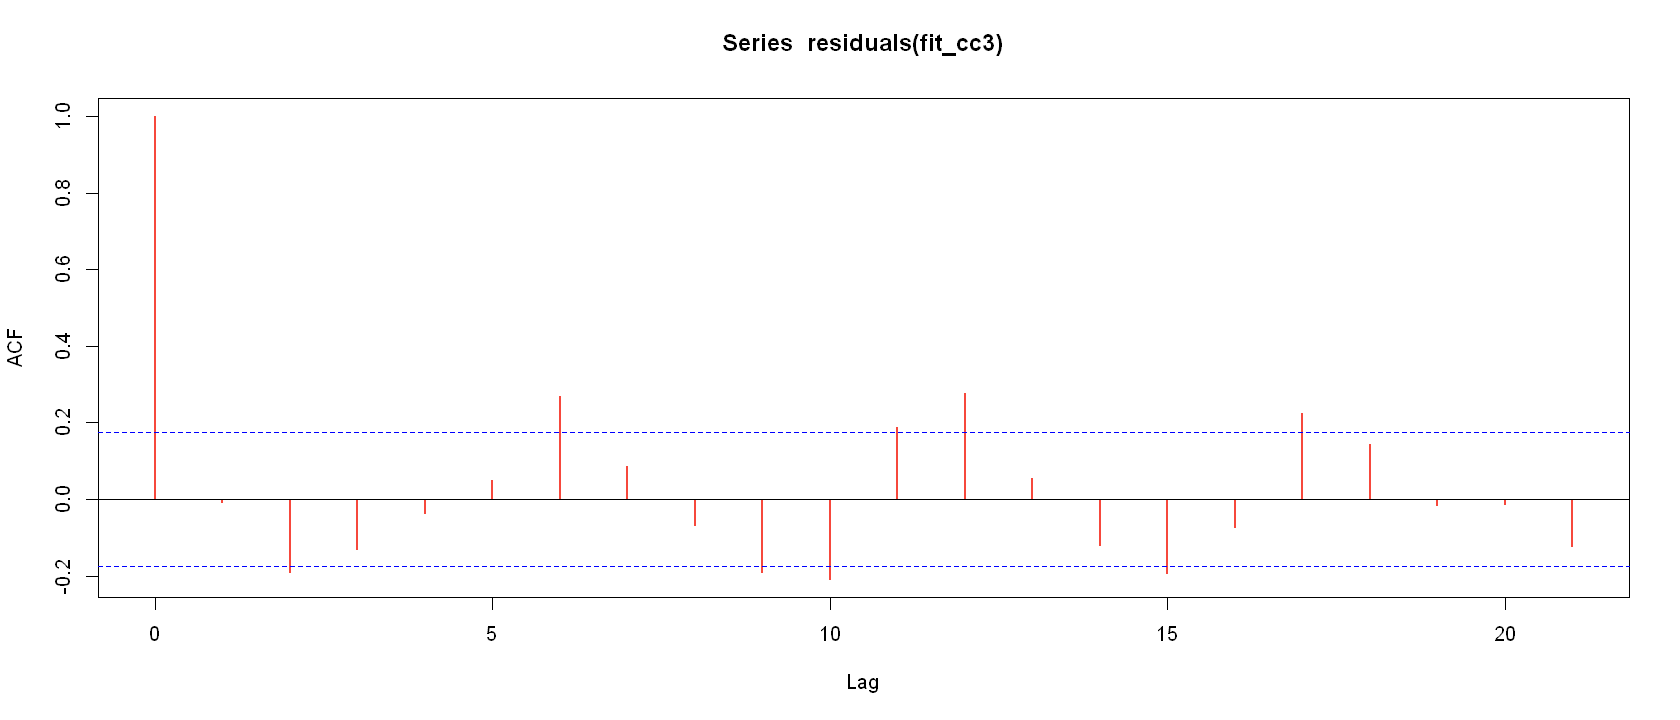

In [95]:
acf(residuals(fit_cc3), col = 2, lwd = 2)

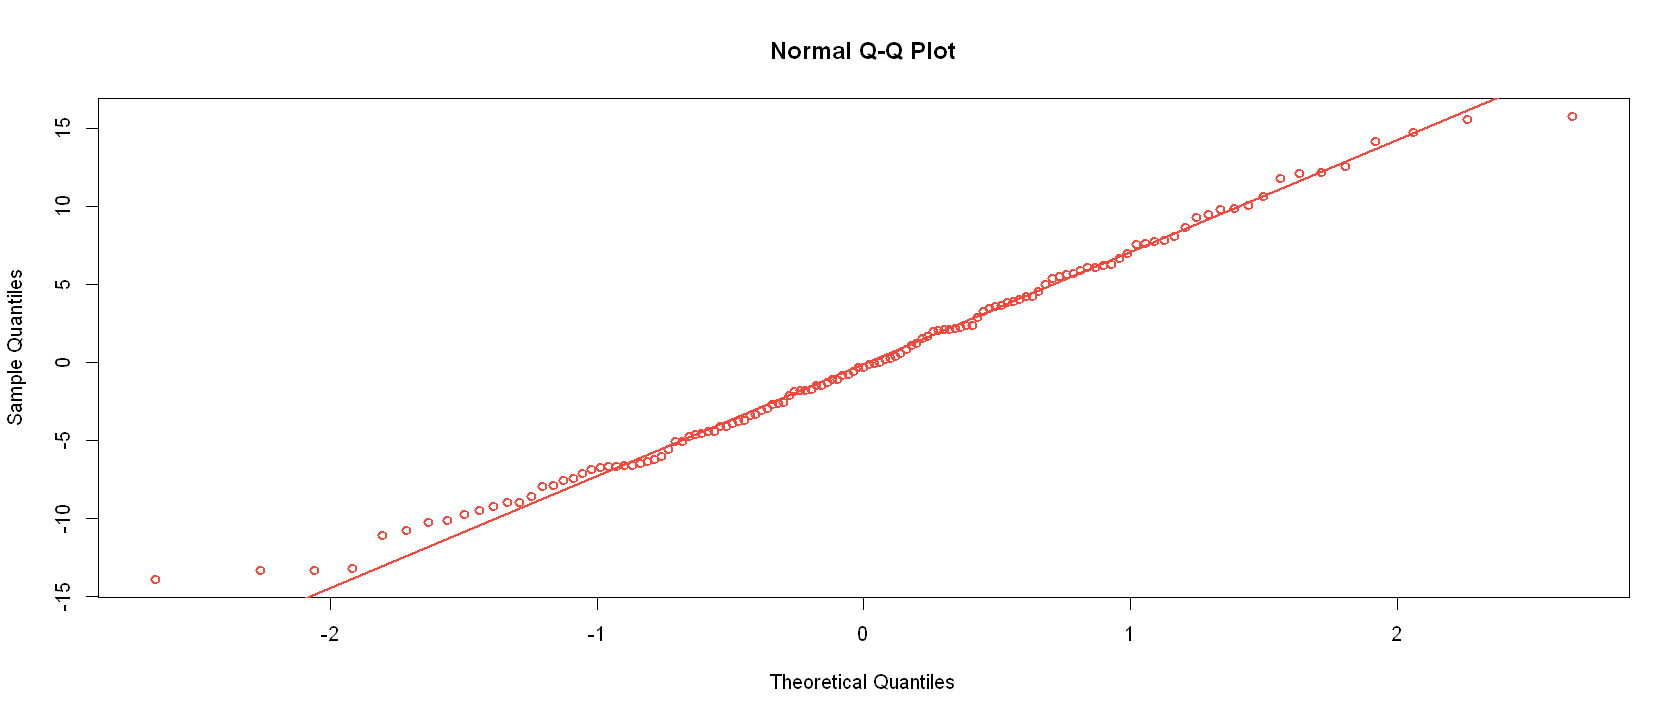

In [96]:
qqnorm(residuals(fit_cc3), col = 2,lwd = 2)
qqline(residuals(fit_cc3), col = 2,lwd = 2)